# 주식과 최고온도를 비교분석 하기 위해 전처리한 자료 가져오기

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#한글화 설정
from matplotlib import font_manager, rcParams
!apt-get install fonts-nanum*
rcParams['font.family'] = 'NanumGothicCoding'
rcParams['axes.unicode_minus'] = False
font_manager._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [3]:
skd = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/SeoulTemp_Kospi_Kosdaq_drop1.csv의 사본')

In [4]:
skd

Unnamed: 0 지점명        date  평균기온(℃)  최고기온(℃)    kospi  volume_kospi  \
0              1  서울  2001-01-02     -4.3     -0.2   520.95       23101.0   
1              2  서울  2001-01-03     -8.3     -5.2   521.43       32458.0   
2              3  서울  2001-01-04     -9.8     -6.7   558.02       44454.0   
3              4  서울  2001-01-05     -6.8     -2.2   580.85       57829.0   
4              7  서울  2001-01-08      2.0      4.9   586.65       55865.0   
...          ...  ..         ...      ...      ...      ...           ...   
5177        7661  서울  2021-12-24     -0.3      3.2  3012.43       53015.0   
5178        7664  서울  2021-12-27     -7.6     -3.9  2999.55       46290.0   
5179        7665  서울  2021-12-28     -4.1     -0.9  3020.24       59323.0   
5180        7666  서울  2021-12-29      0.4      5.9  2993.29       53660.0   
5181        7667  서울  2021-12-30     -3.9      0.2  2977.65       45404.0   

      amount_kospi   kosdaq  volume_kosdaq  amount_kosdaq  
0          12233.0      NaN            NaN            NaN  
1          15834.0      NaN            NaN            NaN  
2          29848.0      NaN            NaN            NaN  
3          35696.0      NaN            NaN            NaN  
4          29481.0      NaN            NaN            NaN  
...            ...      ...            ...            ...  
5177       84694.0  1007.42       123576.0       108664.0  
5178       81341.0  1011.36       115153.0       100446.0  
5179      118684.0  1027.44       128675.0       132431.0  
5180      108018.0  1028.05        95094.0       116836.0  
5181       85951.0  1033.98        90742.0       101026.0  

[5182 rows x 11 columns]

# skd_(년도) 형태로 반복문을 사용해서 2001년부터 2021년까지 20년치 변수 생성
- 주식과 폭염과의 상관관계를 알고 싶음
  - 5월부터 9월 말까지 폭염주의보가 발령났기 때문에 이 5달을 중심으로 분석

In [5]:
for i in range(2001, 2022):
  globals()['skd_{}'.format(i)] = skd[skd['date'].between('{}-05-01'.format(i),'{}-09-30'.format(i))]

In [6]:
skd_2001

Unnamed: 0 지점명        date  평균기온(℃)  최고기온(℃)   kospi  volume_kospi  \
80          121  서울  2001-05-02     16.2     20.3  583.70       59462.0   
81          122  서울  2001-05-03     16.1     22.0  584.40       39007.0   
82          123  서울  2001-05-04     15.0     19.1  585.60       39247.0   
83          126  서울  2001-05-07     18.3     22.5  596.50       47172.0   
84          127  서울  2001-05-08     20.4     27.9  590.91       48440.0   
..          ...  ..         ...      ...      ...     ...           ...   
180         266  서울  2001-09-24     19.0     24.8  482.19       53875.0   
181         267  서울  2001-09-25     21.3     26.9  472.13       64013.0   
182         268  서울  2001-09-26     21.1     26.2  472.85       42340.0   
183         269  서울  2001-09-27     21.4     26.5  472.38       45327.0   
184         270  서울  2001-09-28     21.1     27.8  479.68       42674.0   

     amount_kospi  kosdaq  volume_kosdaq  amount_kosdaq  
80        23570.0     NaN            NaN            NaN  
81        18124.0     NaN            NaN            NaN  
82        16758.0     NaN            NaN            NaN  
83        21111.0     NaN            NaN            NaN  
84        21069.0     NaN            NaN            NaN  
..            ...     ...            ...            ...  
180       16138.0     NaN            NaN            NaN  
181       19565.0     NaN            NaN            NaN  
182       13226.0     NaN            NaN            NaN  
183       13222.0     NaN            NaN            NaN  
184       15265.0     NaN            NaN            NaN  

[105 rows x 11 columns]

In [7]:
skd_2002

Unnamed: 0 지점명        date  평균기온(℃)  최고기온(℃)   kospi  volume_kospi  \
326         486  서울  2002-05-02     18.3     25.3  859.86       69501.0   
327         487  서울  2002-05-03     16.0     19.6  856.72       63018.0   
328         490  서울  2002-05-06     15.6     19.7  826.87       49388.0   
329         491  서울  2002-05-07     11.4     12.0  826.34       56449.0   
330         492  서울  2002-05-08     16.6     23.1  844.67       65885.0   
..          ...  ..         ...      ...      ...     ...           ...   
423         631  서울  2002-09-24     20.3     26.4  672.28       58265.0   
424         632  서울  2002-09-25     20.9     26.8  657.96       50447.0   
425         633  서울  2002-09-26     21.6     26.3  662.41       62415.0   
426         634  서울  2002-09-27     20.5     24.8  663.72      108385.0   
427         637  서울  2002-09-30     18.8     23.3  646.42       50573.0   

     amount_kospi  kosdaq  volume_kosdaq  amount_kosdaq  
326       36637.0     NaN            NaN            NaN  
327       33860.0     NaN            NaN            NaN  
328       24743.0     NaN            NaN            NaN  
329       29852.0     NaN            NaN            NaN  
330       31798.0     NaN            NaN            NaN  
..            ...     ...            ...            ...  
423       20776.0     NaN            NaN            NaN  
424       20235.0     NaN            NaN            NaN  
425       21034.0     NaN            NaN            NaN  
426       19939.0     NaN            NaN            NaN  
427       16183.0     NaN            NaN            NaN  

[102 rows x 11 columns]

Text(0, 0.5, 'Kosdaq')

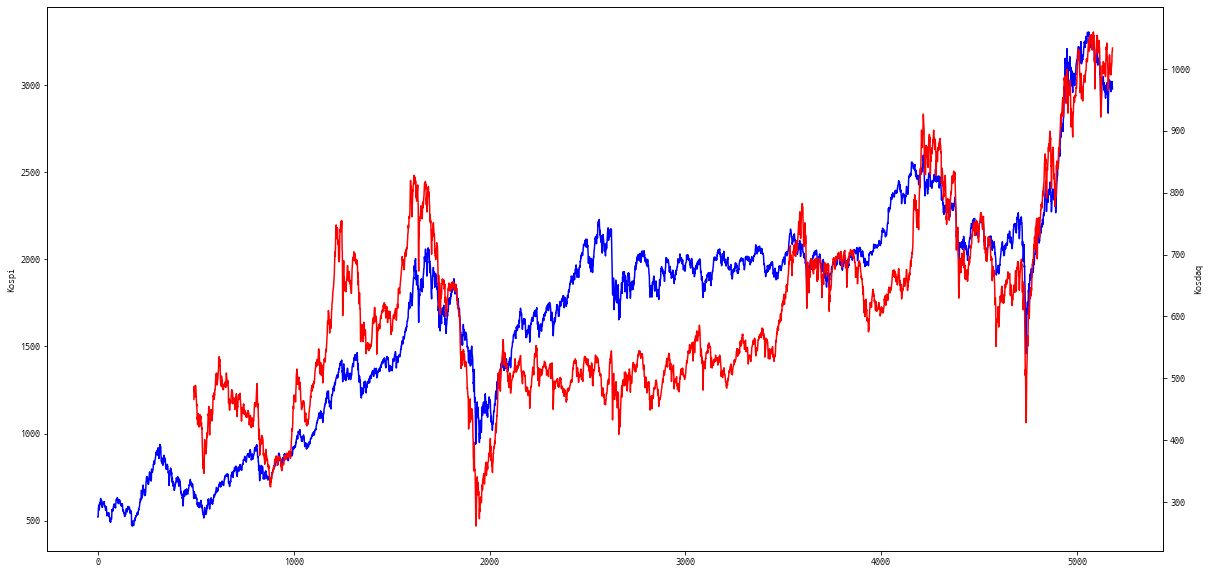

In [8]:
plt.figure(figsize=(20,10))
plt.plot(skd['kospi'],color='blue')
plt.ylabel('Kospi')

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(skd['kosdaq'],color='red')
ax2.set_ylabel('Kosdaq')

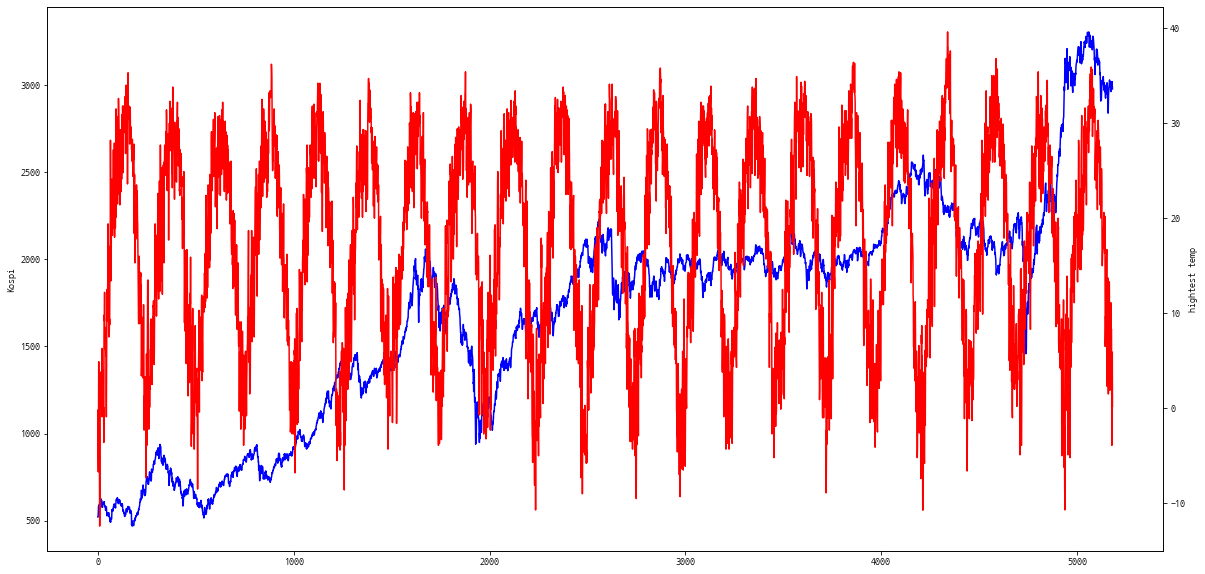

In [9]:
plt.figure(figsize=(20,10))
plt.plot(skd['kospi'],color='blue')
plt.ylabel('Kospi')

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(skd['최고기온(℃)'],color='red')
ax2.set_ylabel('hightest temp')

plt.show()

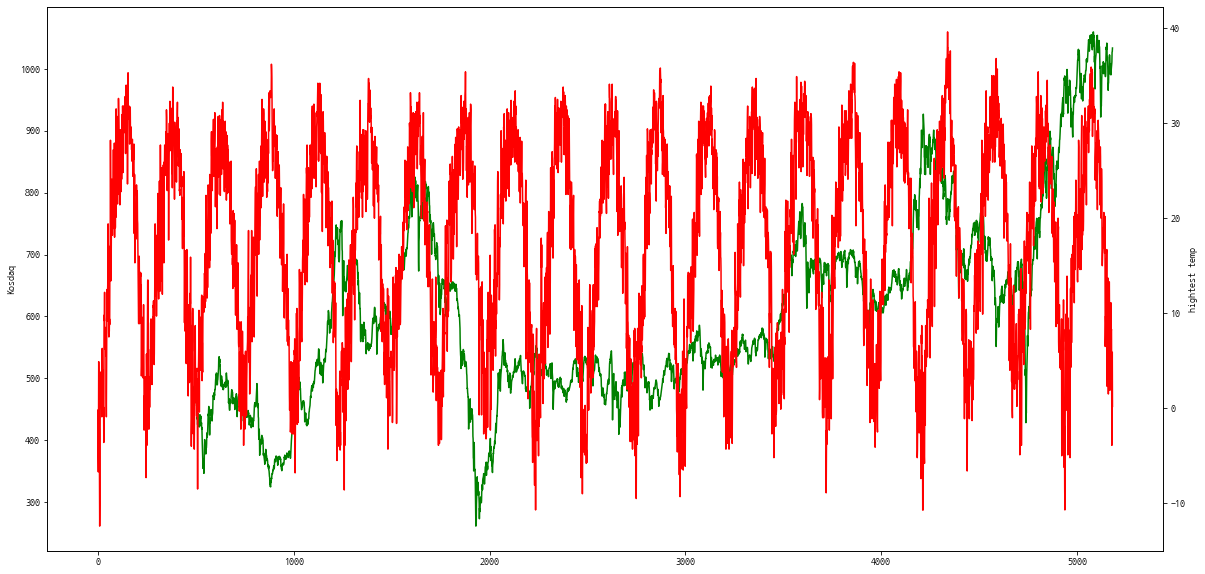

In [10]:
plt.figure(figsize=(20,10))
plt.plot(skd['kosdaq'],color='green')
plt.ylabel('Kosdaq')

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(skd['최고기온(℃)'],color='red')
ax2.set_ylabel('hightest temp')

plt.show()

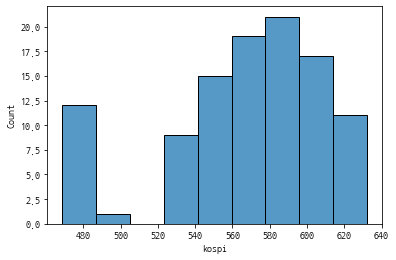

In [11]:
sns.histplot(data=skd_2001, x='kospi')

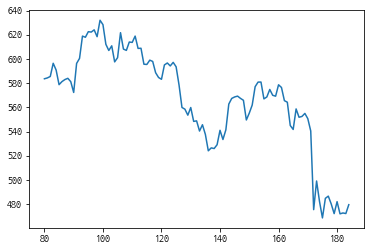

In [12]:
plt.plot(skd_2001['kospi'])

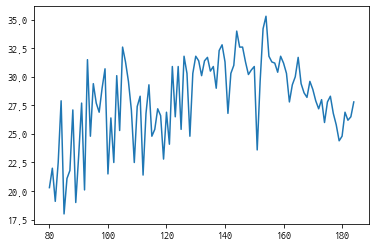

In [13]:
plt.plot(skd_2001['최고기온(℃)'])

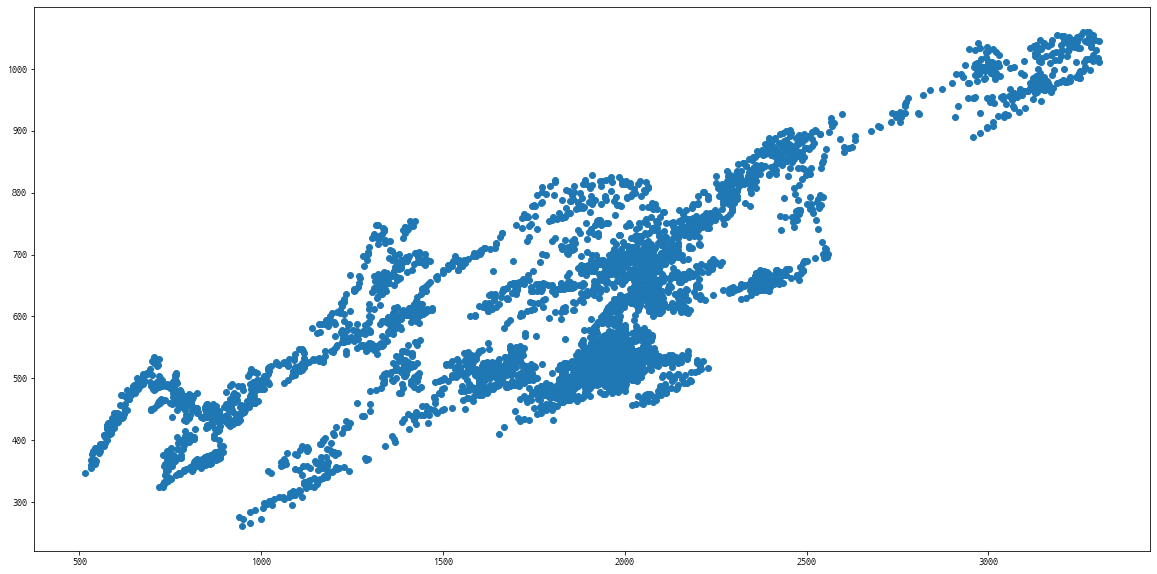

In [14]:
plt.figure(figsize=(20,10))
plt.scatter(data=skd, x='kospi', y='kosdaq')

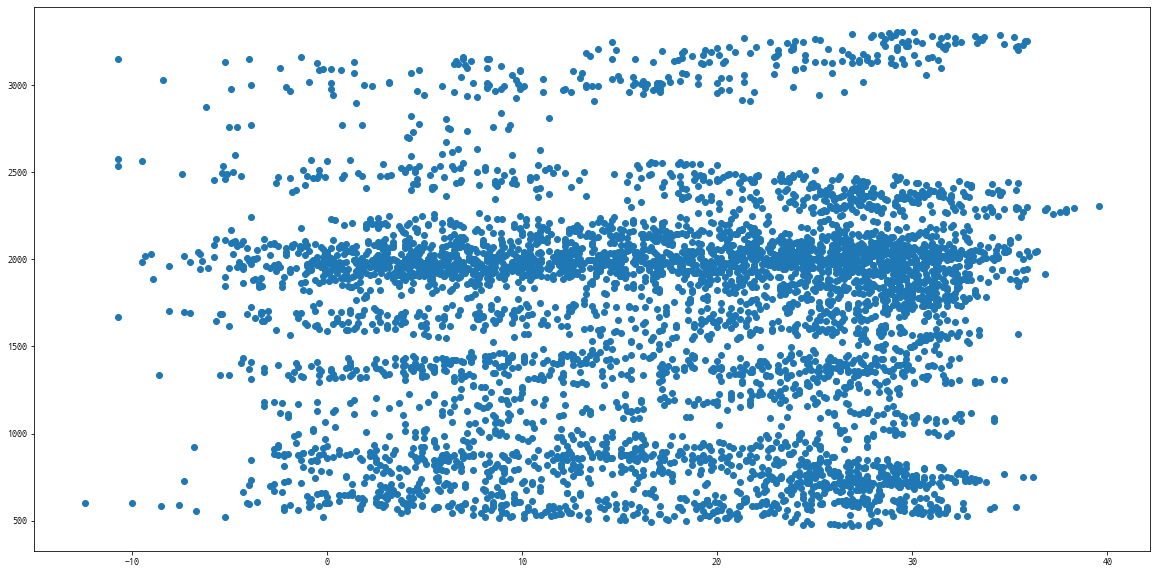

In [15]:
plt.figure(figsize=(20,10))
plt.scatter(data=skd, x='최고기온(℃)', y='kospi')

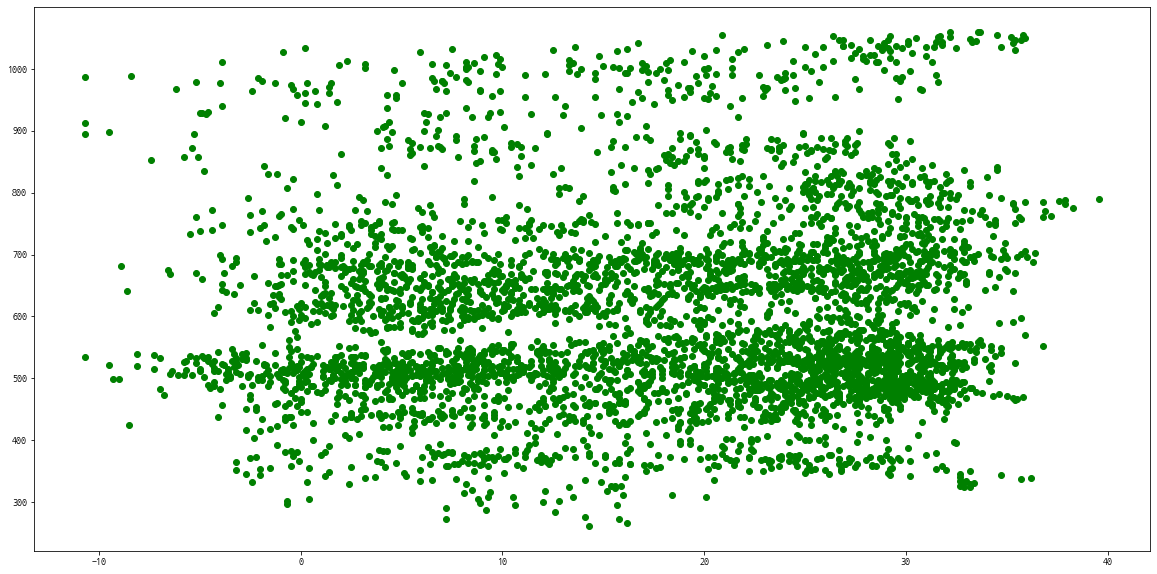

In [16]:
plt.figure(figsize=(20,10))
plt.scatter(data=skd, x='최고기온(℃)', y='kosdaq', color='green')

# 년도별 분석을 위해 한번에 그려보기
- 최고온도와 코스피, 코스닥 시각화
- 마찬가지로 반복문을 이용
  - 총 21개의 그림이 필요하니까 3*7 형태로 그림
  - 코스닥은 2003년부터 자료가 있음

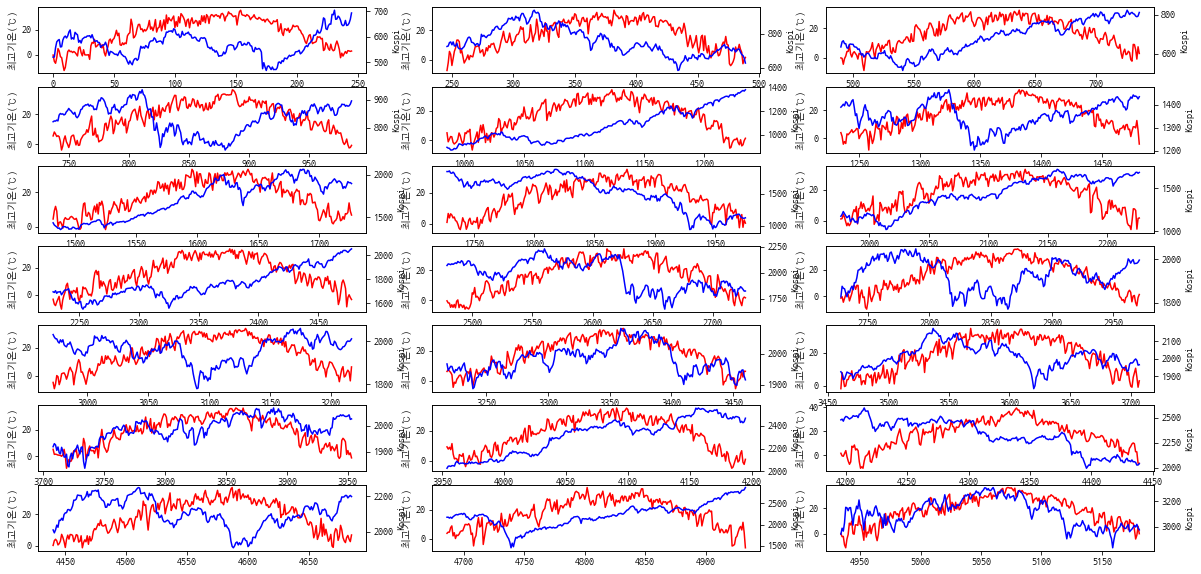

In [17]:
plt.figure(figsize = (20,10)) #2001년부터 2021년까지 최고기온과 kospi 총집합

for i in range(2001,2022):
    globals()['skd_{}'.format(i)] = skd[skd['date'].between('{}-01-01'.format(i),'{}-12-31'.format(i))]
    
    plt.subplot(7,3,i-2000)
    plt.plot(globals()['skd_{}'.format(i)]['최고기온(℃)'], color='red')
    plt.ylabel('최고기온(℃)')
    ax = plt.gca()
    ax2 = ax.twinx()
    ax2.plot(globals()['skd_{}'.format(i)]['kospi'], color='blue')
    ax2.set_ylabel('Kospi')


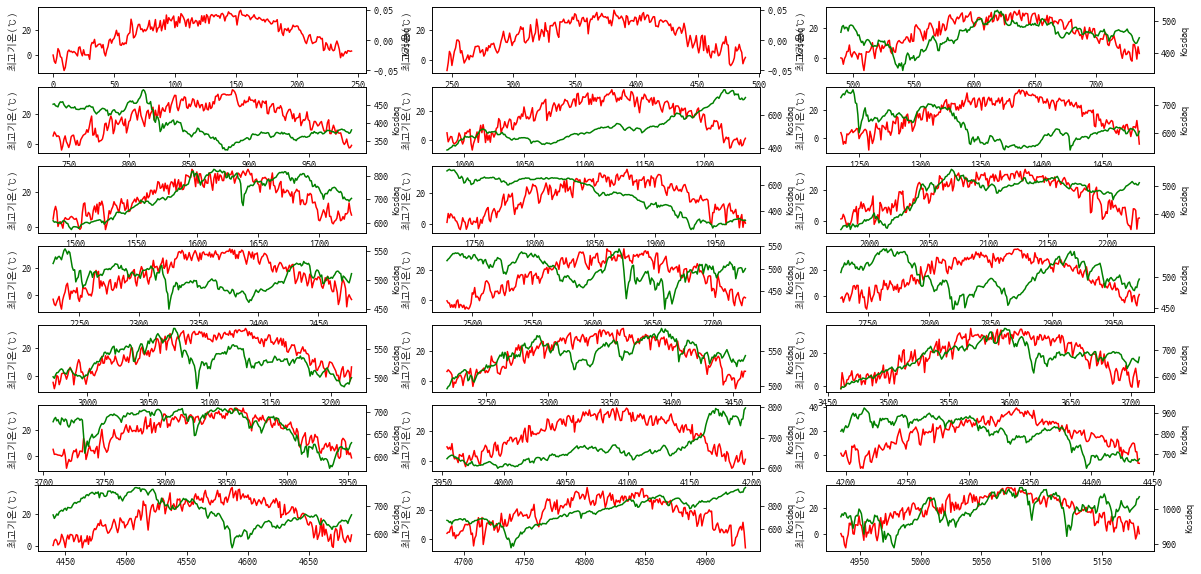

In [18]:
plt.figure(figsize = (20,10)) #2001년부터 2021년까지 최고기온과 kosdaq 총집합

for i in range(2001,2022):
    globals()['skd_{}'.format(i)] = skd[skd['date'].between('{}-01-01'.format(i),'{}-12-31'.format(i))]
    
    plt.subplot(7,3,i-2000)
    plt.plot(globals()['skd_{}'.format(i)]['최고기온(℃)'], color='red')
    plt.ylabel('최고기온(℃)')
    ax = plt.gca()
    ax2 = ax.twinx()
    ax2.plot(globals()['skd_{}'.format(i)]['kosdaq'], color='green')
    ax2.set_ylabel('Kosdaq')


#그림으로 봤을 때 그래프가 비슷한 년도들을 뽑아서 분석해보기
- 최고온도와 코스피 : 2010년, 2012년, 2014년, 2016년, 2021년
- 최고온도와 코스닥 : 2010년, 2015년, 2016년, 2017년, 2021년
- 겹치는 년도는 2010년, 2016년, 2021년
  - 이 3개년도 비교

## 2010년

In [19]:
skd_2010_corr = skd[['평균기온(℃)','최고기온(℃)','kospi','kosdaq']]

skd_2010_corr.corr()

평균기온(℃)   최고기온(℃)     kospi    kosdaq
평균기온(℃)  1.000000  0.990099  0.022687  0.047012
최고기온(℃)  0.990099  1.000000  0.037349  0.058814
kospi    0.022687  0.037349  1.000000  0.782806
kosdaq   0.047012  0.058814  0.782806  1.000000

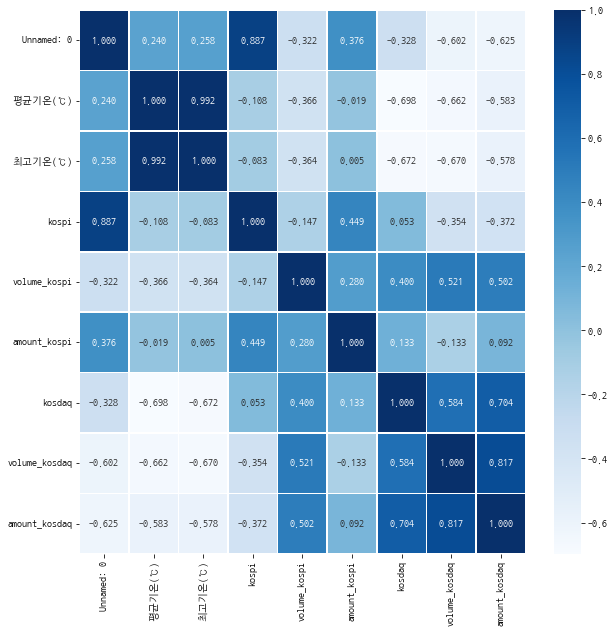

In [20]:
#2010년
plt.figure(figsize = (10,10))
sns.heatmap(data=skd_2010.corr(), annot=True, fmt='.3f', linewidths=.5, cmap='Blues')

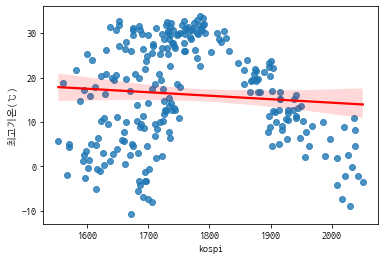

In [21]:
sns.regplot(data=skd_2010, x='kospi', y='최고기온(℃)', line_kws={'color':'red'})

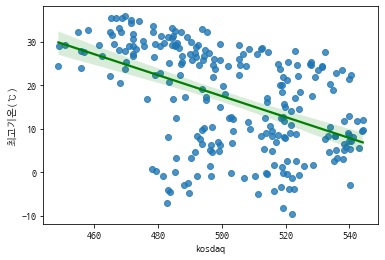

In [22]:
sns.regplot(data=skd_2012, x='kosdaq', y='최고기온(℃)', line_kws={'color':'green'})

##2016년

In [23]:
skd_2016_corr = skd[['평균기온(℃)','최고기온(℃)','kospi','kosdaq']]

skd_2016_corr.corr()

평균기온(℃)   최고기온(℃)     kospi    kosdaq
평균기온(℃)  1.000000  0.990099  0.022687  0.047012
최고기온(℃)  0.990099  1.000000  0.037349  0.058814
kospi    0.022687  0.037349  1.000000  0.782806
kosdaq   0.047012  0.058814  0.782806  1.000000

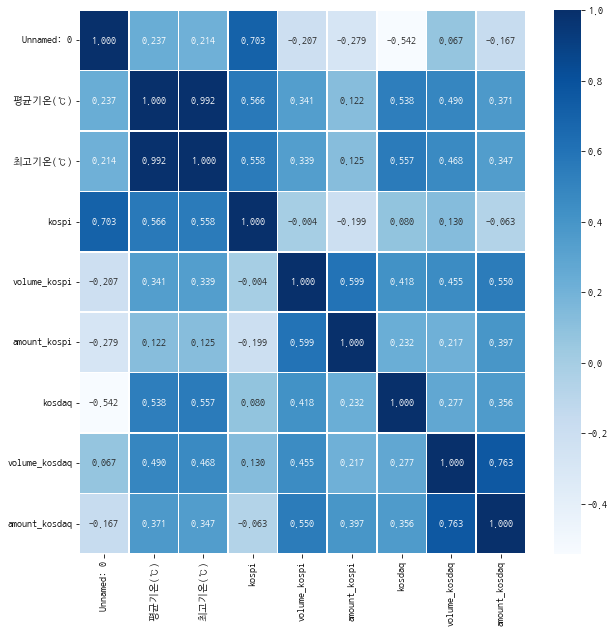

In [24]:
plt.figure(figsize = (10,10))
sns.heatmap(data=skd_2016.corr(), annot=True, fmt='.3f', linewidths=.5, cmap='Blues')

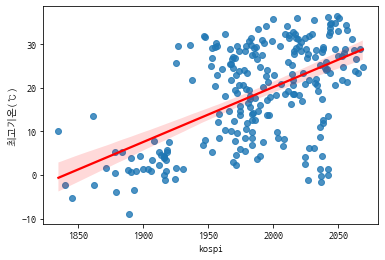

In [25]:
sns.regplot(data=skd_2016, x='kospi', y='최고기온(℃)', line_kws={'color':'red'})

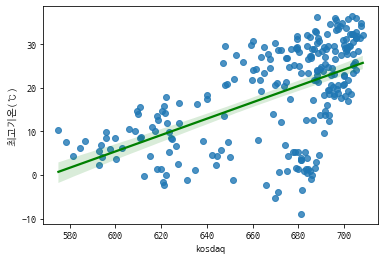

In [26]:
sns.regplot(data=skd_2016, x='kosdaq', y='최고기온(℃)', line_kws={'color':'green'})

##2021년

In [27]:
skd_2021_corr = skd[['평균기온(℃)','최고기온(℃)','kospi','kosdaq']]

skd_2021_corr.corr()

평균기온(℃)   최고기온(℃)     kospi    kosdaq
평균기온(℃)  1.000000  0.990099  0.022687  0.047012
최고기온(℃)  0.990099  1.000000  0.037349  0.058814
kospi    0.022687  0.037349  1.000000  0.782806
kosdaq   0.047012  0.058814  0.782806  1.000000

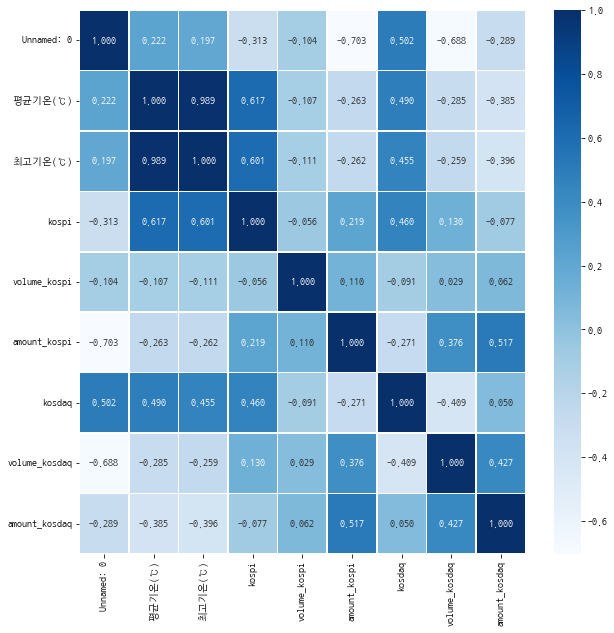

In [28]:
plt.figure(figsize = (10,10))
sns.heatmap(data=skd_2021.corr(), annot=True, fmt='.3f', linewidths=.5, cmap='Blues')

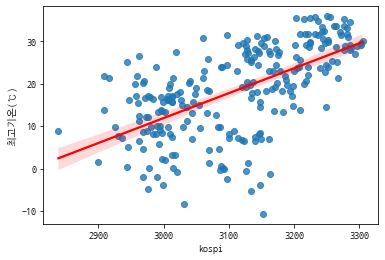

In [29]:
sns.regplot(data=skd_2021, x='kospi', y='최고기온(℃)', line_kws={'color':'red'})

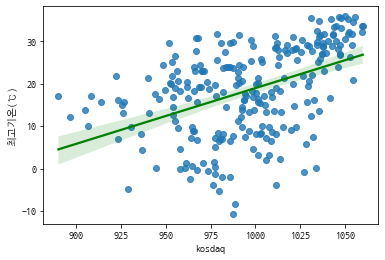

In [30]:
sns.regplot(data=skd_2021, x='kosdaq', y='최고기온(℃)', line_kws={'color':'green'})

# 2010년 전후로 분리


In [31]:
#2001년부터 2010년까지
skd_before2010 = skd[skd['date'].between('2001-05-01','2010-12-31')]

In [32]:
skd_before2010

Unnamed: 0 지점명        date  평균기온(℃)  최고기온(℃)    kospi  volume_kospi  \
80           121  서울  2001-05-02     16.2     20.3   583.70       59462.0   
81           122  서울  2001-05-03     16.1     22.0   584.40       39007.0   
82           123  서울  2001-05-04     15.0     19.1   585.60       39247.0   
83           126  서울  2001-05-07     18.3     22.5   596.50       47172.0   
84           127  서울  2001-05-08     20.4     27.9   590.91       48440.0   
...          ...  ..         ...      ...      ...      ...           ...   
2474        3644  서울  2010-12-24    -12.3     -9.0  2029.60       31250.0   
2475        3647  서울  2010-12-27     -4.9     -2.1  2022.19       26927.0   
2476        3648  서울  2010-12-28     -2.6     -0.1  2033.32       33787.0   
2477        3649  서울  2010-12-29     -5.7     -2.1  2043.49       27792.0   
2478        3650  서울  2010-12-30     -6.1     -3.6  2051.00       29736.0   

      amount_kospi  kosdaq  volume_kosdaq  amount_kosdaq  
80         23570.0     NaN            NaN            NaN  
81         18124.0     NaN            NaN            NaN  
82         16758.0     NaN            NaN            NaN  
83         21111.0     NaN            NaN            NaN  
84         21069.0     NaN            NaN            NaN  
...            ...     ...            ...            ...  
2474       47143.0  499.63        49224.0        14286.0  
2475       50742.0  496.68        56278.0        13817.0  
2476       56258.0  494.95        57598.0        17163.0  
2477       49678.0  502.31        54879.0        13963.0  
2478       52461.0  510.69        63515.0        19185.0  

[2399 rows x 11 columns]

In [33]:
#2011년부터 2021년까지
skd_after2010 = skd[skd['date'].between('2011-01-01','2021-12-31')]
skd_after2010

Unnamed: 0 지점명        date  평균기온(℃)  최고기온(℃)    kospi  volume_kospi  \
2479        3654  서울  2011-01-03     -4.5     -0.3  2070.08       34403.0   
2480        3655  서울  2011-01-04     -3.9     -1.7  2085.14       40636.0   
2481        3656  서울  2011-01-05     -4.0     -1.8  2082.55       37914.0   
2482        3657  서울  2011-01-06     -7.6     -4.6  2077.61       39677.0   
2483        3658  서울  2011-01-07     -7.0     -2.9  2086.20       32992.0   
...          ...  ..         ...      ...      ...      ...           ...   
5177        7661  서울  2021-12-24     -0.3      3.2  3012.43       53015.0   
5178        7664  서울  2021-12-27     -7.6     -3.9  2999.55       46290.0   
5179        7665  서울  2021-12-28     -4.1     -0.9  3020.24       59323.0   
5180        7666  서울  2021-12-29      0.4      5.9  2993.29       53660.0   
5181        7667  서울  2021-12-30     -3.9      0.2  2977.65       45404.0   

      amount_kospi   kosdaq  volume_kosdaq  amount_kosdaq  
2479       57805.0   518.05        59180.0        18253.0  
2480       76530.0   521.35        74981.0        24059.0  
2481       84514.0   523.81        67480.0        24617.0  
2482       86507.0   527.64        81399.0        32991.0  
2483       75753.0   530.84        67027.0        24786.0  
...            ...      ...            ...            ...  
5177       84694.0  1007.42       123576.0       108664.0  
5178       81341.0  1011.36       115153.0       100446.0  
5179      118684.0  1027.44       128675.0       132431.0  
5180      108018.0  1028.05        95094.0       116836.0  
5181       85951.0  1033.98        90742.0       101026.0  

[2703 rows x 11 columns]

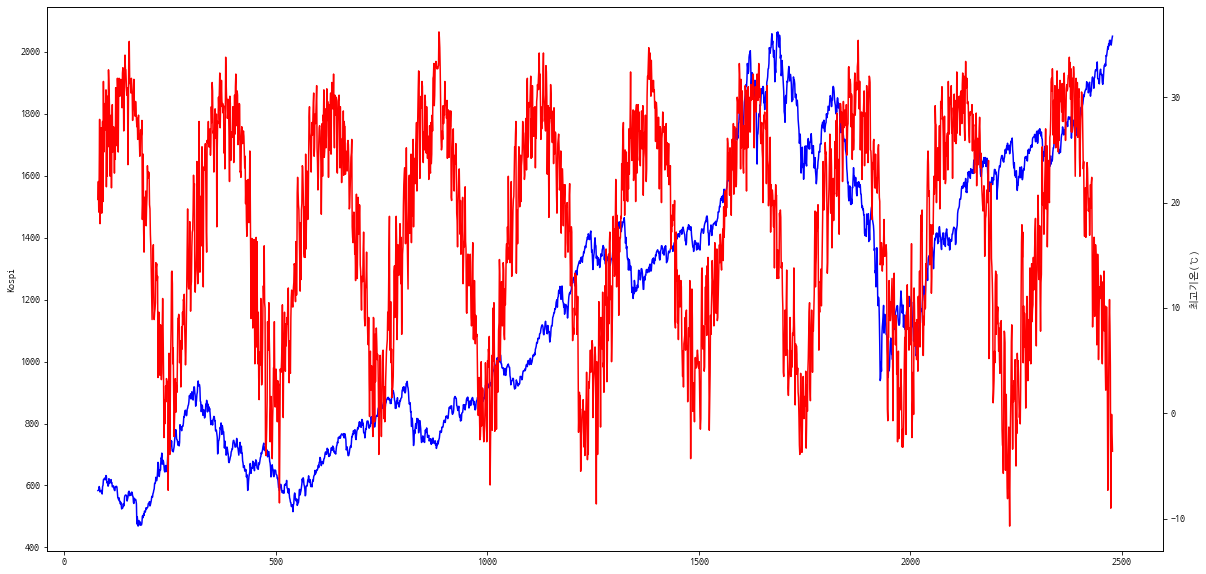

In [34]:
plt.figure(figsize=(20,10))
plt.plot(skd_before2010['kospi'],color='blue')
plt.ylabel('Kospi')

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(skd_before2010['최고기온(℃)'],color='red')
ax2.set_ylabel('최고기온(℃)')

plt.show()

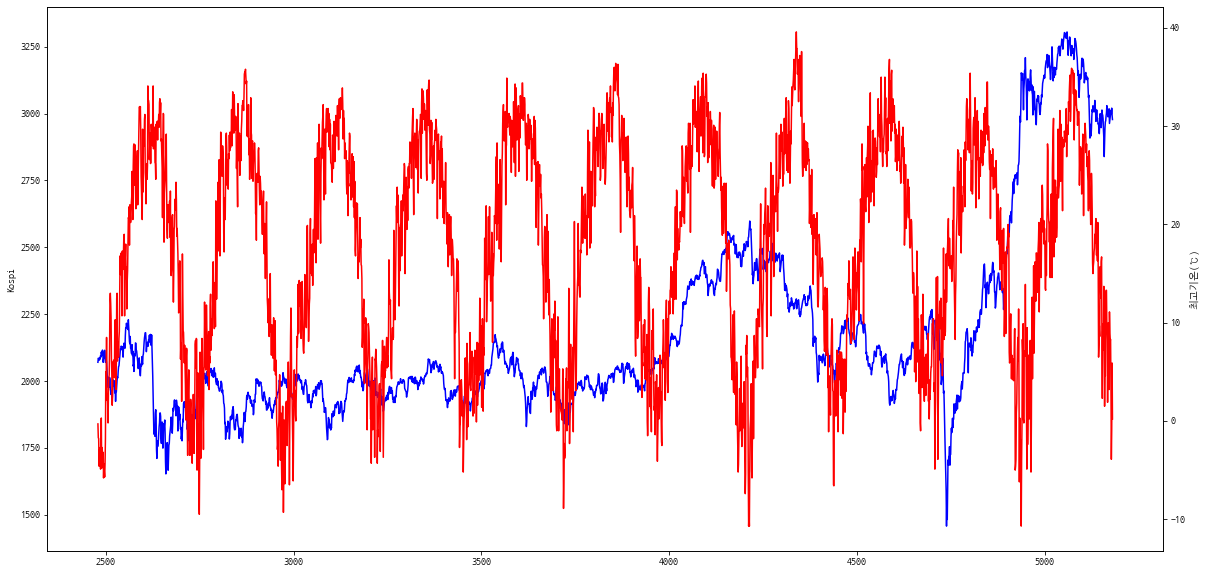

In [35]:
plt.figure(figsize=(20,10))
plt.plot(skd_after2010['kospi'],color='blue')
plt.ylabel('Kospi')

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(skd_after2010['최고기온(℃)'],color='red')
ax2.set_ylabel('최고기온(℃)')

plt.show()

# 코스피와 코스닥의 증감과는 연관이 있을까
- diff()함수로 코프시와 코스닥의 증감율을 추가해서 비교해보기

In [36]:
skd['kospi_diff'] = skd['kospi'].diff()
skd['kospi_diff'].fillna(method='bfill')

0        0.48
1        0.48
2       36.59
3       22.83
4        5.80
        ...  
5177    14.26
5178   -12.88
5179    20.69
5180   -26.95
5181   -15.64
Name: kospi_diff, Length: 5182, dtype: float64

In [37]:
skd['kosdaq_diff'] = skd['kosdaq'].diff()
skd['kosdaq_diff'].fillna(method='bfill')

0       17.40
1       17.40
2       17.40
3       17.40
4       17.40
        ...  
5177     4.11
5178     3.94
5179    16.08
5180     0.61
5181     5.93
Name: kosdaq_diff, Length: 5182, dtype: float64

In [38]:
skd

Unnamed: 0 지점명        date  평균기온(℃)  최고기온(℃)    kospi  volume_kospi  \
0              1  서울  2001-01-02     -4.3     -0.2   520.95       23101.0   
1              2  서울  2001-01-03     -8.3     -5.2   521.43       32458.0   
2              3  서울  2001-01-04     -9.8     -6.7   558.02       44454.0   
3              4  서울  2001-01-05     -6.8     -2.2   580.85       57829.0   
4              7  서울  2001-01-08      2.0      4.9   586.65       55865.0   
...          ...  ..         ...      ...      ...      ...           ...   
5177        7661  서울  2021-12-24     -0.3      3.2  3012.43       53015.0   
5178        7664  서울  2021-12-27     -7.6     -3.9  2999.55       46290.0   
5179        7665  서울  2021-12-28     -4.1     -0.9  3020.24       59323.0   
5180        7666  서울  2021-12-29      0.4      5.9  2993.29       53660.0   
5181        7667  서울  2021-12-30     -3.9      0.2  2977.65       45404.0   

      amount_kospi   kosdaq  volume_kosdaq  amount_kosdaq  kospi_diff  \
0          12233.0      NaN            NaN            NaN         NaN   
1          15834.0      NaN            NaN            NaN        0.48   
2          29848.0      NaN            NaN            NaN       36.59   
3          35696.0      NaN            NaN            NaN       22.83   
4          29481.0      NaN            NaN            NaN        5.80   
...            ...      ...            ...            ...         ...   
5177       84694.0  1007.42       123576.0       108664.0       14.26   
5178       81341.0  1011.36       115153.0       100446.0      -12.88   
5179      118684.0  1027.44       128675.0       132431.0       20.69   
5180      108018.0  1028.05        95094.0       116836.0      -26.95   
5181       85951.0  1033.98        90742.0       101026.0      -15.64   

      kosdaq_diff  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
...           ...  
5177         4.11  
5178         3.94  
5179        16.08  
5180         0.61  
5181         5.93  

[5182 rows x 13 columns]

In [39]:
# sns.barplot(data=skd, x='date', y='kospi_diff')

In [40]:
# sns.barplot(data=skd, x='date', y='kosdaq_diff')

In [41]:
skd_diff = skd[['kospi_diff','kosdaq_diff','최고기온(℃)','평균기온(℃)']]

skd_diff.corr()

kospi_diff  kosdaq_diff   최고기온(℃)   평균기온(℃)
kospi_diff     1.000000     0.725252 -0.017516 -0.018797
kosdaq_diff    0.725252     1.000000 -0.023351 -0.026127
최고기온(℃)       -0.017516    -0.023351  1.000000  0.990099
평균기온(℃)       -0.018797    -0.026127  0.990099  1.000000

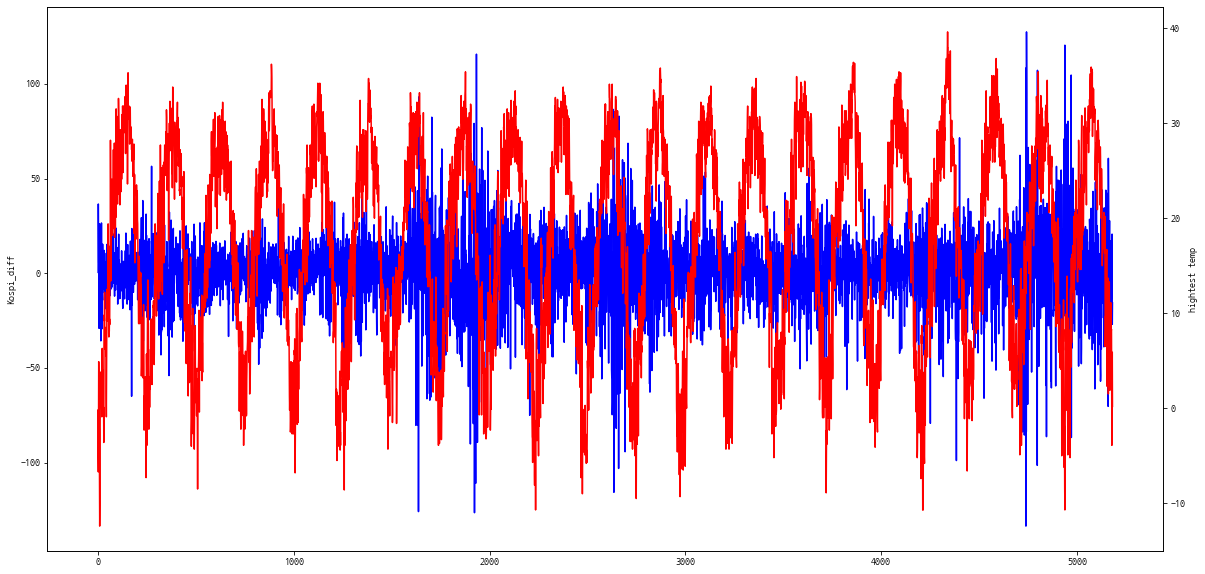

In [42]:
plt.figure(figsize=(20,10))
plt.plot(skd['kospi_diff'],color='blue')
plt.ylabel('Kospi_diff')

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(skd['최고기온(℃)'],color='red')
ax2.set_ylabel('hightest temp')

plt.show()

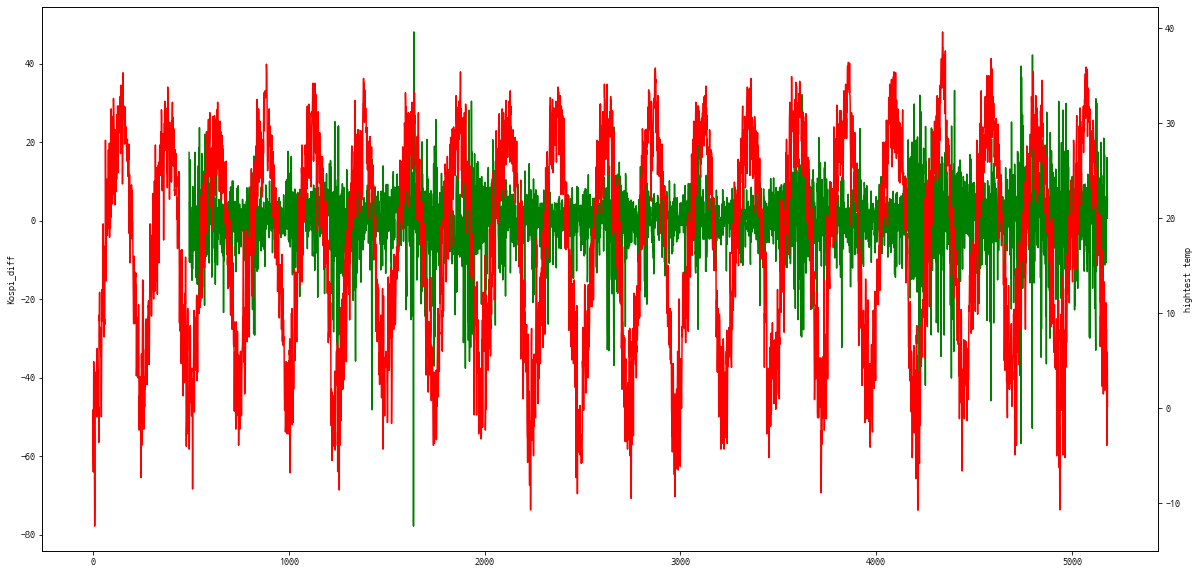

In [43]:
plt.figure(figsize=(20,10))
plt.plot(skd['kosdaq_diff'],color='green')
plt.ylabel('Kospi_diff')

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(skd['최고기온(℃)'],color='red')
ax2.set_ylabel('hightest temp')

plt.show()

In [44]:
skd['kospi'].pct_change()  #pct_change() : 수익률 계산

0            NaN
1       0.000921
2       0.070172
3       0.040913
4       0.009985
          ...   
5177    0.004756
5178   -0.004276
5179    0.006898
5180   -0.008923
5181   -0.005225
Name: kospi, Length: 5182, dtype: float64

In [45]:
skd['kosdaq'].pct_change()

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
5177    0.004096
5178    0.003911
5179    0.015899
5180    0.000594
5181    0.005768
Name: kosdaq, Length: 5182, dtype: float64

In [46]:
skd['kospi_pct'] = round((skd['kospi'].pct_change()*100),2 )
skd['kosdaq_pct'] = round((skd['kosdaq'].pct_change()*100),2 )

In [47]:
skd

Unnamed: 0 지점명        date  평균기온(℃)  최고기온(℃)    kospi  volume_kospi  \
0              1  서울  2001-01-02     -4.3     -0.2   520.95       23101.0   
1              2  서울  2001-01-03     -8.3     -5.2   521.43       32458.0   
2              3  서울  2001-01-04     -9.8     -6.7   558.02       44454.0   
3              4  서울  2001-01-05     -6.8     -2.2   580.85       57829.0   
4              7  서울  2001-01-08      2.0      4.9   586.65       55865.0   
...          ...  ..         ...      ...      ...      ...           ...   
5177        7661  서울  2021-12-24     -0.3      3.2  3012.43       53015.0   
5178        7664  서울  2021-12-27     -7.6     -3.9  2999.55       46290.0   
5179        7665  서울  2021-12-28     -4.1     -0.9  3020.24       59323.0   
5180        7666  서울  2021-12-29      0.4      5.9  2993.29       53660.0   
5181        7667  서울  2021-12-30     -3.9      0.2  2977.65       45404.0   

      amount_kospi   kosdaq  volume_kosdaq  amount_kosdaq  kospi_diff  \
0          12233.0      NaN            NaN            NaN         NaN   
1          15834.0      NaN            NaN            NaN        0.48   
2          29848.0      NaN            NaN            NaN       36.59   
3          35696.0      NaN            NaN            NaN       22.83   
4          29481.0      NaN            NaN            NaN        5.80   
...            ...      ...            ...            ...         ...   
5177       84694.0  1007.42       123576.0       108664.0       14.26   
5178       81341.0  1011.36       115153.0       100446.0      -12.88   
5179      118684.0  1027.44       128675.0       132431.0       20.69   
5180      108018.0  1028.05        95094.0       116836.0      -26.95   
5181       85951.0  1033.98        90742.0       101026.0      -15.64   

      kosdaq_diff  kospi_pct  kosdaq_pct  
0             NaN        NaN         NaN  
1             NaN       0.09         NaN  
2             NaN       7.02         NaN  
3             NaN       4.09         NaN  
4             NaN       1.00         NaN  
...           ...        ...         ...  
5177         4.11       0.48        0.41  
5178         3.94      -0.43        0.39  
5179        16.08       0.69        1.59  
5180         0.61      -0.89        0.06  
5181         5.93      -0.52        0.58  

[5182 rows x 15 columns]

In [48]:
skd_diff_pct = skd[['kospi_diff','kosdaq_diff','kospi_pct','kosdaq_pct','최고기온(℃)','평균기온(℃)']]

skd_diff_pct.corr()

kospi_diff  kosdaq_diff  kospi_pct  kosdaq_pct   최고기온(℃)  \
kospi_diff     1.000000     0.725252   0.906547    0.723851 -0.017516   
kosdaq_diff    0.725252     1.000000   0.708061    0.958820 -0.023351   
kospi_pct      0.906547     0.708061   1.000000    0.772092 -0.015730   
kosdaq_pct     0.723851     0.958820   0.772092    1.000000 -0.022960   
최고기온(℃)       -0.017516    -0.023351  -0.015730   -0.022960  1.000000   
평균기온(℃)       -0.018797    -0.026127  -0.017468   -0.026300  0.990099   

              평균기온(℃)  
kospi_diff  -0.018797  
kosdaq_diff -0.026127  
kospi_pct   -0.017468  
kosdaq_pct  -0.026300  
최고기온(℃)      0.990099  
평균기온(℃)      1.000000

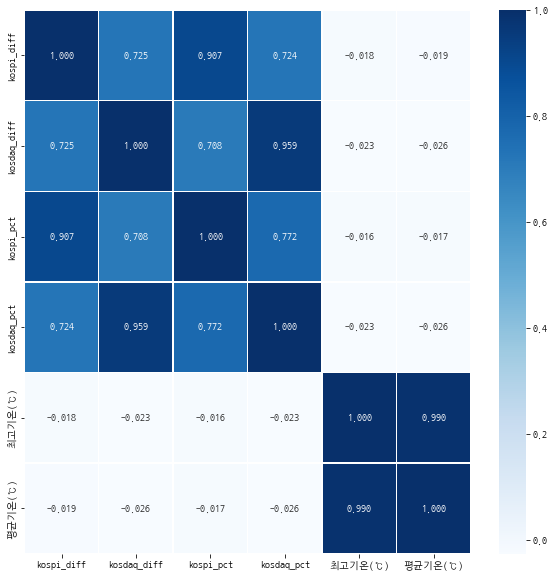

In [49]:
plt.figure(figsize = (10,10))
sns.heatmap(data=skd_diff_pct.corr(), annot=True, fmt='.3f', linewidths=.5, cmap='Blues')

In [50]:
skd['최고기온_pct'] = skd['최고기온(℃)'].pct_change()

In [51]:
skd['최고기온_pct'] 

0             NaN
1       25.000000
2        0.288462
3       -0.671642
4       -3.227273
          ...    
5177    -0.614458
5178    -2.218750
5179    -0.769231
5180    -7.555556
5181    -0.966102
Name: 최고기온_pct, Length: 5182, dtype: float64

In [52]:
skd

Unnamed: 0 지점명        date  평균기온(℃)  최고기온(℃)    kospi  volume_kospi  \
0              1  서울  2001-01-02     -4.3     -0.2   520.95       23101.0   
1              2  서울  2001-01-03     -8.3     -5.2   521.43       32458.0   
2              3  서울  2001-01-04     -9.8     -6.7   558.02       44454.0   
3              4  서울  2001-01-05     -6.8     -2.2   580.85       57829.0   
4              7  서울  2001-01-08      2.0      4.9   586.65       55865.0   
...          ...  ..         ...      ...      ...      ...           ...   
5177        7661  서울  2021-12-24     -0.3      3.2  3012.43       53015.0   
5178        7664  서울  2021-12-27     -7.6     -3.9  2999.55       46290.0   
5179        7665  서울  2021-12-28     -4.1     -0.9  3020.24       59323.0   
5180        7666  서울  2021-12-29      0.4      5.9  2993.29       53660.0   
5181        7667  서울  2021-12-30     -3.9      0.2  2977.65       45404.0   

      amount_kospi   kosdaq  volume_kosdaq  amount_kosdaq  kospi_diff  \
0          12233.0      NaN            NaN            NaN         NaN   
1          15834.0      NaN            NaN            NaN        0.48   
2          29848.0      NaN            NaN            NaN       36.59   
3          35696.0      NaN            NaN            NaN       22.83   
4          29481.0      NaN            NaN            NaN        5.80   
...            ...      ...            ...            ...         ...   
5177       84694.0  1007.42       123576.0       108664.0       14.26   
5178       81341.0  1011.36       115153.0       100446.0      -12.88   
5179      118684.0  1027.44       128675.0       132431.0       20.69   
5180      108018.0  1028.05        95094.0       116836.0      -26.95   
5181       85951.0  1033.98        90742.0       101026.0      -15.64   

      kosdaq_diff  kospi_pct  kosdaq_pct   최고기온_pct  
0             NaN        NaN         NaN        NaN  
1             NaN       0.09         NaN  25.000000  
2             NaN       7.02         NaN   0.288462  
3             NaN       4.09         NaN  -0.671642  
4             NaN       1.00         NaN  -3.227273  
...           ...        ...         ...        ...  
5177         4.11       0.48        0.41  -0.614458  
5178         3.94      -0.43        0.39  -2.218750  
5179        16.08       0.69        1.59  -0.769231  
5180         0.61      -0.89        0.06  -7.555556  
5181         5.93      -0.52        0.58  -0.966102  

[5182 rows x 16 columns]

In [53]:
skd['평균기온_pct'] = skd['평균기온(℃)'].pct_change()
skd

Unnamed: 0 지점명        date  평균기온(℃)  최고기온(℃)    kospi  volume_kospi  \
0              1  서울  2001-01-02     -4.3     -0.2   520.95       23101.0   
1              2  서울  2001-01-03     -8.3     -5.2   521.43       32458.0   
2              3  서울  2001-01-04     -9.8     -6.7   558.02       44454.0   
3              4  서울  2001-01-05     -6.8     -2.2   580.85       57829.0   
4              7  서울  2001-01-08      2.0      4.9   586.65       55865.0   
...          ...  ..         ...      ...      ...      ...           ...   
5177        7661  서울  2021-12-24     -0.3      3.2  3012.43       53015.0   
5178        7664  서울  2021-12-27     -7.6     -3.9  2999.55       46290.0   
5179        7665  서울  2021-12-28     -4.1     -0.9  3020.24       59323.0   
5180        7666  서울  2021-12-29      0.4      5.9  2993.29       53660.0   
5181        7667  서울  2021-12-30     -3.9      0.2  2977.65       45404.0   

      amount_kospi   kosdaq  volume_kosdaq  amount_kosdaq  kospi_diff  \
0          12233.0      NaN            NaN            NaN         NaN   
1          15834.0      NaN            NaN            NaN        0.48   
2          29848.0      NaN            NaN            NaN       36.59   
3          35696.0      NaN            NaN            NaN       22.83   
4          29481.0      NaN            NaN            NaN        5.80   
...            ...      ...            ...            ...         ...   
5177       84694.0  1007.42       123576.0       108664.0       14.26   
5178       81341.0  1011.36       115153.0       100446.0      -12.88   
5179      118684.0  1027.44       128675.0       132431.0       20.69   
5180      108018.0  1028.05        95094.0       116836.0      -26.95   
5181       85951.0  1033.98        90742.0       101026.0      -15.64   

      kosdaq_diff  kospi_pct  kosdaq_pct   최고기온_pct   평균기온_pct  
0             NaN        NaN         NaN        NaN        NaN  
1             NaN       0.09         NaN  25.000000   0.930233  
2             NaN       7.02         NaN   0.288462   0.180723  
3             NaN       4.09         NaN  -0.671642  -0.306122  
4             NaN       1.00         NaN  -3.227273  -1.294118  
...           ...        ...         ...        ...        ...  
5177         4.11       0.48        0.41  -0.614458  -1.111111  
5178         3.94      -0.43        0.39  -2.218750  24.333333  
5179        16.08       0.69        1.59  -0.769231  -0.460526  
5180         0.61      -0.89        0.06  -7.555556  -1.097561  
5181         5.93      -0.52        0.58  -0.966102 -10.750000  

[5182 rows x 17 columns]

In [54]:
skd_diff_pct = skd[['kospi_diff','kosdaq_diff','kospi_pct','kosdaq_pct','최고기온(℃)','평균기온(℃)','최고기온_pct','평균기온_pct']]

skd_diff_pct.corr()

kospi_diff  kosdaq_diff  kospi_pct  kosdaq_pct   최고기온(℃)  \
kospi_diff     1.000000     0.725252   0.906547    0.723851 -0.017516   
kosdaq_diff    0.725252     1.000000   0.708061    0.958820 -0.023351   
kospi_pct      0.906547     0.708061   1.000000    0.772092 -0.015730   
kosdaq_pct     0.723851     0.958820   0.772092    1.000000 -0.022960   
최고기온(℃)       -0.017516    -0.023351  -0.015730   -0.022960  1.000000   
평균기온(℃)       -0.018797    -0.026127  -0.017468   -0.026300  0.990099   
최고기온_pct      -0.005791    -0.011266  -0.012907   -0.012181  0.050520   
평균기온_pct      -0.028316    -0.019632  -0.006523   -0.009822  0.079354   

              평균기온(℃)  최고기온_pct  평균기온_pct  
kospi_diff  -0.018797 -0.005791 -0.028316  
kosdaq_diff -0.026127 -0.011266 -0.019632  
kospi_pct   -0.017468 -0.012907 -0.006523  
kosdaq_pct  -0.026300 -0.012181 -0.009822  
최고기온(℃)      0.990099  0.050520  0.079354  
평균기온(℃)      1.000000  0.048371  0.077144  
최고기온_pct     0.048371  1.000000  0.009607  
평균기온_pct     0.077144  0.009607  1.000000

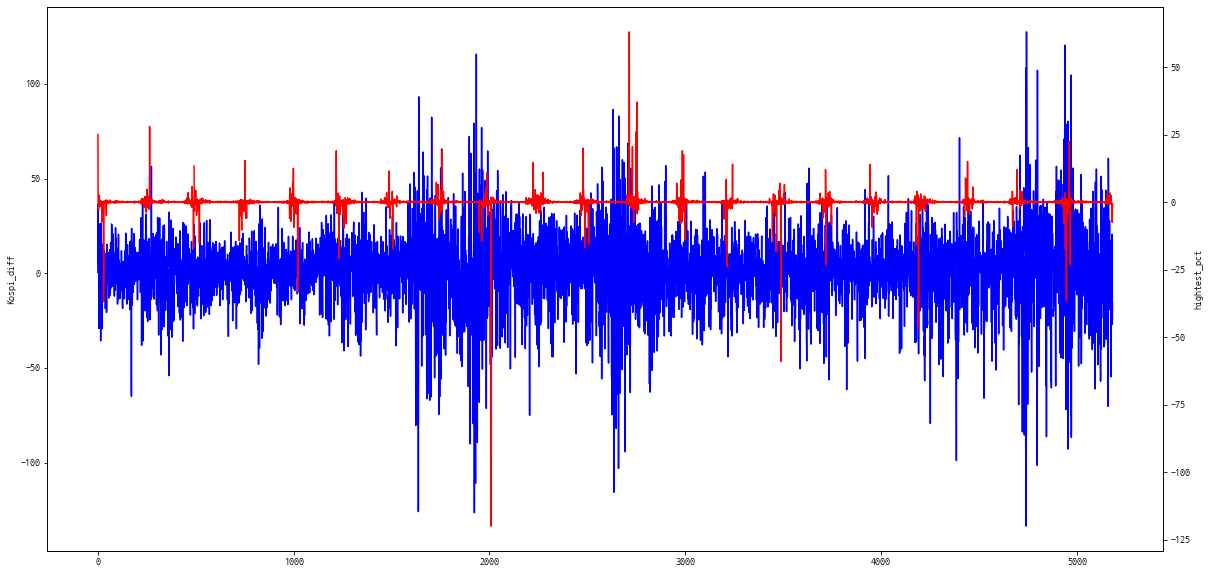

In [55]:
plt.figure(figsize=(20,10))
plt.plot(skd['kospi_diff'],color='blue')
plt.ylabel('Kospi_diff')

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(skd['최고기온_pct'],color='red')
ax2.set_ylabel('hightest_pct')

plt.show()

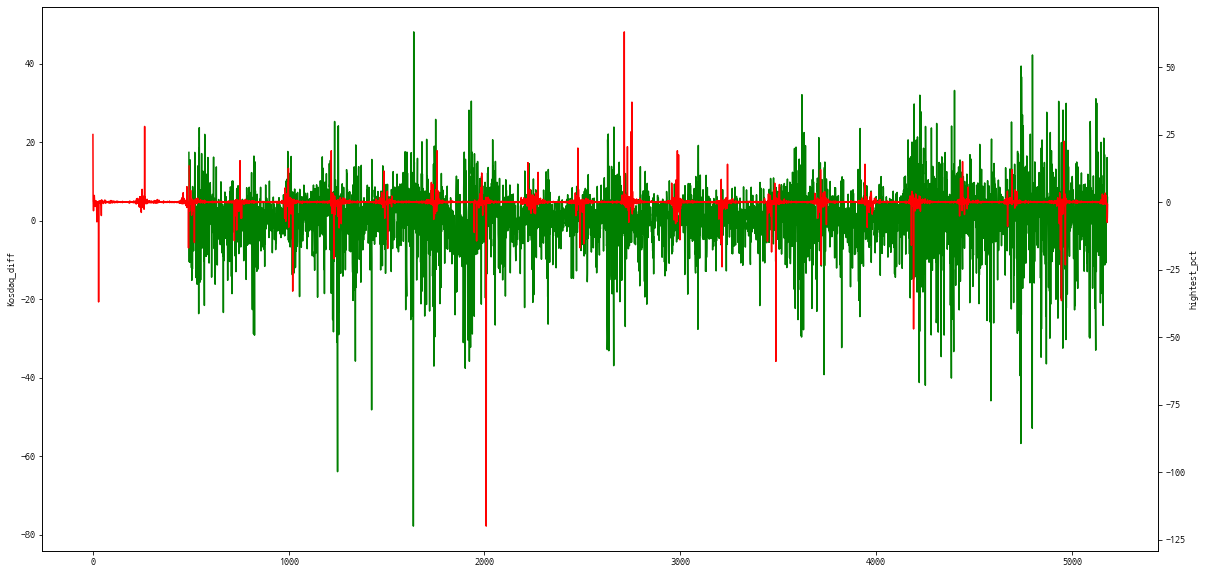

In [56]:
plt.figure(figsize=(20,10))
plt.plot(skd['kosdaq_diff'],color='green')
plt.ylabel('Kosdaq_diff')

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(skd['최고기온_pct'],color='red')
ax2.set_ylabel('hightest_pct')

plt.show()

# 기온 별로 구분해서 비교하기
- 35도 이상, 30도 이상, 25도 이상, 25도 미만으로 구분

In [57]:
skd_temp = skd.copy()
skd_temp1 = skd.copy()
skd_temp = skd_temp.assign(날씨='0')
for i in range(1,len(skd_temp)):
  if skd_temp['최고기온(℃)'][i] > 35:
    skd_temp['날씨'][i] = '35℃ 이상'
  elif skd_temp['최고기온(℃)'][i] > 30:
    skd_temp['날씨'][i] = '30℃ 이상'
  elif skd_temp['최고기온(℃)'][i] > 25:
    skd_temp['날씨'][i] = '25℃ 이상'
  elif skd_temp['최고기온(℃)'][i] > 20:
    skd_temp['날씨'][i] = '20℃ 이상'
  elif skd_temp['최고기온(℃)'][i] > 15:
    skd_temp['날씨'][i] = '15℃ 이상'
  elif skd_temp['최고기온(℃)'][i] > 10:
    skd_temp['날씨'][i] = '10℃ 이상'
  elif skd_temp['최고기온(℃)'][i] > 5:
    skd_temp['날씨'][i] = '5℃ 이상'
  elif skd_temp['최고기온(℃)'][i] > 0:
    skd_temp['날씨'][i] = '0℃ 이상'
  else:
    skd_temp['날씨'][i] = '영하'

skd_temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to b

Unnamed: 0 지점명        date  평균기온(℃)  최고기온(℃)    kospi  volume_kospi  \
0              1  서울  2001-01-02     -4.3     -0.2   520.95       23101.0   
1              2  서울  2001-01-03     -8.3     -5.2   521.43       32458.0   
2              3  서울  2001-01-04     -9.8     -6.7   558.02       44454.0   
3              4  서울  2001-01-05     -6.8     -2.2   580.85       57829.0   
4              7  서울  2001-01-08      2.0      4.9   586.65       55865.0   
...          ...  ..         ...      ...      ...      ...           ...   
5177        7661  서울  2021-12-24     -0.3      3.2  3012.43       53015.0   
5178        7664  서울  2021-12-27     -7.6     -3.9  2999.55       46290.0   
5179        7665  서울  2021-12-28     -4.1     -0.9  3020.24       59323.0   
5180        7666  서울  2021-12-29      0.4      5.9  2993.29       53660.0   
5181        7667  서울  2021-12-30     -3.9      0.2  2977.65       45404.0   

      amount_kospi   kosdaq  volume_kosdaq  amount_kosdaq  kospi_diff  \
0          12233.0      NaN            NaN            NaN         NaN   
1          15834.0      NaN            NaN            NaN        0.48   
2          29848.0      NaN            NaN            NaN       36.59   
3          35696.0      NaN            NaN            NaN       22.83   
4          29481.0      NaN            NaN            NaN        5.80   
...            ...      ...            ...            ...         ...   
5177       84694.0  1007.42       123576.0       108664.0       14.26   
5178       81341.0  1011.36       115153.0       100446.0      -12.88   
5179      118684.0  1027.44       128675.0       132431.0       20.69   
5180      108018.0  1028.05        95094.0       116836.0      -26.95   
5181       85951.0  1033.98        90742.0       101026.0      -15.64   

      kosdaq_diff  kospi_pct  kosdaq_pct   최고기온_pct   평균기온_pct     날씨  
0             NaN        NaN         NaN        NaN        NaN      0  
1             NaN       0.09         NaN  25.000000   0.930233     영하  
2             NaN       7.02         NaN   0.288462   0.180723     영하  
3             NaN       4.09         NaN  -0.671642  -0.306122     영하  
4             NaN       1.00         NaN  -3.227273  -1.294118  0℃ 이상  
...           ...        ...         ...        ...        ...    ...  
5177         4.11       0.48        0.41  -0.614458  -1.111111  0℃ 이상  
5178         3.94      -0.43        0.39  -2.218750  24.333333     영하  
5179        16.08       0.69        1.59  -0.769231  -0.460526     영하  
5180         0.61      -0.89        0.06  -7.555556  -1.097561  5℃ 이상  
5181         5.93      -0.52        0.58  -0.966102 -10.750000  0℃ 이상  

[5182 rows x 18 columns]

In [58]:
skd_temp

Unnamed: 0 지점명        date  평균기온(℃)  최고기온(℃)    kospi  volume_kospi  \
0              1  서울  2001-01-02     -4.3     -0.2   520.95       23101.0   
1              2  서울  2001-01-03     -8.3     -5.2   521.43       32458.0   
2              3  서울  2001-01-04     -9.8     -6.7   558.02       44454.0   
3              4  서울  2001-01-05     -6.8     -2.2   580.85       57829.0   
4              7  서울  2001-01-08      2.0      4.9   586.65       55865.0   
...          ...  ..         ...      ...      ...      ...           ...   
5177        7661  서울  2021-12-24     -0.3      3.2  3012.43       53015.0   
5178        7664  서울  2021-12-27     -7.6     -3.9  2999.55       46290.0   
5179        7665  서울  2021-12-28     -4.1     -0.9  3020.24       59323.0   
5180        7666  서울  2021-12-29      0.4      5.9  2993.29       53660.0   
5181        7667  서울  2021-12-30     -3.9      0.2  2977.65       45404.0   

      amount_kospi   kosdaq  volume_kosdaq  amount_kosdaq  kospi_diff  \
0          12233.0      NaN            NaN            NaN         NaN   
1          15834.0      NaN            NaN            NaN        0.48   
2          29848.0      NaN            NaN            NaN       36.59   
3          35696.0      NaN            NaN            NaN       22.83   
4          29481.0      NaN            NaN            NaN        5.80   
...            ...      ...            ...            ...         ...   
5177       84694.0  1007.42       123576.0       108664.0       14.26   
5178       81341.0  1011.36       115153.0       100446.0      -12.88   
5179      118684.0  1027.44       128675.0       132431.0       20.69   
5180      108018.0  1028.05        95094.0       116836.0      -26.95   
5181       85951.0  1033.98        90742.0       101026.0      -15.64   

      kosdaq_diff  kospi_pct  kosdaq_pct   최고기온_pct   평균기온_pct     날씨  
0             NaN        NaN         NaN        NaN        NaN      0  
1             NaN       0.09         NaN  25.000000   0.930233     영하  
2             NaN       7.02         NaN   0.288462   0.180723     영하  
3             NaN       4.09         NaN  -0.671642  -0.306122     영하  
4             NaN       1.00         NaN  -3.227273  -1.294118  0℃ 이상  
...           ...        ...         ...        ...        ...    ...  
5177         4.11       0.48        0.41  -0.614458  -1.111111  0℃ 이상  
5178         3.94      -0.43        0.39  -2.218750  24.333333     영하  
5179        16.08       0.69        1.59  -0.769231  -0.460526     영하  
5180         0.61      -0.89        0.06  -7.555556  -1.097561  5℃ 이상  
5181         5.93      -0.52        0.58  -0.966102 -10.750000  0℃ 이상  

[5182 rows x 18 columns]

## 기온별 날씨 일수

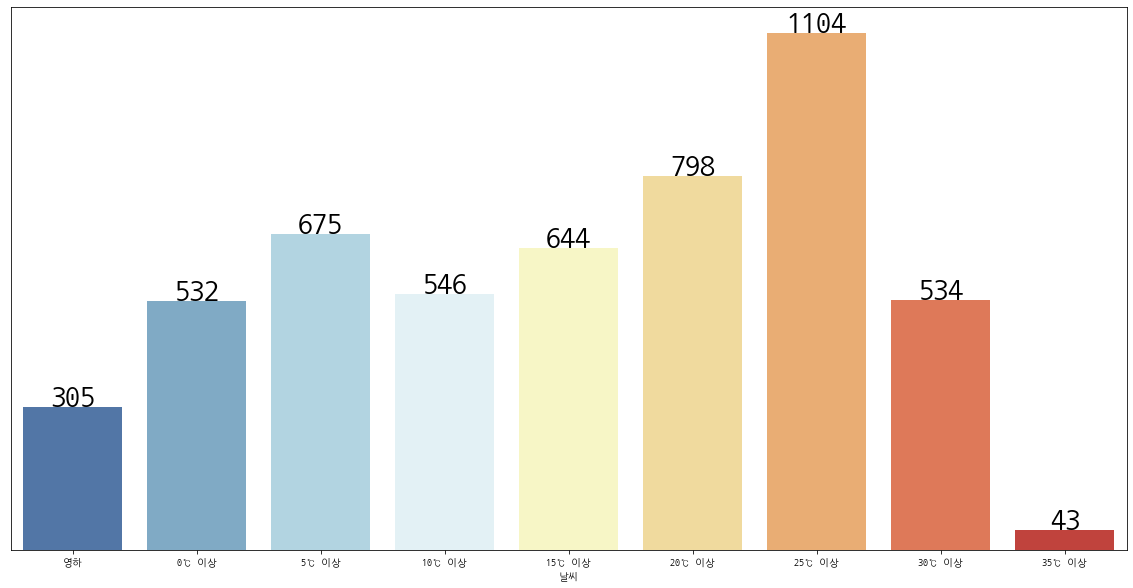

In [59]:
plt.figure(figsize=(20,10))
# cplt = sns.countplot(x='날씨', data=skd_temp, order=skd_temp['날씨'].value_counts().index)
cplt = sns.countplot(x='날씨', data=skd_temp, order=['영하','0℃ 이상','5℃ 이상','10℃ 이상','15℃ 이상','20℃ 이상','25℃ 이상','30℃ 이상','35℃ 이상'], palette='RdYlBu_r')


for x in cplt.patches:
  height = x.get_height()
  cplt.text(x.get_x() + x.get_width()/2., height+3, height, ha='center', size=30)

plt.ylabel('')

plt.rc('xtick', labelsize=20)

ax = plt.gca()
ax.axes.yaxis.set_ticks([])

plt.show()  

## 기온별 코스피 증감율

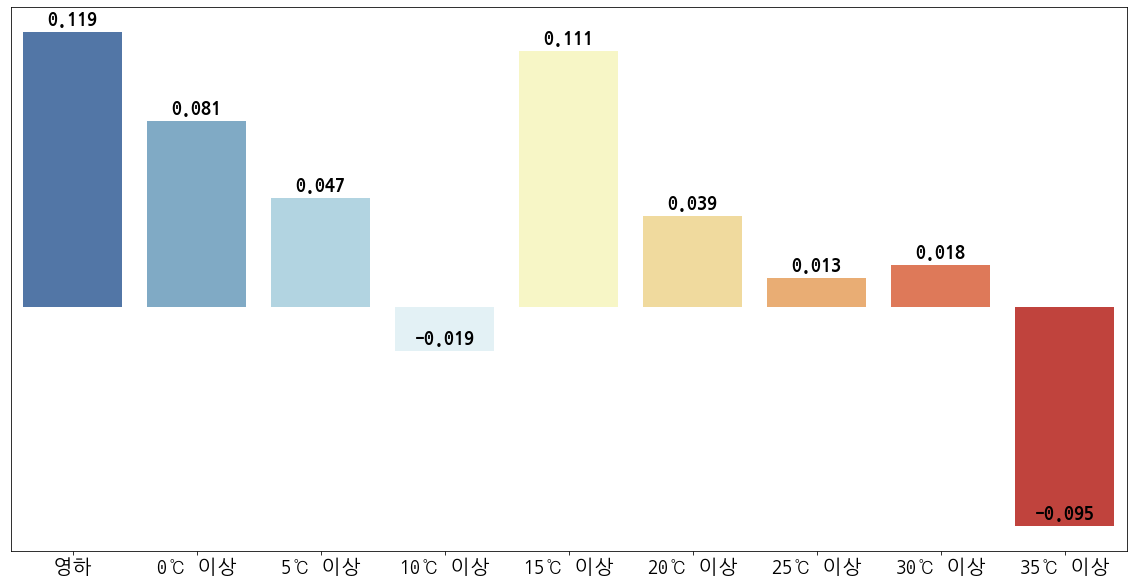

In [60]:
skd_temp_dc = skd_temp.groupby(['날씨'], as_index=False).mean()

plt.figure(figsize=(20,10))
# bar = plt.bar(skd_temp_dc['날씨'], skd_temp_dc['kospi_pct']) #sort_columns=['영하','0℃ 이상','5℃ 이상','10℃ 이상','15℃ 이상','20℃ 이상','25℃ 이상','30℃ 이상','35℃ 이상'])s

# for x in bar:
#   height = x.get_height()
#   plt.text(x.get_x() + x.get_width()/2.0, height, '%.5f' %height, ha='center', va='bottom', size=30)



# plt.xlabel('')
# plt.ylabel('')

# ax = plt.gca()
# #ax.axes.xaxis.set_ticks([])
# ax.axes.yaxis.set_ticks([])

ax = sns.barplot(data=skd_temp_dc, x='날씨', y='kospi_pct', order=['영하','0℃ 이상','5℃ 이상','10℃ 이상','15℃ 이상','20℃ 이상','25℃ 이상','30℃ 이상','35℃ 이상'],palette='RdYlBu_r')
plt.xlabel('')
plt.ylabel('')
ax.axes.yaxis.set_visible(False)
for p in ax.patches:
  left, bottom, width, height = p.get_bbox().bounds
  if height>0 :
    ax.annotate("%.3f" %(height), (left+width/2, height+0.003), ha='center', size=20, weight='bold')
  else :
    ax.annotate("%.3f" %(height), (left+width/2, height+0.003), ha='center', size=20, weight='bold')




plt.show()

In [61]:
skd_temp_dc = skd_temp.groupby(['날씨'], as_index=False).mean()
skd_temp_dc

날씨   Unnamed: 0    평균기온(℃)    최고기온(℃)        kospi   volume_kospi  \
0       0     1.000000  -4.300000  -0.200000   520.950000   23101.000000   
1   0℃ 이상  3736.836466  -1.075752   2.873308  1662.806617  321548.693609   
2  10℃ 이상  3742.441392   7.748901  12.504579  1654.657857   47719.553114   
3  15℃ 이상  3914.765528  12.617081  17.614596  1716.994612   48385.218944   
4  20℃ 이상  3721.437343  17.998120  22.675313  1679.832970   46926.177945   
5  25℃ 이상  3817.716486  23.050815  27.616395  1685.479248   49040.836957   
6  30℃ 이상  4100.430712  26.792509  31.748315  1773.153596   42948.117978   
7  35℃ 이상  5862.069767  30.865116  36.072093  2207.348140   42907.534884   
8   5℃ 이상  3802.642963   3.441481   7.591704  1680.845719   47123.644444   
9      영하  3614.655738  -6.586230  -2.789836  1690.769246   46380.590164   

   amount_kospi      kosdaq  volume_kosdaq  amount_kosdaq  kospi_diff  \
0  12233.000000         NaN            NaN            NaN         NaN   
1  47748.703008  600.724582   68540.389121   30830.874477    0.670658   
2  50393.626374  593.335818   72457.448485   31249.052525   -0.644322   
3  55590.048137  617.490784   74953.533220   36505.291312    1.399534   
4  52570.974937  604.904005   66933.877915   31468.680384    0.527105   
5  52834.458333  611.584068   68200.560926   33128.529708    0.078913   
6  52779.756554  621.591284   65644.225673   33509.219462   -0.089682   
7  60184.325581  728.644524   74346.571429   47126.000000   -2.935349   
8  51251.354074  597.499310   72056.829228   33980.160920    1.063274   
9  55372.036066  591.548877   75248.960145   35843.543478    1.636262   

   kosdaq_diff  kospi_pct  kosdaq_pct  최고기온_pct  평균기온_pct  
0          NaN        NaN         NaN       NaN       NaN  
1     0.499163   0.080771    0.087343       NaN       NaN  
2    -0.487010  -0.019029   -0.056424       NaN       NaN  
3     0.747683   0.111009    0.142760  0.053408  0.096680  
4     0.377394   0.039411    0.050329  0.005721  0.014123  
5    -0.126989   0.012500   -0.016143  0.028763  0.024309  
6    -0.371594   0.018371   -0.045694  0.049855  0.035191  
7    -2.192619  -0.094884   -0.311429  0.046564  0.031930  
8     0.149113   0.047333    0.032857 -0.092114       NaN  
9     0.593818   0.119311    0.100909       NaN       NaN

In [62]:
skd_temp.loc[4944] #4943 : 130247.0, 4945 : 133346.0

Unnamed: 0              7321
지점명                       서울
date              2021-01-18
평균기온(℃)                 -3.8
최고기온(℃)                  0.2
kospi                3013.93
volume_kospi     147204857.0
amount_kospi        231869.0
kosdaq                944.67
volume_kosdaq       204050.0
amount_kosdaq       138339.0
kospi_diff            -71.97
kosdaq_diff           -19.77
kospi_pct              -2.33
kosdaq_pct             -2.05
최고기온_pct           -0.979798
평균기온_pct           -1.844444
날씨                     0℃ 이상
Name: 4944, dtype: object

In [63]:
skd_temp.at[4944, 'volume_kospi'] = 131796.5

In [64]:
skd_temp.loc[4944]

Unnamed: 0             7321
지점명                      서울
date             2021-01-18
평균기온(℃)                -3.8
최고기온(℃)                 0.2
kospi               3013.93
volume_kospi       131796.5
amount_kospi       231869.0
kosdaq               944.67
volume_kosdaq      204050.0
amount_kosdaq      138339.0
kospi_diff           -71.97
kosdaq_diff          -19.77
kospi_pct             -2.33
kosdaq_pct            -2.05
최고기온_pct          -0.979798
평균기온_pct          -1.844444
날씨                    0℃ 이상
Name: 4944, dtype: object

## 기온별 코스닥 증감율

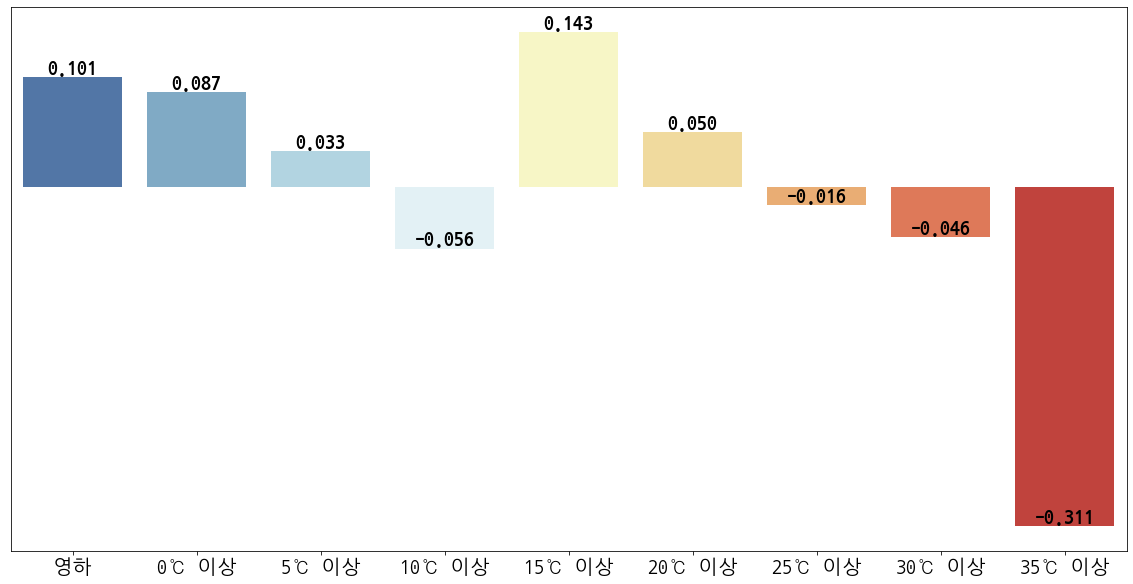

In [65]:
skd_temp_dc = skd_temp.groupby(['날씨'], as_index=False).mean()

plt.figure(figsize=(20,10))
# bar = plt.bar(skd_temp_dc['날씨'], skd_temp_dc['kosdaq_pct'], color='green')
# for x in bar:
#   height = x.get_height()
#   plt.text(x.get_x() + x.get_width()/2.0, height, '%.5f' %height, ha='center', va='bottom', size=20)

# plt.xlabel('')
# plt.ylabel('')

# ax = plt.gca()
# #ax.axes.xaxis.set_ticks([])
# ax.axes.yaxis.set_ticks([])

ax = sns.barplot(data=skd_temp_dc, x='날씨', y='kosdaq_pct', order=['영하','0℃ 이상','5℃ 이상','10℃ 이상','15℃ 이상','20℃ 이상','25℃ 이상','30℃ 이상','35℃ 이상'],palette='RdYlBu_r')
plt.xlabel('')
plt.ylabel('')
ax.axes.yaxis.set_visible(False)
for p in ax.patches:
  left, bottom, width, height = p.get_bbox().bounds
  if height>0 :
    ax.annotate("%.3f" %(height), (left+width/2, height+0.003), ha='center', size=20, weight='bold')
  else :
    ax.annotate("%.3f" %(height), (left+width/2, height+0.003), ha='center', size=20, weight='bold')

plt.show()

## 기온별 코스피 거래량

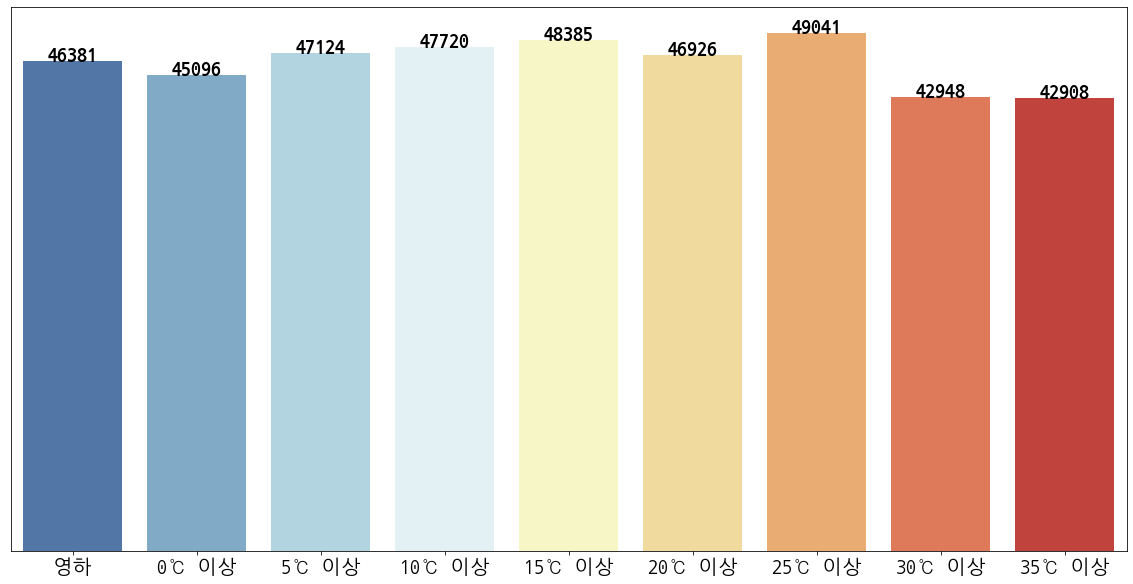

In [66]:
#volume : 거래량
plt.figure(figsize=(20,10))
# bar = plt.bar(skd_temp_dc['날씨'], skd_temp_dc['volume_kospi'])

# for x in bar:
#   height = x.get_height()
#   plt.text(x.get_x() + x.get_width()/2.0, height, '%.2f' %height, ha='center', va='bottom', size=20)

# plt.xlabel('')
# plt.ylabel('코스피 거래량')

# ax = plt.gca()
# ax.axes.yaxis.set_ticks([])

ax = sns.barplot(data=skd_temp_dc, x='날씨', y='volume_kospi', order=['영하','0℃ 이상','5℃ 이상','10℃ 이상','15℃ 이상','20℃ 이상','25℃ 이상','30℃ 이상','35℃ 이상'],palette='RdYlBu_r')
plt.xlabel('')
plt.ylabel('')
ax.axes.yaxis.set_visible(False)
for p in ax.patches:
  left, bottom, width, height = p.get_bbox().bounds
  if height>0 :
    ax.annotate("%.f" %(height), (left+width/2, height+0.003), ha='center', size=20, weight='bold')
  else :
    ax.annotate("%.f" %(height), (left+width/2, height+0.003), ha='center', size=20, weight='bold')
    
plt.show()

## 기온별 코스닥 거래량

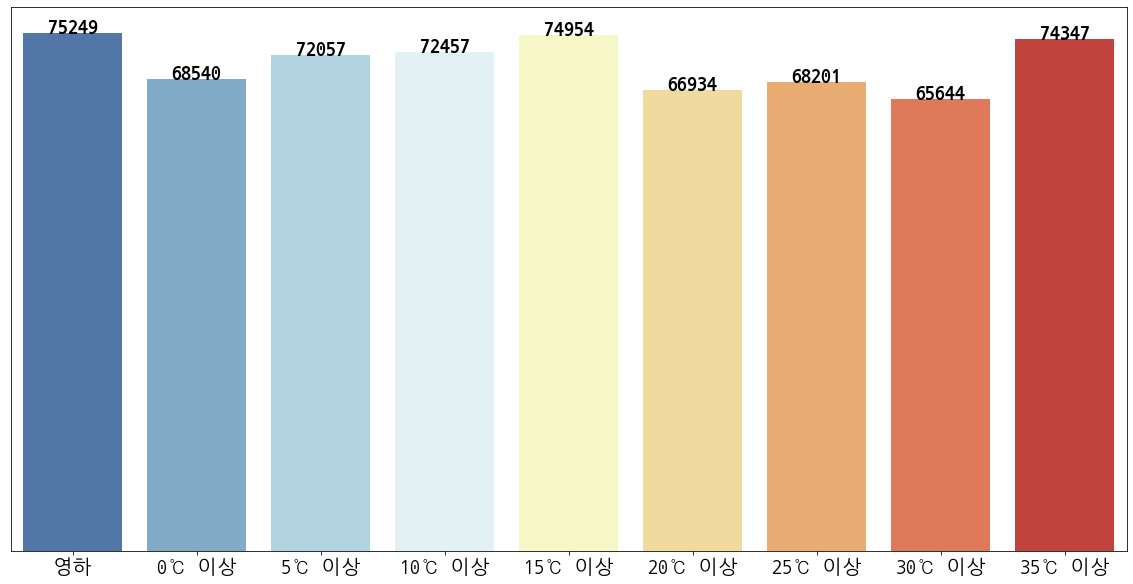

In [67]:
plt.figure(figsize=(20,10))

# bar = plt.bar(skd_temp_dc['날씨'], skd_temp_dc['volume_kosdaq'], color='green')

# for x in bar:
#   height = x.get_height()
#   plt.text(x.get_x() + x.get_width()/2.0, height, '%.2f' %height, ha='center', va='bottom', size=20)

# plt.xlabel('')
# plt.ylabel('')

# ax = plt.gca()
# ax.axes.yaxis.set_ticks([])

ax = sns.barplot(data=skd_temp_dc, x='날씨', y='volume_kosdaq', order=['영하','0℃ 이상','5℃ 이상','10℃ 이상','15℃ 이상','20℃ 이상','25℃ 이상','30℃ 이상','35℃ 이상'],palette='RdYlBu_r')
plt.xlabel('')
plt.ylabel('')
ax.axes.yaxis.set_visible(False)
for p in ax.patches:
  left, bottom, width, height = p.get_bbox().bounds
  if height>0 :
    ax.annotate("%.f" %(height), (left+width/2, height+0.003), ha='center', size=20, weight='bold')
  else :
    ax.annotate("%.f" %(height), (left+width/2, height+0.003), ha='center', size=20, weight='bold')

plt.show()

## 기온별 코스피 거래대금

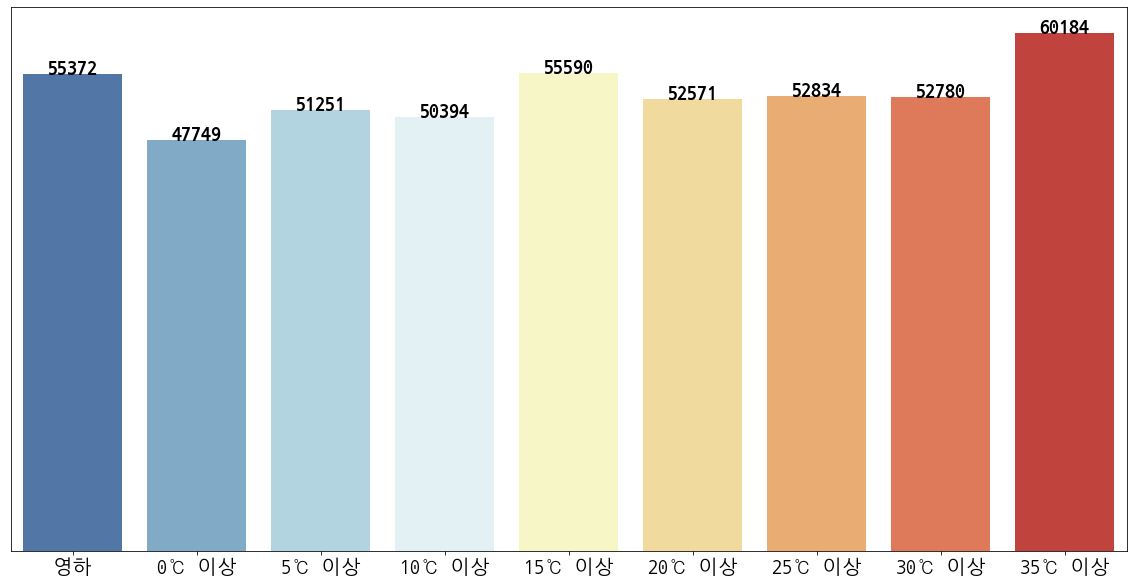

In [68]:
#amount : 거래대금
plt.figure(figsize=(20,10))
# bar = plt.bar(skd_temp_dc['날씨'], skd_temp_dc['amount_kospi'])

# for x in bar:
#   height = x.get_height()
#   plt.text(x.get_x() + x.get_width()/2.0, height, '%.2f' %height, ha='center', va='bottom', size=30)

# plt.xlabel('')
# plt.ylabel('')

# ax = plt.gca()
# ax.axes.yaxis.set_ticks([])

ax = sns.barplot(data=skd_temp_dc, x='날씨', y='amount_kospi', order=['영하','0℃ 이상','5℃ 이상','10℃ 이상','15℃ 이상','20℃ 이상','25℃ 이상','30℃ 이상','35℃ 이상'],palette='RdYlBu_r')
plt.xlabel('')
plt.ylabel('')
ax.axes.yaxis.set_visible(False)
for p in ax.patches:
  left, bottom, width, height = p.get_bbox().bounds
  if height>0 :
    ax.annotate("%.f" %(height), (left+width/2, height+0.003), ha='center', size=20, weight='bold')
  else :
    ax.annotate("%.f" %(height), (left+width/2, height+0.003), ha='center', size=20, weight='bold')

plt.show()

## 기온별 코스닥 거래대금

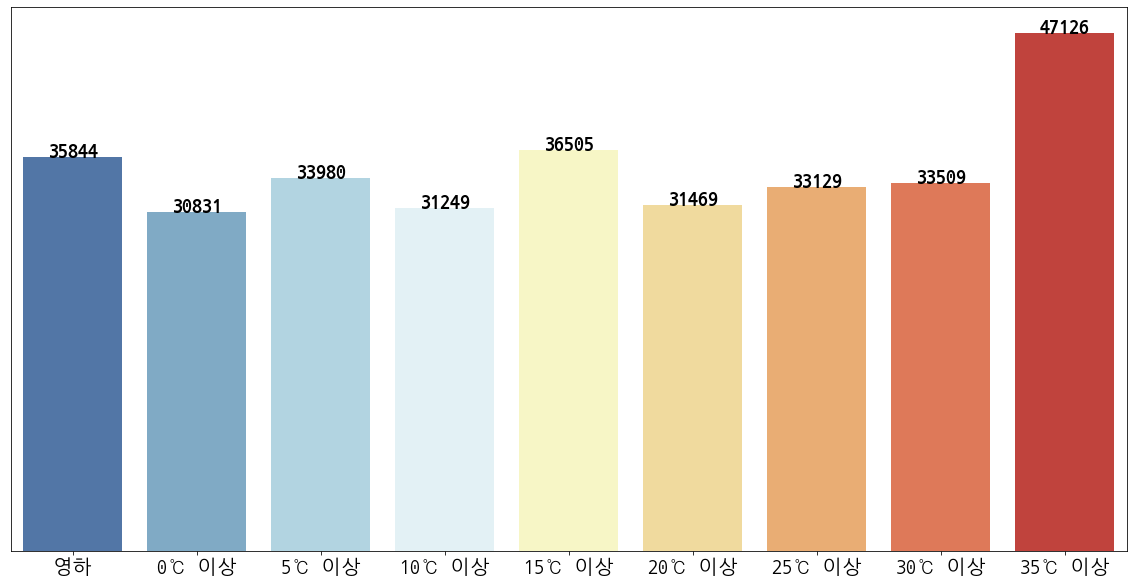

In [69]:
plt.figure(figsize=(20,10))
# bar = plt.bar(skd_temp_dc['날씨'], skd_temp_dc['amount_kosdaq'], color='green')

# for x in bar:
#   height = x.get_height()
#   plt.text(x.get_x() + x.get_width()/2.0, height, '%.2f' %height, ha='center', va='bottom', size=30)

# plt.xlabel('')
# plt.ylabel('')

# ax = plt.gca()
# ax.axes.yaxis.set_ticks([])

ax = sns.barplot(data=skd_temp_dc, x='날씨', y='amount_kosdaq', order=['영하','0℃ 이상','5℃ 이상','10℃ 이상','15℃ 이상','20℃ 이상','25℃ 이상','30℃ 이상','35℃ 이상'],palette='RdYlBu_r')
plt.xlabel('')
plt.ylabel('')
ax.axes.yaxis.set_visible(False)
for p in ax.patches:
  left, bottom, width, height = p.get_bbox().bounds
  if height>0 :
    ax.annotate("%.f" %(height), (left+width/2, height+0.003), ha='center', size=20, weight='bold')
  else :
    ax.annotate("%.f" %(height), (left+width/2, height+0.003), ha='center', size=20, weight='bold')

plt.show()

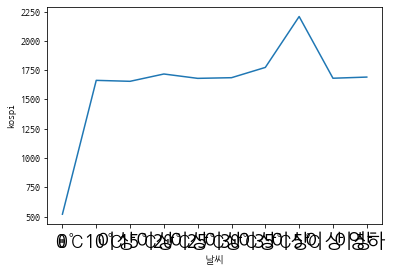

In [70]:
sns.lineplot(x='날씨', y='kospi', data=skd_temp_dc)

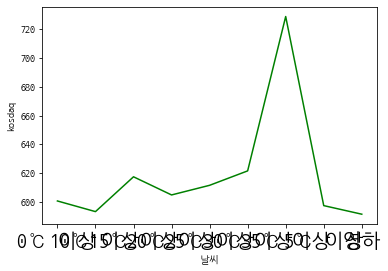

In [71]:
sns.lineplot(x='날씨', y='kosdaq', data=skd_temp_dc, color='green')

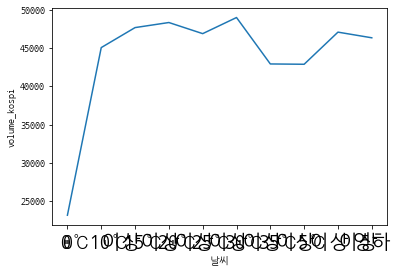

In [72]:
sns.lineplot(x='날씨', y='volume_kospi', data=skd_temp_dc)

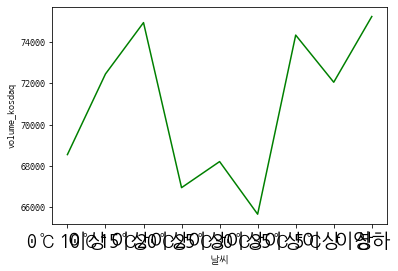

In [73]:
sns.lineplot(x='날씨', y='volume_kosdaq', data=skd_temp_dc, color='green')

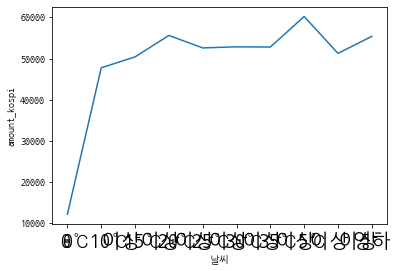

In [74]:
sns.lineplot(x='날씨', y='amount_kospi', data=skd_temp_dc)

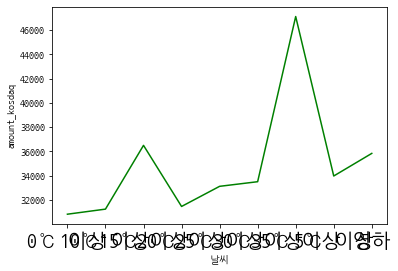

In [75]:
sns.lineplot(x='날씨', y='amount_kosdaq', data=skd_temp_dc, color='green')

# 코스피, 코스닥 증감 표



In [76]:
skd_temp1 = skd_temp.assign(kospi_variance='0', kosdaq_variance='0')

for i in range(1,len(skd_temp1)):
    skd_temp1['kospi_variance'][i] = (skd_temp1['kospi'][i]-skd_temp1['kospi'][i-1])
    skd_temp1['kosdaq_variance'][i] = (skd_temp1['kosdaq'][i]-skd_temp1['kosdaq'][i-1])

skd_temp1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Unnamed: 0 지점명        date  평균기온(℃)  최고기온(℃)    kospi  volume_kospi  \
0              1  서울  2001-01-02     -4.3     -0.2   520.95       23101.0   
1              2  서울  2001-01-03     -8.3     -5.2   521.43       32458.0   
2              3  서울  2001-01-04     -9.8     -6.7   558.02       44454.0   
3              4  서울  2001-01-05     -6.8     -2.2   580.85       57829.0   
4              7  서울  2001-01-08      2.0      4.9   586.65       55865.0   
...          ...  ..         ...      ...      ...      ...           ...   
5177        7661  서울  2021-12-24     -0.3      3.2  3012.43       53015.0   
5178        7664  서울  2021-12-27     -7.6     -3.9  2999.55       46290.0   
5179        7665  서울  2021-12-28     -4.1     -0.9  3020.24       59323.0   
5180        7666  서울  2021-12-29      0.4      5.9  2993.29       53660.0   
5181        7667  서울  2021-12-30     -3.9      0.2  2977.65       45404.0   

      amount_kospi   kosdaq  volume_kosdaq  amount_kosdaq  kospi_diff  \
0          12233.0      NaN            NaN            NaN         NaN   
1          15834.0      NaN            NaN            NaN        0.48   
2          29848.0      NaN            NaN            NaN       36.59   
3          35696.0      NaN            NaN            NaN       22.83   
4          29481.0      NaN            NaN            NaN        5.80   
...            ...      ...            ...            ...         ...   
5177       84694.0  1007.42       123576.0       108664.0       14.26   
5178       81341.0  1011.36       115153.0       100446.0      -12.88   
5179      118684.0  1027.44       128675.0       132431.0       20.69   
5180      108018.0  1028.05        95094.0       116836.0      -26.95   
5181       85951.0  1033.98        90742.0       101026.0      -15.64   

      kosdaq_diff  kospi_pct  kosdaq_pct   최고기온_pct   평균기온_pct     날씨  \
0             NaN        NaN         NaN        NaN        NaN      0   
1             NaN       0.09         NaN  25.000000   0.930233     영하   
2             NaN       7.02         NaN   0.288462   0.180723     영하   
3             NaN       4.09         NaN  -0.671642  -0.306122     영하   
4             NaN       1.00         NaN  -3.227273  -1.294118  0℃ 이상   
...           ...        ...         ...        ...        ...    ...   
5177         4.11       0.48        0.41  -0.614458  -1.111111  0℃ 이상   
5178         3.94      -0.43        0.39  -2.218750  24.333333     영하   
5179        16.08       0.69        1.59  -0.769231  -0.460526     영하   
5180         0.61      -0.89        0.06  -7.555556  -1.097561  5℃ 이상   
5181         5.93      -0.52        0.58  -0.966102 -10.750000  0℃ 이상   

     kospi_variance kosdaq_variance  
0                 0               0  
1              0.48             NaN  
2             36.59             NaN  
3             22.83             NaN  
4               5.8             NaN  
...             ...             ...  
5177          14.26            4.11  
5178         -12.88            3.94  
5179          20.69           16.08  
5180         -26.95            0.61  
5181         -15.64            5.93  

[5182 rows x 20 columns]

#2010년 이전 자료로 비교

In [77]:
skd_temp

Unnamed: 0 지점명        date  평균기온(℃)  최고기온(℃)    kospi  volume_kospi  \
0              1  서울  2001-01-02     -4.3     -0.2   520.95       23101.0   
1              2  서울  2001-01-03     -8.3     -5.2   521.43       32458.0   
2              3  서울  2001-01-04     -9.8     -6.7   558.02       44454.0   
3              4  서울  2001-01-05     -6.8     -2.2   580.85       57829.0   
4              7  서울  2001-01-08      2.0      4.9   586.65       55865.0   
...          ...  ..         ...      ...      ...      ...           ...   
5177        7661  서울  2021-12-24     -0.3      3.2  3012.43       53015.0   
5178        7664  서울  2021-12-27     -7.6     -3.9  2999.55       46290.0   
5179        7665  서울  2021-12-28     -4.1     -0.9  3020.24       59323.0   
5180        7666  서울  2021-12-29      0.4      5.9  2993.29       53660.0   
5181        7667  서울  2021-12-30     -3.9      0.2  2977.65       45404.0   

      amount_kospi   kosdaq  volume_kosdaq  amount_kosdaq  kospi_diff  \
0          12233.0      NaN            NaN            NaN         NaN   
1          15834.0      NaN            NaN            NaN        0.48   
2          29848.0      NaN            NaN            NaN       36.59   
3          35696.0      NaN            NaN            NaN       22.83   
4          29481.0      NaN            NaN            NaN        5.80   
...            ...      ...            ...            ...         ...   
5177       84694.0  1007.42       123576.0       108664.0       14.26   
5178       81341.0  1011.36       115153.0       100446.0      -12.88   
5179      118684.0  1027.44       128675.0       132431.0       20.69   
5180      108018.0  1028.05        95094.0       116836.0      -26.95   
5181       85951.0  1033.98        90742.0       101026.0      -15.64   

      kosdaq_diff  kospi_pct  kosdaq_pct   최고기온_pct   평균기온_pct     날씨  
0             NaN        NaN         NaN        NaN        NaN      0  
1             NaN       0.09         NaN  25.000000   0.930233     영하  
2             NaN       7.02         NaN   0.288462   0.180723     영하  
3             NaN       4.09         NaN  -0.671642  -0.306122     영하  
4             NaN       1.00         NaN  -3.227273  -1.294118  0℃ 이상  
...           ...        ...         ...        ...        ...    ...  
5177         4.11       0.48        0.41  -0.614458  -1.111111  0℃ 이상  
5178         3.94      -0.43        0.39  -2.218750  24.333333     영하  
5179        16.08       0.69        1.59  -0.769231  -0.460526     영하  
5180         0.61      -0.89        0.06  -7.555556  -1.097561  5℃ 이상  
5181         5.93      -0.52        0.58  -0.966102 -10.750000  0℃ 이상  

[5182 rows x 18 columns]

In [78]:
skd_2010temp = skd_temp[skd_temp['date'].between('2001-01-01','2010-12-31')]
skd_2010temp

Unnamed: 0 지점명        date  평균기온(℃)  최고기온(℃)    kospi  volume_kospi  \
0              1  서울  2001-01-02     -4.3     -0.2   520.95       23101.0   
1              2  서울  2001-01-03     -8.3     -5.2   521.43       32458.0   
2              3  서울  2001-01-04     -9.8     -6.7   558.02       44454.0   
3              4  서울  2001-01-05     -6.8     -2.2   580.85       57829.0   
4              7  서울  2001-01-08      2.0      4.9   586.65       55865.0   
...          ...  ..         ...      ...      ...      ...           ...   
2474        3644  서울  2010-12-24    -12.3     -9.0  2029.60       31250.0   
2475        3647  서울  2010-12-27     -4.9     -2.1  2022.19       26927.0   
2476        3648  서울  2010-12-28     -2.6     -0.1  2033.32       33787.0   
2477        3649  서울  2010-12-29     -5.7     -2.1  2043.49       27792.0   
2478        3650  서울  2010-12-30     -6.1     -3.6  2051.00       29736.0   

      amount_kospi  kosdaq  volume_kosdaq  amount_kosdaq  kospi_diff  \
0          12233.0     NaN            NaN            NaN         NaN   
1          15834.0     NaN            NaN            NaN        0.48   
2          29848.0     NaN            NaN            NaN       36.59   
3          35696.0     NaN            NaN            NaN       22.83   
4          29481.0     NaN            NaN            NaN        5.80   
...            ...     ...            ...            ...         ...   
2474       47143.0  499.63        49224.0        14286.0       -7.93   
2475       50742.0  496.68        56278.0        13817.0       -7.41   
2476       56258.0  494.95        57598.0        17163.0       11.13   
2477       49678.0  502.31        54879.0        13963.0       10.17   
2478       52461.0  510.69        63515.0        19185.0        7.51   

      kosdaq_diff  kospi_pct  kosdaq_pct   최고기온_pct  평균기온_pct     날씨  
0             NaN        NaN         NaN        NaN       NaN      0  
1             NaN       0.09         NaN  25.000000  0.930233     영하  
2             NaN       7.02         NaN   0.288462  0.180723     영하  
3             NaN       4.09         NaN  -0.671642 -0.306122     영하  
4             NaN       1.00         NaN  -3.227273 -1.294118  0℃ 이상  
...           ...        ...         ...        ...       ...    ...  
2474        -2.76      -0.39       -0.55  -3.000000  5.473684     영하  
2475        -2.95      -0.37       -0.59  -0.766667 -0.601626     영하  
2476        -1.73       0.55       -0.35  -0.952381 -0.469388     영하  
2477         7.36       0.50        1.49  20.000000  1.192308     영하  
2478         8.38       0.37        1.67   0.714286  0.070175     영하  

[2479 rows x 18 columns]

## 기온별 날씨 일수

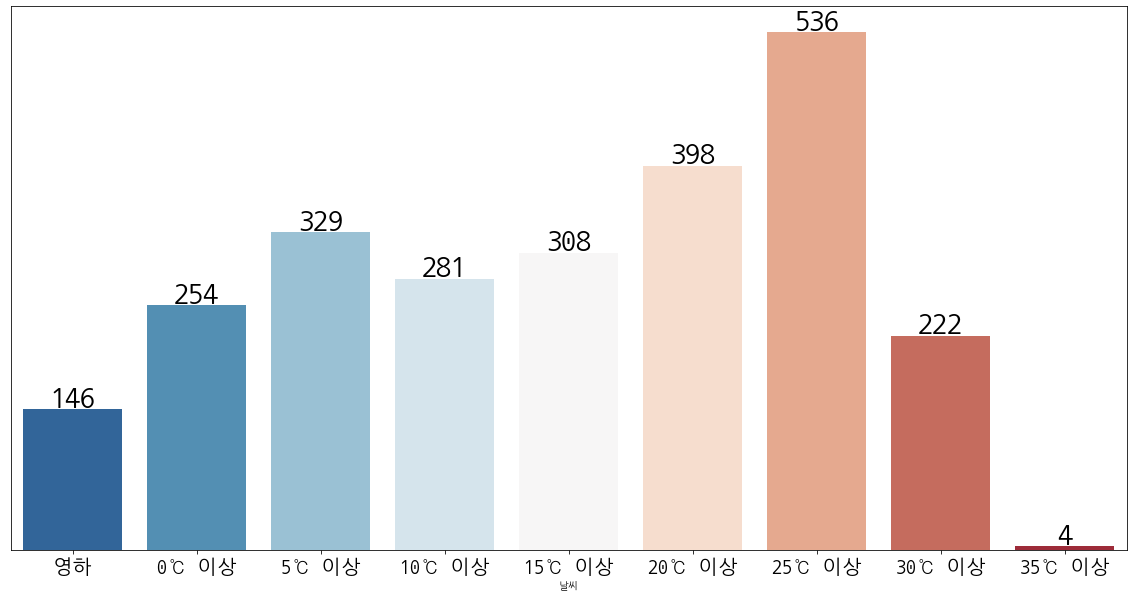

In [79]:
plt.figure(figsize=(20,10))
cplt = sns.countplot(x='날씨', data=skd_2010temp,order=['영하','0℃ 이상','5℃ 이상','10℃ 이상','15℃ 이상','20℃ 이상','25℃ 이상','30℃ 이상','35℃ 이상'], palette='RdBu_r')

for x in cplt.patches:
  height = x.get_height()
  cplt.text(x.get_x() + x.get_width()/2., height+3, height, ha='center', size=30)

plt.ylabel('')

ax = plt.gca()
ax.axes.yaxis.set_ticks([])

plt.show()  

## 기온별 코스피 증감율

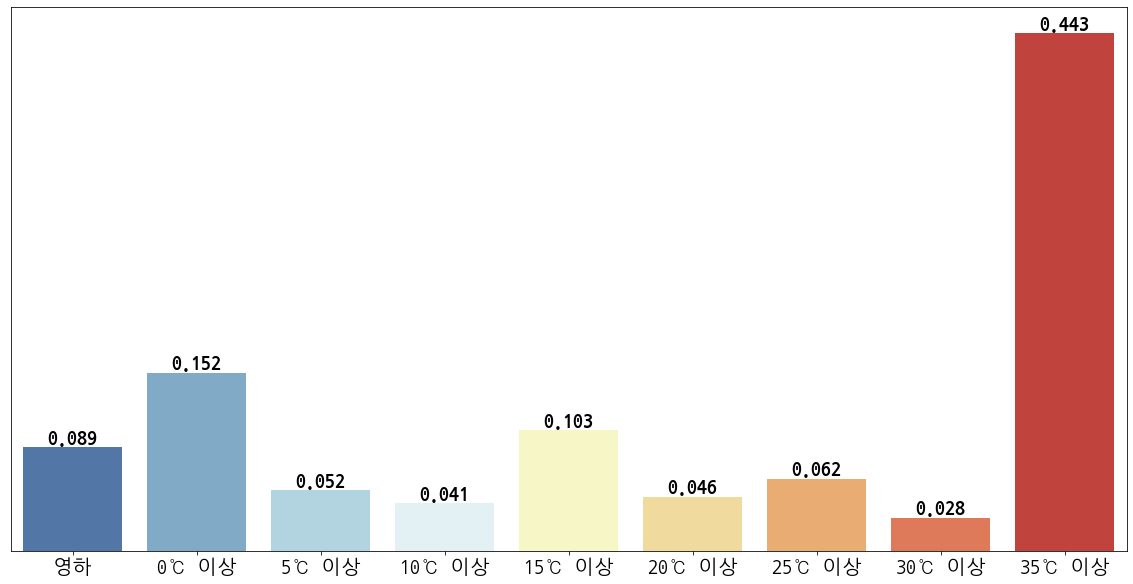

In [80]:
skd_temp_dc = skd_2010temp.groupby(['날씨'], as_index=False).mean()

plt.figure(figsize=(20,10))
# bar = plt.bar(skd_temp_dc['날씨'], skd_temp_dc['kospi_pct'])

# for x in bar:
#   height = x.get_height()
#   plt.text(x.get_x() + x.get_width()/2.0, height, '%.5f' %height, ha='center', va='bottom', size=30)

# plt.xlabel('')
# plt.ylabel('')

# ax = plt.gca()
# #ax.axes.xaxis.set_ticks([])
# ax.axes.yaxis.set_ticks([])

ax = sns.barplot(data=skd_temp_dc, x='날씨', y='kospi_pct', order=['영하','0℃ 이상','5℃ 이상','10℃ 이상','15℃ 이상','20℃ 이상','25℃ 이상','30℃ 이상','35℃ 이상'], palette='RdYlBu_r')
plt.xlabel('')
plt.ylabel('')
ax.axes.yaxis.set_visible(False)
for p in ax.patches:
  left, bottom, width, height = p.get_bbox().bounds
  if height>0 :
    ax.annotate("%.3f" %(height), (left+width/2, height+0.003), ha='center', size=20, weight='bold')
  else :
    ax.annotate("%.3f" %(height), (left+width/2, height+0.003), ha='center', size=20, weight='bold')

plt.show()

## 기온별 코스닥 증감율

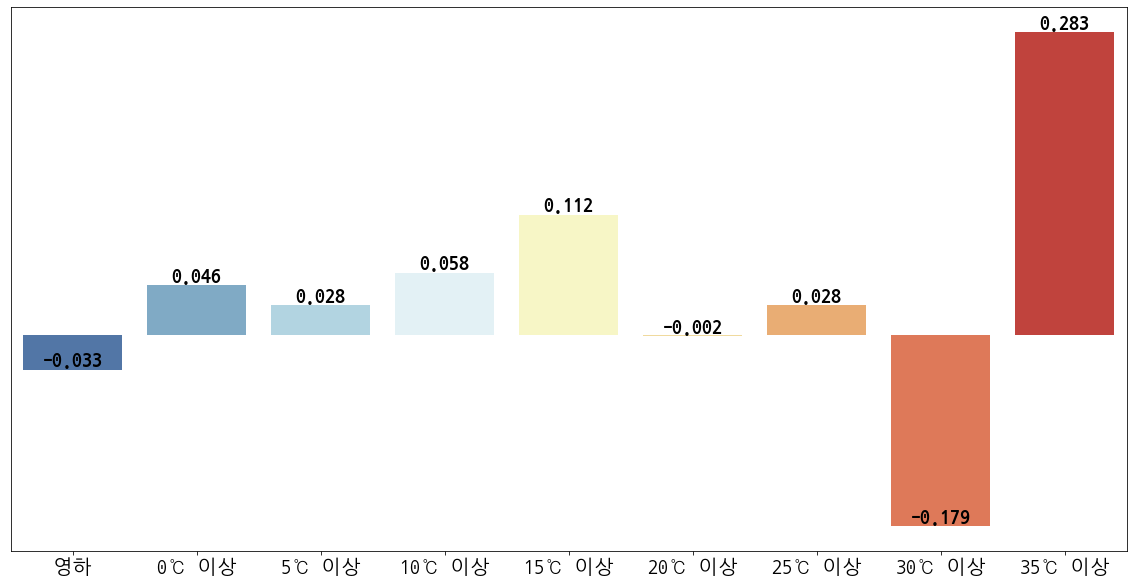

In [81]:
skd_temp_dc = skd_2010temp.groupby(['날씨'], as_index=False).mean()

plt.figure(figsize=(20,10))
# bar = plt.bar(skd_temp_dc['날씨'], skd_temp_dc['kosdaq_pct'], color='green')
# for x in bar:
#   height = x.get_height()
#   plt.text(x.get_x() + x.get_width()/2.0, height, '%.5f' %height, ha='center', va='bottom', size=20)

# plt.xlabel('')
# plt.ylabel('')

# ax = plt.gca()
# #ax.axes.xaxis.set_ticks([])
# ax.axes.yaxis.set_ticks([])

ax = sns.barplot(data=skd_temp_dc, x='날씨', y='kosdaq_pct', order=['영하','0℃ 이상','5℃ 이상','10℃ 이상','15℃ 이상','20℃ 이상','25℃ 이상','30℃ 이상','35℃ 이상'],palette='RdYlBu_r')
plt.xlabel('')
plt.ylabel('')
ax.axes.yaxis.set_visible(False)
for p in ax.patches:
  left, bottom, width, height = p.get_bbox().bounds
  if height>0 :
    ax.annotate("%.3f" %(height), (left+width/2, height+0.003), ha='center', size=20, weight='bold')
  else :
    ax.annotate("%.3f" %(height), (left+width/2, height+0.003), ha='center', size=20, weight='bold')

plt.show()

## 기온별 코스피 거래량

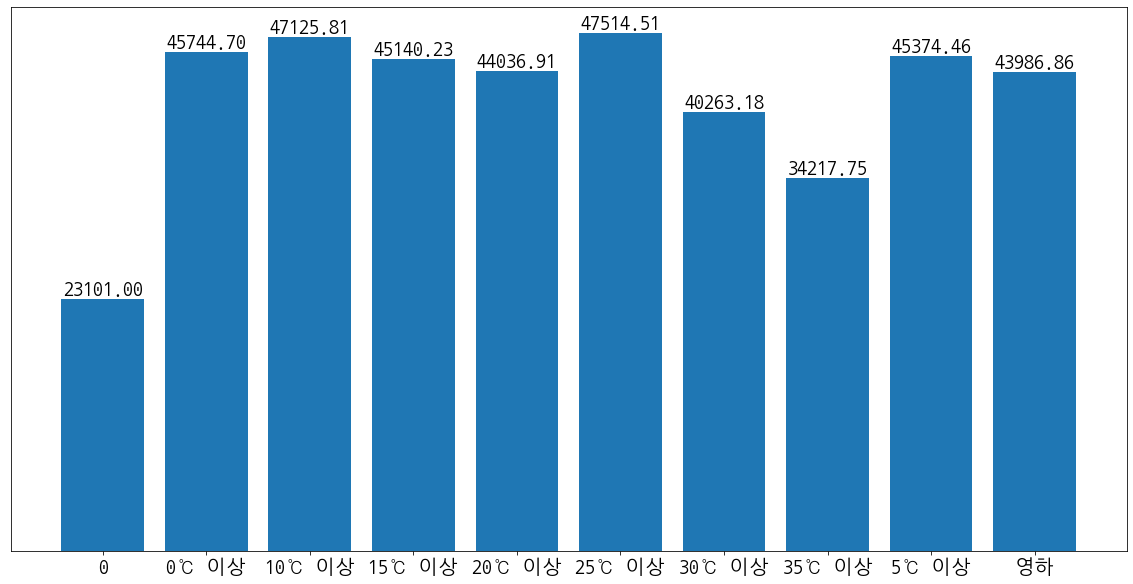

In [82]:
#volume : 거래량
plt.figure(figsize=(20,10))
bar = plt.bar(skd_temp_dc['날씨'], skd_temp_dc['volume_kospi'])

for x in bar:
  height = x.get_height()
  plt.text(x.get_x() + x.get_width()/2.0, height, '%.2f' %height, ha='center', va='bottom', size=20)

plt.xlabel('')
plt.ylabel('')

ax = plt.gca()
ax.axes.yaxis.set_ticks([])

plt.show()

## 기온별 코스닥 거래량

posx and posy should be finite values
posx and posy should be finite values


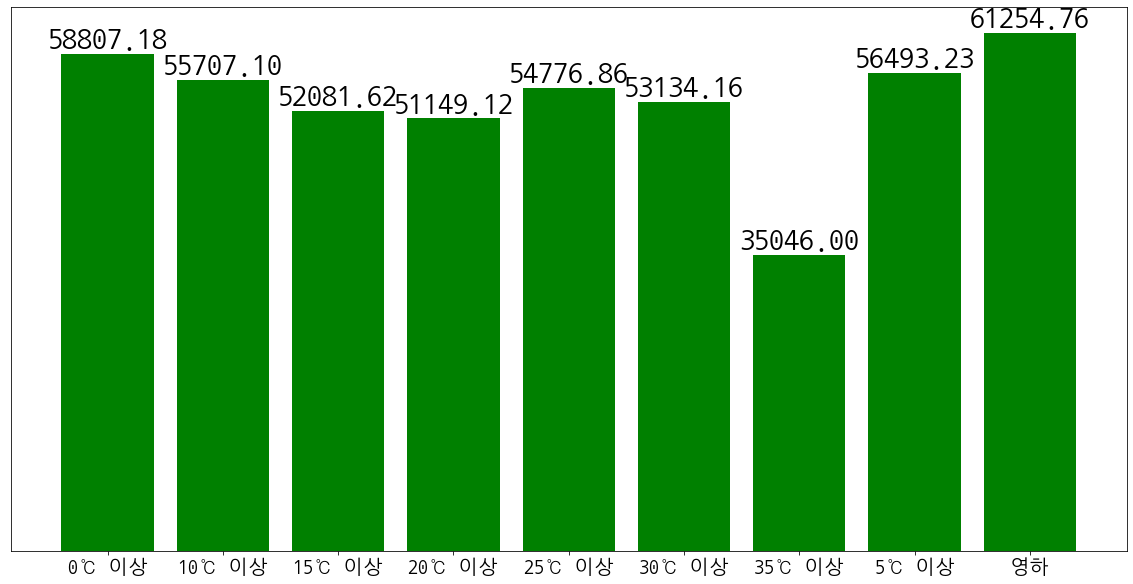

In [83]:
plt.figure(figsize=(20,10))
bar = plt.bar(skd_temp_dc['날씨'], skd_temp_dc['volume_kosdaq'], color='green')

for x in bar:
  height = x.get_height()
  plt.text(x.get_x() + x.get_width()/2.0, height, '%.2f' %height, ha='center', va='bottom', size=30)

plt.xlabel('')
plt.ylabel('')

ax = plt.gca()
ax.axes.yaxis.set_ticks([])

plt.show()

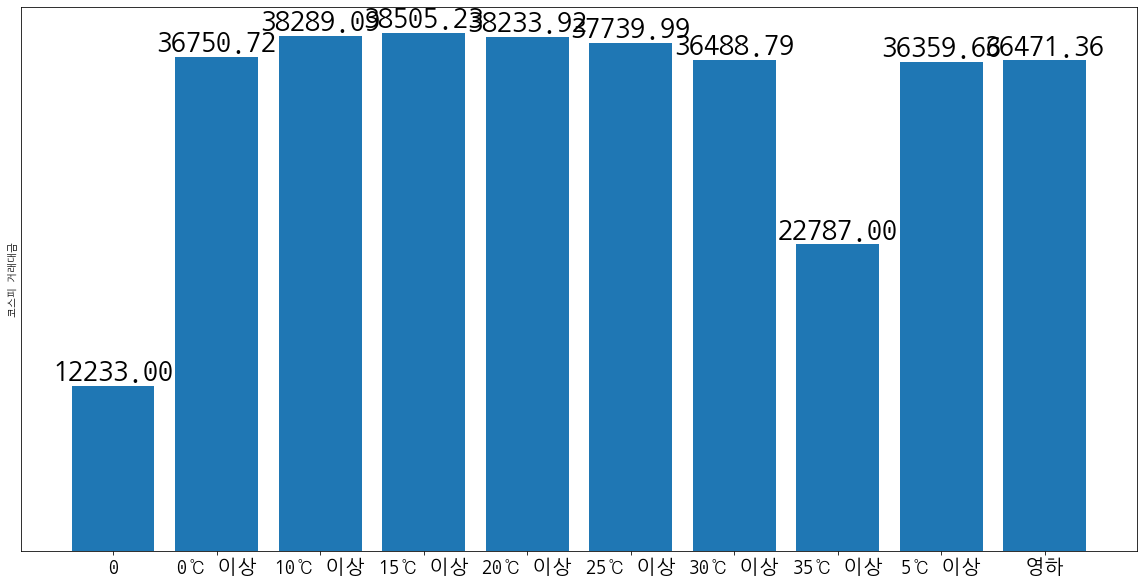

In [84]:
#amount : 거래대금
plt.figure(figsize=(20,10))
bar = plt.bar(skd_temp_dc['날씨'], skd_temp_dc['amount_kospi'])

for x in bar:
  height = x.get_height()
  plt.text(x.get_x() + x.get_width()/2.0, height, '%.2f' %height, ha='center', va='bottom', size=30)

plt.xlabel('')
plt.ylabel('코스피 거래대금')

ax = plt.gca()
ax.axes.yaxis.set_ticks([])

plt.show()

posx and posy should be finite values
posx and posy should be finite values


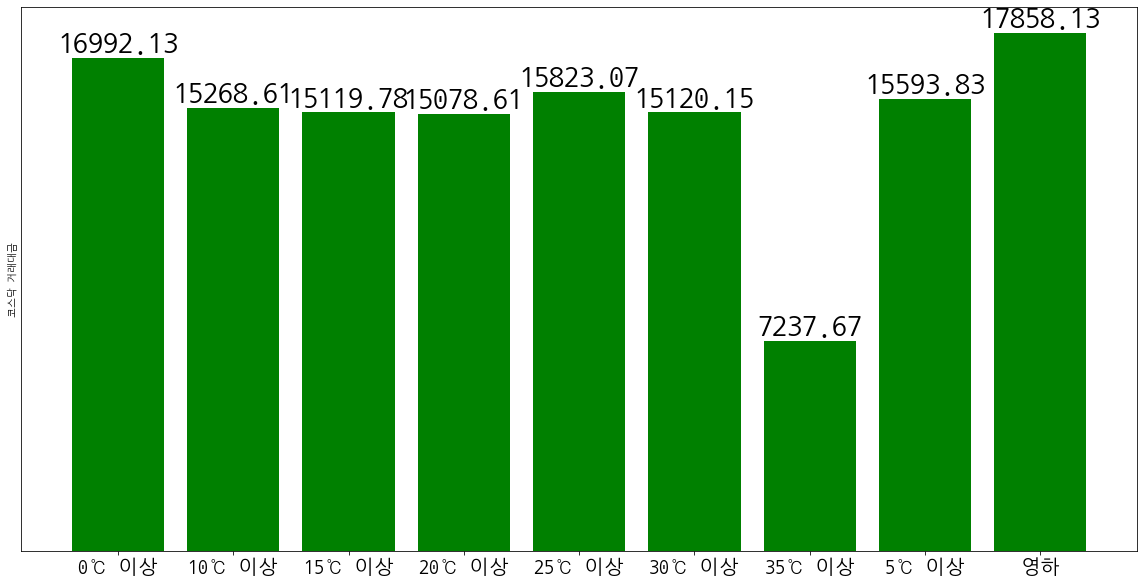

In [85]:
plt.figure(figsize=(20,10))
bar = plt.bar(skd_temp_dc['날씨'], skd_temp_dc['amount_kosdaq'], color='green')

for x in bar:
  height = x.get_height()
  plt.text(x.get_x() + x.get_width()/2.0, height, '%.2f' %height, ha='center', va='bottom', size=30)

plt.xlabel('')
plt.ylabel('코스닥 거래대금')

ax = plt.gca()
ax.axes.yaxis.set_ticks([])

plt.show()

#2010년 이후 자료로 비교


In [86]:
skd_2021temp = skd_temp[skd_temp['date'].between('2011-01-01','2021-12-31')]
skd_2021temp

Unnamed: 0 지점명        date  평균기온(℃)  최고기온(℃)    kospi  volume_kospi  \
2479        3654  서울  2011-01-03     -4.5     -0.3  2070.08       34403.0   
2480        3655  서울  2011-01-04     -3.9     -1.7  2085.14       40636.0   
2481        3656  서울  2011-01-05     -4.0     -1.8  2082.55       37914.0   
2482        3657  서울  2011-01-06     -7.6     -4.6  2077.61       39677.0   
2483        3658  서울  2011-01-07     -7.0     -2.9  2086.20       32992.0   
...          ...  ..         ...      ...      ...      ...           ...   
5177        7661  서울  2021-12-24     -0.3      3.2  3012.43       53015.0   
5178        7664  서울  2021-12-27     -7.6     -3.9  2999.55       46290.0   
5179        7665  서울  2021-12-28     -4.1     -0.9  3020.24       59323.0   
5180        7666  서울  2021-12-29      0.4      5.9  2993.29       53660.0   
5181        7667  서울  2021-12-30     -3.9      0.2  2977.65       45404.0   

      amount_kospi   kosdaq  volume_kosdaq  amount_kosdaq  kospi_diff  \
2479       57805.0   518.05        59180.0        18253.0       19.08   
2480       76530.0   521.35        74981.0        24059.0       15.06   
2481       84514.0   523.81        67480.0        24617.0       -2.59   
2482       86507.0   527.64        81399.0        32991.0       -4.94   
2483       75753.0   530.84        67027.0        24786.0        8.59   
...            ...      ...            ...            ...         ...   
5177       84694.0  1007.42       123576.0       108664.0       14.26   
5178       81341.0  1011.36       115153.0       100446.0      -12.88   
5179      118684.0  1027.44       128675.0       132431.0       20.69   
5180      108018.0  1028.05        95094.0       116836.0      -26.95   
5181       85951.0  1033.98        90742.0       101026.0      -15.64   

      kosdaq_diff  kospi_pct  kosdaq_pct  최고기온_pct   평균기온_pct     날씨  
2479         7.36       0.93        1.44 -0.916667  -0.262295     영하  
2480         3.30       0.73        0.64  4.666667  -0.133333     영하  
2481         2.46      -0.12        0.47  0.058824   0.025641     영하  
2482         3.83      -0.24        0.73  1.555556   0.900000     영하  
2483         3.20       0.41        0.61 -0.369565  -0.078947     영하  
...           ...        ...         ...       ...        ...    ...  
5177         4.11       0.48        0.41 -0.614458  -1.111111  0℃ 이상  
5178         3.94      -0.43        0.39 -2.218750  24.333333     영하  
5179        16.08       0.69        1.59 -0.769231  -0.460526     영하  
5180         0.61      -0.89        0.06 -7.555556  -1.097561  5℃ 이상  
5181         5.93      -0.52        0.58 -0.966102 -10.750000  0℃ 이상  

[2703 rows x 18 columns]

## 기온별 날씨 일수

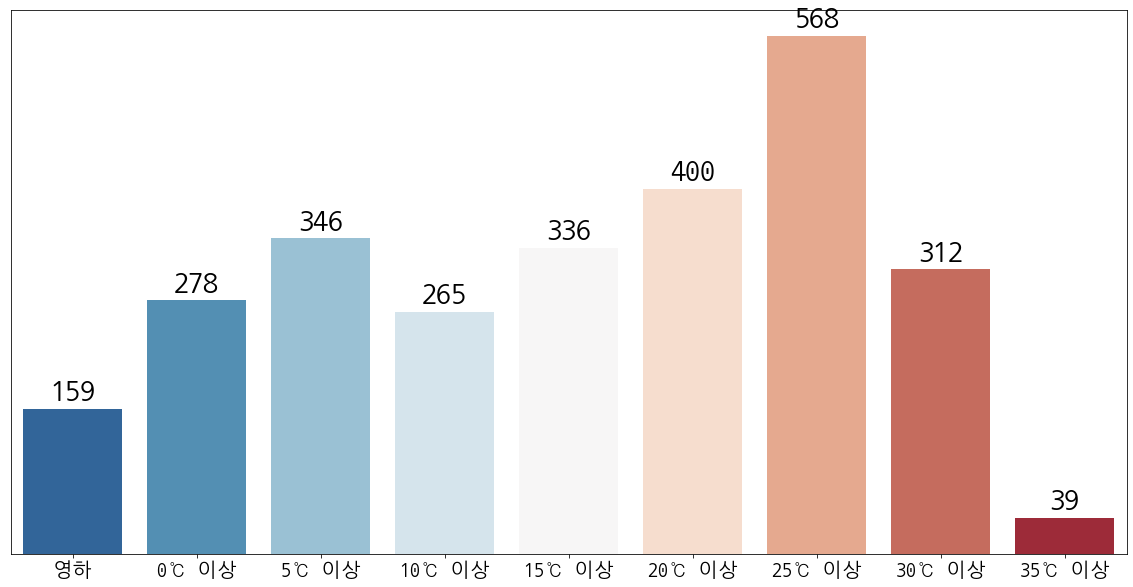

In [87]:
fig = plt.figure(figsize=(20,10))
cplt = sns.countplot(x='날씨', data=skd_2021temp, palette='RdBu_r')

for x in cplt.patches:
  height = x.get_height()
  cplt.text(x.get_x() + x.get_width()/2., height+10, height, ha='center', size=30)
  
plt.xlabel('')
plt.ylabel('')

ax = plt.gca()
ax.axes.yaxis.set_ticks([])

plt.show()  

## 기온별 코스피 증감율

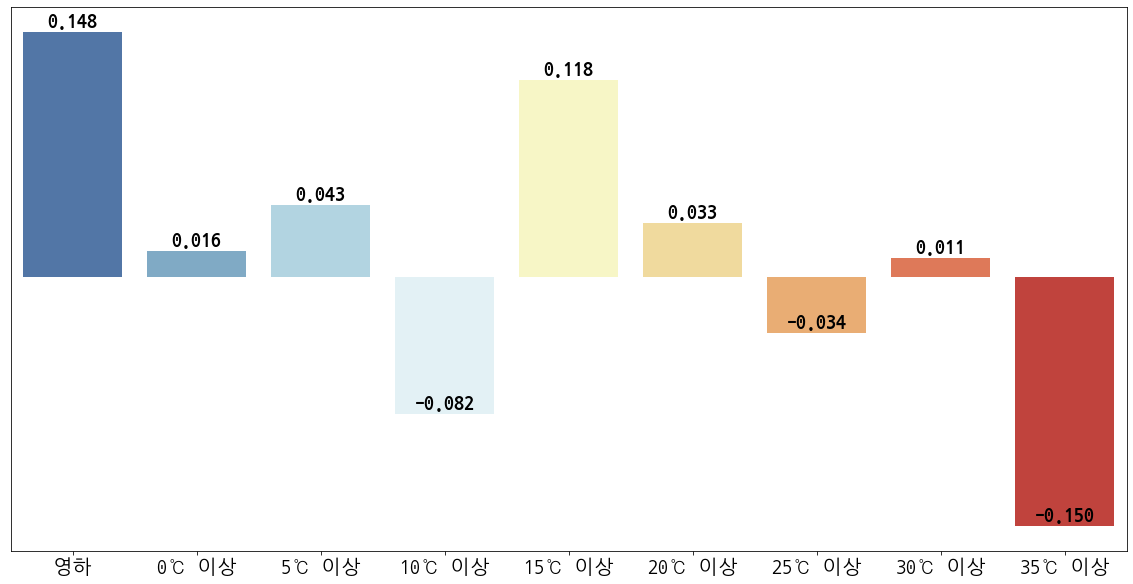

In [88]:
skd_temp_dc1 = skd_2021temp.groupby(['날씨'], as_index=False).mean()

plt.figure(figsize=(20,10))
# bar = plt.bar(skd_temp_dc1['날씨'], skd_temp_dc1['kospi_pct'])

# for x in bar:
#   height = x.get_height()
#   if height > 0:
#     plt.text(x.get_x() + x.get_width()/2.0, height, '%.5f' %height, ha='center', va='bottom', size=20)
#   else:
#     plt.text(x.get_x() + x.get_width()/2.0, height, '%.5f' %height, ha='center', va='bottom', size=20)

# plt.xlabel('')
# plt.ylabel('')

# ax = plt.gca()
# #ax.axes.xaxis.set_ticks([])
# ax.axes.yaxis.set_ticks([])

ax = sns.barplot(data=skd_temp_dc1, x='날씨', y='kospi_pct', order=['영하','0℃ 이상','5℃ 이상','10℃ 이상','15℃ 이상','20℃ 이상','25℃ 이상','30℃ 이상','35℃ 이상'],palette='RdYlBu_r')
plt.xlabel('')
plt.ylabel('')
ax.axes.yaxis.set_visible(False)
for p in ax.patches:
  left, bottom, width, height = p.get_bbox().bounds
  if height>0 :
    ax.annotate("%.3f" %(height), (left+width/2, height+0.003), ha='center', size=20, weight='bold')
  else :
    ax.annotate("%.3f" %(height), (left+width/2, height+0.003), ha='center', size=20, weight='bold')

plt.show()

## 기온별 코스닥 증감율

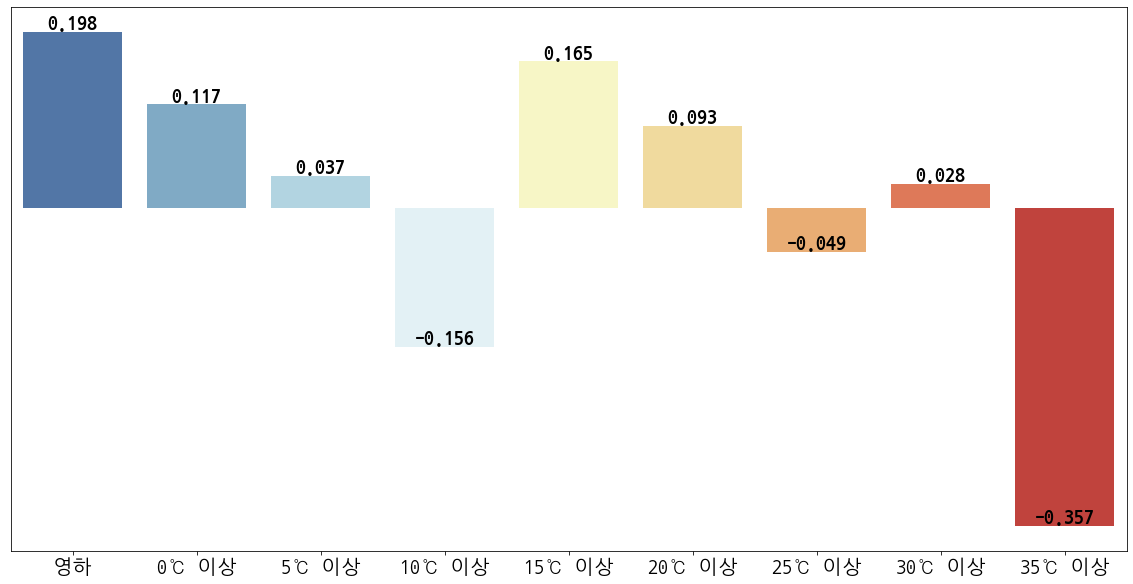

In [89]:
skd_temp_dc1 = skd_2021temp.groupby(['날씨'], as_index=False).mean()
plt.figure(figsize=(20,10))
# bar = plt.bar(skd_temp_dc1['날씨'], skd_temp_dc1['kosdaq_pct'], color='green')
# for x in bar:
#   height = x.get_height()
#   plt.text(x.get_x() + x.get_width()/2.0, height, '%.5f' %height, ha='center', va='bottom', size=20)

# plt.xlabel('')
# plt.ylabel('')

# ax = plt.gca()
# #ax.axes.xaxis.set_ticks([])
# ax.axes.yaxis.set_ticks([])

ax = sns.barplot(data=skd_temp_dc1, x='날씨', y='kosdaq_pct', order=['영하','0℃ 이상','5℃ 이상','10℃ 이상','15℃ 이상','20℃ 이상','25℃ 이상','30℃ 이상','35℃ 이상'],palette='RdYlBu_r')
plt.xlabel('')
plt.ylabel('')
ax.axes.yaxis.set_visible(False)
for p in ax.patches:
  left, bottom, width, height = p.get_bbox().bounds
  if height>0 :
    ax.annotate("%.3f" %(height), (left+width/2, height+0.003), ha='center', size=20, weight='bold')
  else :
    ax.annotate("%.3f" %(height), (left+width/2, height+0.003), ha='center', size=20, weight='bold')

plt.show()

## 기온별 코스피 거래량

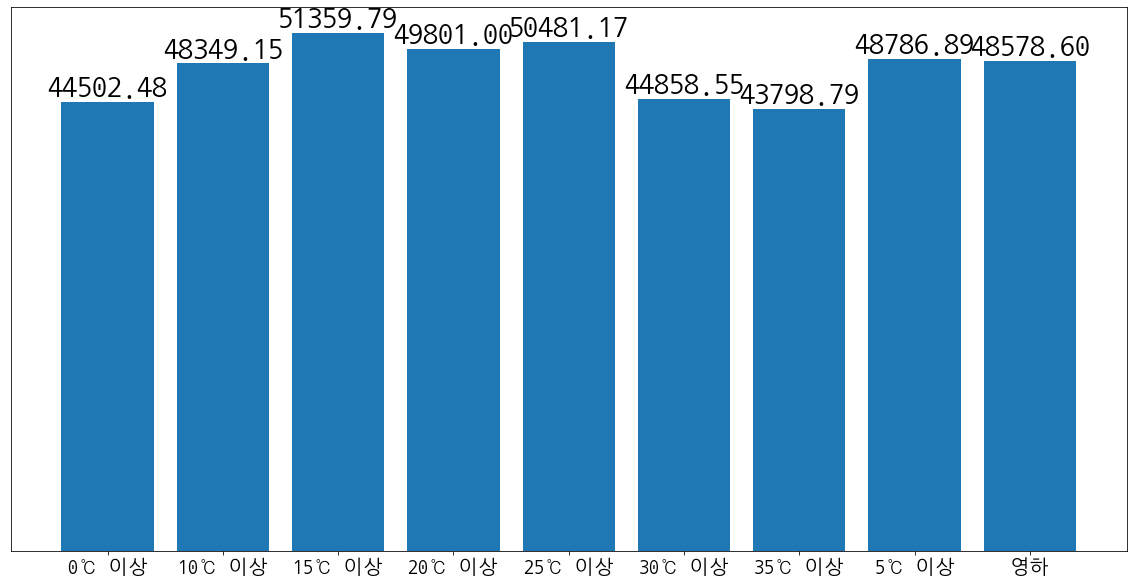

In [90]:
#volume : 거래량
plt.figure(figsize=(20,10))
bar = plt.bar(skd_temp_dc1['날씨'], skd_temp_dc1['volume_kospi'])

for x in bar:
  height = x.get_height()
  plt.text(x.get_x() + x.get_width()/2.0, height, '%.2f' %height, ha='center', va='bottom', size=30)

plt.xlabel('')
plt.ylabel('')

ax = plt.gca()
ax.axes.yaxis.set_ticks([])

plt.show()

## 기온별 코스닥 거래량

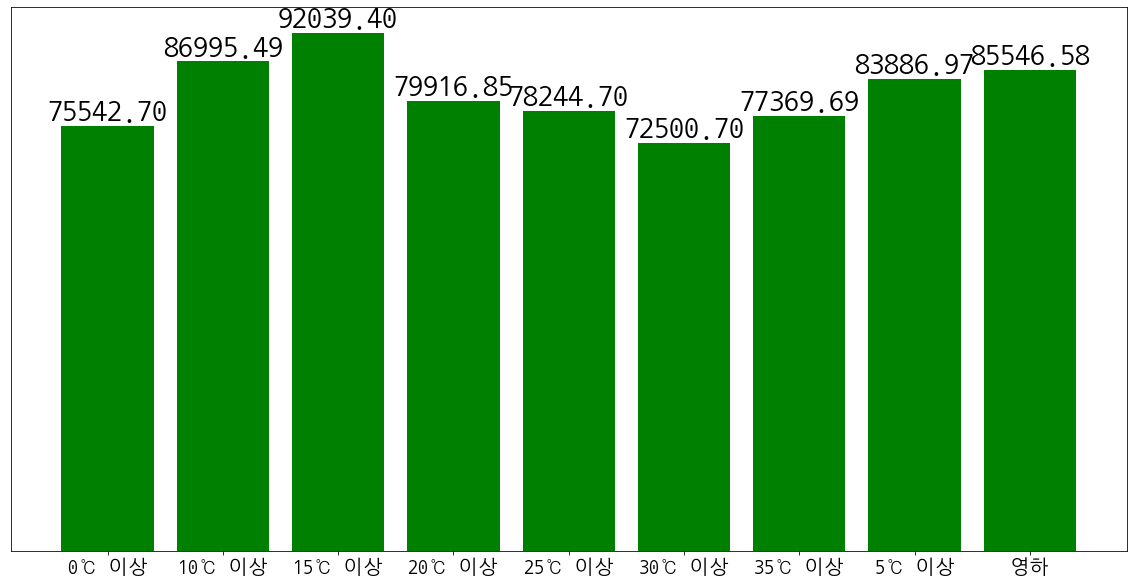

In [91]:
plt.figure(figsize=(20,10))
bar = plt.bar(skd_temp_dc1['날씨'], skd_temp_dc1['volume_kosdaq'], color='green')

for x in bar:
  height = x.get_height()
  plt.text(x.get_x() + x.get_width()/2.0, height, '%.2f' %height, ha='center', va='bottom', size=30)

plt.xlabel('')
plt.ylabel('')

ax = plt.gca()
ax.axes.yaxis.set_ticks([])

plt.show()

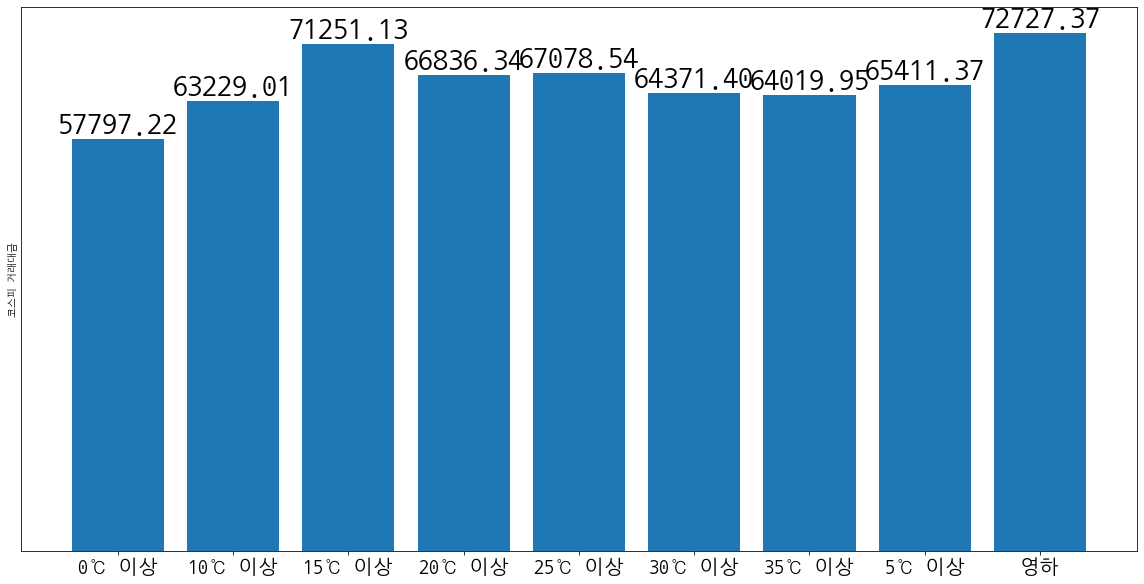

In [92]:
#amount : 거래대금
plt.figure(figsize=(20,10))
bar = plt.bar(skd_temp_dc1['날씨'], skd_temp_dc1['amount_kospi'])

for x in bar:
  height = x.get_height()
  plt.text(x.get_x() + x.get_width()/2.0, height, '%.2f' %height, ha='center', va='bottom', size=30)

plt.xlabel('')
plt.ylabel('코스피 거래대금')

ax = plt.gca()
ax.axes.yaxis.set_ticks([])

plt.show()

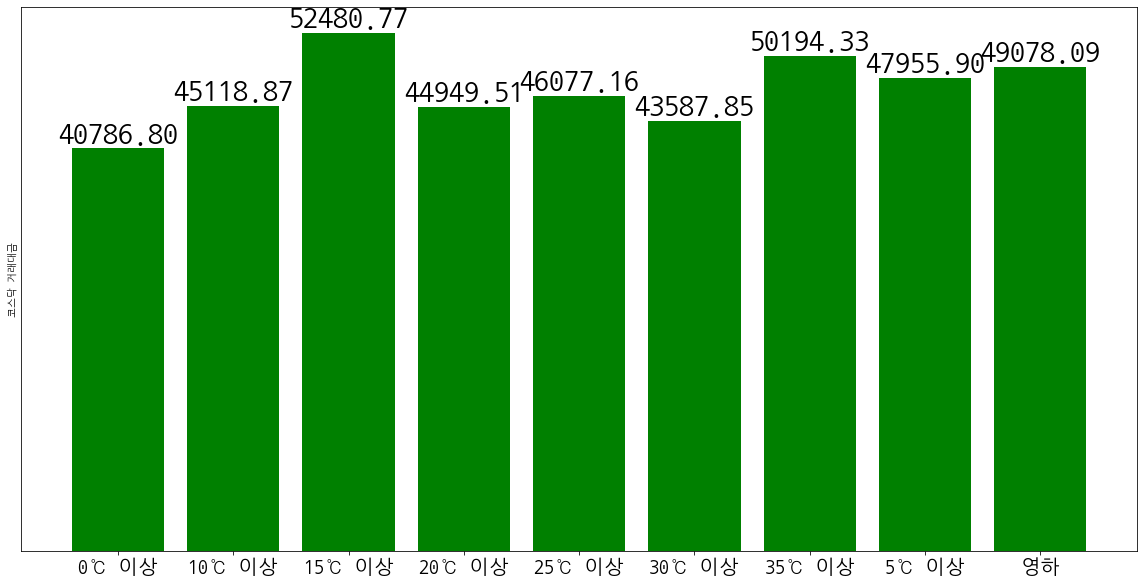

In [93]:
plt.figure(figsize=(20,10))
bar = plt.bar(skd_temp_dc1['날씨'], skd_temp_dc1['amount_kosdaq'], color='green')

for x in bar:
  height = x.get_height()
  plt.text(x.get_x() + x.get_width()/2.0, height, '%.2f' %height, ha='center', va='bottom', size=30)

plt.xlabel('')
plt.ylabel('코스닥 거래대금')

ax = plt.gca()
ax.axes.yaxis.set_ticks([])

plt.show()

#코스피, 코스닥 증감과 비교

In [94]:
skd_temp1

Unnamed: 0 지점명        date  평균기온(℃)  최고기온(℃)    kospi  volume_kospi  \
0              1  서울  2001-01-02     -4.3     -0.2   520.95       23101.0   
1              2  서울  2001-01-03     -8.3     -5.2   521.43       32458.0   
2              3  서울  2001-01-04     -9.8     -6.7   558.02       44454.0   
3              4  서울  2001-01-05     -6.8     -2.2   580.85       57829.0   
4              7  서울  2001-01-08      2.0      4.9   586.65       55865.0   
...          ...  ..         ...      ...      ...      ...           ...   
5177        7661  서울  2021-12-24     -0.3      3.2  3012.43       53015.0   
5178        7664  서울  2021-12-27     -7.6     -3.9  2999.55       46290.0   
5179        7665  서울  2021-12-28     -4.1     -0.9  3020.24       59323.0   
5180        7666  서울  2021-12-29      0.4      5.9  2993.29       53660.0   
5181        7667  서울  2021-12-30     -3.9      0.2  2977.65       45404.0   

      amount_kospi   kosdaq  volume_kosdaq  amount_kosdaq  kospi_diff  \
0          12233.0      NaN            NaN            NaN         NaN   
1          15834.0      NaN            NaN            NaN        0.48   
2          29848.0      NaN            NaN            NaN       36.59   
3          35696.0      NaN            NaN            NaN       22.83   
4          29481.0      NaN            NaN            NaN        5.80   
...            ...      ...            ...            ...         ...   
5177       84694.0  1007.42       123576.0       108664.0       14.26   
5178       81341.0  1011.36       115153.0       100446.0      -12.88   
5179      118684.0  1027.44       128675.0       132431.0       20.69   
5180      108018.0  1028.05        95094.0       116836.0      -26.95   
5181       85951.0  1033.98        90742.0       101026.0      -15.64   

      kosdaq_diff  kospi_pct  kosdaq_pct   최고기온_pct   평균기온_pct     날씨  \
0             NaN        NaN         NaN        NaN        NaN      0   
1             NaN       0.09         NaN  25.000000   0.930233     영하   
2             NaN       7.02         NaN   0.288462   0.180723     영하   
3             NaN       4.09         NaN  -0.671642  -0.306122     영하   
4             NaN       1.00         NaN  -3.227273  -1.294118  0℃ 이상   
...           ...        ...         ...        ...        ...    ...   
5177         4.11       0.48        0.41  -0.614458  -1.111111  0℃ 이상   
5178         3.94      -0.43        0.39  -2.218750  24.333333     영하   
5179        16.08       0.69        1.59  -0.769231  -0.460526     영하   
5180         0.61      -0.89        0.06  -7.555556  -1.097561  5℃ 이상   
5181         5.93      -0.52        0.58  -0.966102 -10.750000  0℃ 이상   

     kospi_variance kosdaq_variance  
0                 0               0  
1              0.48             NaN  
2             36.59             NaN  
3             22.83             NaN  
4               5.8             NaN  
...             ...             ...  
5177          14.26            4.11  
5178         -12.88            3.94  
5179          20.69           16.08  
5180         -26.95            0.61  
5181         -15.64            5.93  

[5182 rows x 20 columns]

In [95]:
skd_temp1[['kospi_variance','kosdaq_variance']]

kospi_variance kosdaq_variance
0                 0               0
1              0.48             NaN
2             36.59             NaN
3             22.83             NaN
4               5.8             NaN
...             ...             ...
5177          14.26            4.11
5178         -12.88            3.94
5179          20.69           16.08
5180         -26.95            0.61
5181         -15.64            5.93

[5182 rows x 2 columns]

In [96]:
skd_temp1[['kospi_variance','kosdaq_variance']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5182 entries, 0 to 5181
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   kospi_variance   5182 non-null   object
 1   kosdaq_variance  4692 non-null   object
dtypes: object(2)
memory usage: 81.1+ KB


In [97]:
skd_temp[['날씨','kospi']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5182 entries, 0 to 5181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날씨      5182 non-null   object 
 1   kospi   5182 non-null   float64
dtypes: float64(1), object(1)
memory usage: 81.1+ KB


In [98]:
skd_temp1['kospi_variance'] = skd_temp1['kospi_variance'].astype(float, errors='raise')
skd_temp1['kosdaq_variance'] = skd_temp1['kosdaq_variance'].astype(float, errors='raise')

In [99]:
skd_temp1[['kospi_variance','kosdaq_variance']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5182 entries, 0 to 5181
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   kospi_variance   5182 non-null   float64
 1   kosdaq_variance  4692 non-null   float64
dtypes: float64(2)
memory usage: 81.1 KB


In [100]:
skd_temp1

Unnamed: 0 지점명        date  평균기온(℃)  최고기온(℃)    kospi  volume_kospi  \
0              1  서울  2001-01-02     -4.3     -0.2   520.95       23101.0   
1              2  서울  2001-01-03     -8.3     -5.2   521.43       32458.0   
2              3  서울  2001-01-04     -9.8     -6.7   558.02       44454.0   
3              4  서울  2001-01-05     -6.8     -2.2   580.85       57829.0   
4              7  서울  2001-01-08      2.0      4.9   586.65       55865.0   
...          ...  ..         ...      ...      ...      ...           ...   
5177        7661  서울  2021-12-24     -0.3      3.2  3012.43       53015.0   
5178        7664  서울  2021-12-27     -7.6     -3.9  2999.55       46290.0   
5179        7665  서울  2021-12-28     -4.1     -0.9  3020.24       59323.0   
5180        7666  서울  2021-12-29      0.4      5.9  2993.29       53660.0   
5181        7667  서울  2021-12-30     -3.9      0.2  2977.65       45404.0   

      amount_kospi   kosdaq  volume_kosdaq  amount_kosdaq  kospi_diff  \
0          12233.0      NaN            NaN            NaN         NaN   
1          15834.0      NaN            NaN            NaN        0.48   
2          29848.0      NaN            NaN            NaN       36.59   
3          35696.0      NaN            NaN            NaN       22.83   
4          29481.0      NaN            NaN            NaN        5.80   
...            ...      ...            ...            ...         ...   
5177       84694.0  1007.42       123576.0       108664.0       14.26   
5178       81341.0  1011.36       115153.0       100446.0      -12.88   
5179      118684.0  1027.44       128675.0       132431.0       20.69   
5180      108018.0  1028.05        95094.0       116836.0      -26.95   
5181       85951.0  1033.98        90742.0       101026.0      -15.64   

      kosdaq_diff  kospi_pct  kosdaq_pct   최고기온_pct   평균기온_pct     날씨  \
0             NaN        NaN         NaN        NaN        NaN      0   
1             NaN       0.09         NaN  25.000000   0.930233     영하   
2             NaN       7.02         NaN   0.288462   0.180723     영하   
3             NaN       4.09         NaN  -0.671642  -0.306122     영하   
4             NaN       1.00         NaN  -3.227273  -1.294118  0℃ 이상   
...           ...        ...         ...        ...        ...    ...   
5177         4.11       0.48        0.41  -0.614458  -1.111111  0℃ 이상   
5178         3.94      -0.43        0.39  -2.218750  24.333333     영하   
5179        16.08       0.69        1.59  -0.769231  -0.460526     영하   
5180         0.61      -0.89        0.06  -7.555556  -1.097561  5℃ 이상   
5181         5.93      -0.52        0.58  -0.966102 -10.750000  0℃ 이상   

      kospi_variance  kosdaq_variance  
0               0.00             0.00  
1               0.48              NaN  
2              36.59              NaN  
3              22.83              NaN  
4               5.80              NaN  
...              ...              ...  
5177           14.26             4.11  
5178          -12.88             3.94  
5179           20.69            16.08  
5180          -26.95             0.61  
5181          -15.64             5.93  

[5182 rows x 20 columns]

In [101]:
skd_temp1['kospi_variance'] = skd_temp1['kospi_variance'].astype(float, errors='raise')
skd_temp1['kosdaq_variance'] = skd_temp1['kosdaq_variance'].astype(float, errors='raise')

In [102]:
skd_temp2 = skd_temp1.assign(kospi_updown='0')
for i in range(len(skd_temp2)):
  if skd_temp2['kospi_variance'][i] >= 0:
    skd_temp2['kospi_variance'][i] = '증가'
  else: 
    skd_temp2['kospi_variance'][i] = '하락'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [103]:
skd_temp2

Unnamed: 0 지점명        date  평균기온(℃)  최고기온(℃)    kospi  volume_kospi  \
0              1  서울  2001-01-02     -4.3     -0.2   520.95       23101.0   
1              2  서울  2001-01-03     -8.3     -5.2   521.43       32458.0   
2              3  서울  2001-01-04     -9.8     -6.7   558.02       44454.0   
3              4  서울  2001-01-05     -6.8     -2.2   580.85       57829.0   
4              7  서울  2001-01-08      2.0      4.9   586.65       55865.0   
...          ...  ..         ...      ...      ...      ...           ...   
5177        7661  서울  2021-12-24     -0.3      3.2  3012.43       53015.0   
5178        7664  서울  2021-12-27     -7.6     -3.9  2999.55       46290.0   
5179        7665  서울  2021-12-28     -4.1     -0.9  3020.24       59323.0   
5180        7666  서울  2021-12-29      0.4      5.9  2993.29       53660.0   
5181        7667  서울  2021-12-30     -3.9      0.2  2977.65       45404.0   

      amount_kospi   kosdaq  volume_kosdaq  ...  kospi_diff  kosdaq_diff  \
0          12233.0      NaN            NaN  ...         NaN          NaN   
1          15834.0      NaN            NaN  ...        0.48          NaN   
2          29848.0      NaN            NaN  ...       36.59          NaN   
3          35696.0      NaN            NaN  ...       22.83          NaN   
4          29481.0      NaN            NaN  ...        5.80          NaN   
...            ...      ...            ...  ...         ...          ...   
5177       84694.0  1007.42       123576.0  ...       14.26         4.11   
5178       81341.0  1011.36       115153.0  ...      -12.88         3.94   
5179      118684.0  1027.44       128675.0  ...       20.69        16.08   
5180      108018.0  1028.05        95094.0  ...      -26.95         0.61   
5181       85951.0  1033.98        90742.0  ...      -15.64         5.93   

      kospi_pct  kosdaq_pct   최고기온_pct   평균기온_pct     날씨 kospi_variance  \
0           NaN         NaN        NaN        NaN      0             증가   
1          0.09         NaN  25.000000   0.930233     영하             증가   
2          7.02         NaN   0.288462   0.180723     영하             증가   
3          4.09         NaN  -0.671642  -0.306122     영하             증가   
4          1.00         NaN  -3.227273  -1.294118  0℃ 이상             증가   
...         ...         ...        ...        ...    ...            ...   
5177       0.48        0.41  -0.614458  -1.111111  0℃ 이상             증가   
5178      -0.43        0.39  -2.218750  24.333333     영하             하락   
5179       0.69        1.59  -0.769231  -0.460526     영하             증가   
5180      -0.89        0.06  -7.555556  -1.097561  5℃ 이상             하락   
5181      -0.52        0.58  -0.966102 -10.750000  0℃ 이상             하락   

     kosdaq_variance  kospi_updown  
0               0.00             0  
1                NaN             0  
2                NaN             0  
3                NaN             0  
4                NaN             0  
...              ...           ...  
5177            4.11             0  
5178            3.94             0  
5179           16.08             0  
5180            0.61             0  
5181            5.93             0  

[5182 rows x 21 columns]

In [104]:
skd_temp3 = skd_temp2.assign(kosdaq_updown='0')
for i in range(len(skd_temp3)):
  if skd_temp3['kosdaq_variance'][i] >= 0:
    skd_temp3['kosdaq_variance'][i] = '증가'
  else: 
    skd_temp3['kosdaq_variance'][i] = '하락'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [105]:
skd_temp3

Unnamed: 0 지점명        date  평균기온(℃)  최고기온(℃)    kospi  volume_kospi  \
0              1  서울  2001-01-02     -4.3     -0.2   520.95       23101.0   
1              2  서울  2001-01-03     -8.3     -5.2   521.43       32458.0   
2              3  서울  2001-01-04     -9.8     -6.7   558.02       44454.0   
3              4  서울  2001-01-05     -6.8     -2.2   580.85       57829.0   
4              7  서울  2001-01-08      2.0      4.9   586.65       55865.0   
...          ...  ..         ...      ...      ...      ...           ...   
5177        7661  서울  2021-12-24     -0.3      3.2  3012.43       53015.0   
5178        7664  서울  2021-12-27     -7.6     -3.9  2999.55       46290.0   
5179        7665  서울  2021-12-28     -4.1     -0.9  3020.24       59323.0   
5180        7666  서울  2021-12-29      0.4      5.9  2993.29       53660.0   
5181        7667  서울  2021-12-30     -3.9      0.2  2977.65       45404.0   

      amount_kospi   kosdaq  volume_kosdaq  ...  kosdaq_diff  kospi_pct  \
0          12233.0      NaN            NaN  ...          NaN        NaN   
1          15834.0      NaN            NaN  ...          NaN       0.09   
2          29848.0      NaN            NaN  ...          NaN       7.02   
3          35696.0      NaN            NaN  ...          NaN       4.09   
4          29481.0      NaN            NaN  ...          NaN       1.00   
...            ...      ...            ...  ...          ...        ...   
5177       84694.0  1007.42       123576.0  ...         4.11       0.48   
5178       81341.0  1011.36       115153.0  ...         3.94      -0.43   
5179      118684.0  1027.44       128675.0  ...        16.08       0.69   
5180      108018.0  1028.05        95094.0  ...         0.61      -0.89   
5181       85951.0  1033.98        90742.0  ...         5.93      -0.52   

      kosdaq_pct   최고기온_pct   평균기온_pct     날씨  kospi_variance kosdaq_variance  \
0            NaN        NaN        NaN      0              증가              증가   
1            NaN  25.000000   0.930233     영하              증가              하락   
2            NaN   0.288462   0.180723     영하              증가              하락   
3            NaN  -0.671642  -0.306122     영하              증가              하락   
4            NaN  -3.227273  -1.294118  0℃ 이상              증가              하락   
...          ...        ...        ...    ...             ...             ...   
5177        0.41  -0.614458  -1.111111  0℃ 이상              증가              증가   
5178        0.39  -2.218750  24.333333     영하              하락              증가   
5179        1.59  -0.769231  -0.460526     영하              증가              증가   
5180        0.06  -7.555556  -1.097561  5℃ 이상              하락              증가   
5181        0.58  -0.966102 -10.750000  0℃ 이상              하락              증가   

     kospi_updown kosdaq_updown  
0               0             0  
1               0             0  
2               0             0  
3               0             0  
4               0             0  
...           ...           ...  
5177            0             0  
5178            0             0  
5179            0             0  
5180            0             0  
5181            0             0  

[5182 rows x 22 columns]

In [106]:
skd_2010temp3 = skd_temp3[skd_temp['date'].between('2001-01-01','2010-12-31')]
skd_2010temp3

Unnamed: 0 지점명        date  평균기온(℃)  최고기온(℃)    kospi  volume_kospi  \
0              1  서울  2001-01-02     -4.3     -0.2   520.95       23101.0   
1              2  서울  2001-01-03     -8.3     -5.2   521.43       32458.0   
2              3  서울  2001-01-04     -9.8     -6.7   558.02       44454.0   
3              4  서울  2001-01-05     -6.8     -2.2   580.85       57829.0   
4              7  서울  2001-01-08      2.0      4.9   586.65       55865.0   
...          ...  ..         ...      ...      ...      ...           ...   
2474        3644  서울  2010-12-24    -12.3     -9.0  2029.60       31250.0   
2475        3647  서울  2010-12-27     -4.9     -2.1  2022.19       26927.0   
2476        3648  서울  2010-12-28     -2.6     -0.1  2033.32       33787.0   
2477        3649  서울  2010-12-29     -5.7     -2.1  2043.49       27792.0   
2478        3650  서울  2010-12-30     -6.1     -3.6  2051.00       29736.0   

      amount_kospi  kosdaq  volume_kosdaq  ...  kosdaq_diff  kospi_pct  \
0          12233.0     NaN            NaN  ...          NaN        NaN   
1          15834.0     NaN            NaN  ...          NaN       0.09   
2          29848.0     NaN            NaN  ...          NaN       7.02   
3          35696.0     NaN            NaN  ...          NaN       4.09   
4          29481.0     NaN            NaN  ...          NaN       1.00   
...            ...     ...            ...  ...          ...        ...   
2474       47143.0  499.63        49224.0  ...        -2.76      -0.39   
2475       50742.0  496.68        56278.0  ...        -2.95      -0.37   
2476       56258.0  494.95        57598.0  ...        -1.73       0.55   
2477       49678.0  502.31        54879.0  ...         7.36       0.50   
2478       52461.0  510.69        63515.0  ...         8.38       0.37   

      kosdaq_pct   최고기온_pct  평균기온_pct     날씨  kospi_variance kosdaq_variance  \
0            NaN        NaN       NaN      0              증가              증가   
1            NaN  25.000000  0.930233     영하              증가              하락   
2            NaN   0.288462  0.180723     영하              증가              하락   
3            NaN  -0.671642 -0.306122     영하              증가              하락   
4            NaN  -3.227273 -1.294118  0℃ 이상              증가              하락   
...          ...        ...       ...    ...             ...             ...   
2474       -0.55  -3.000000  5.473684     영하              하락              하락   
2475       -0.59  -0.766667 -0.601626     영하              하락              하락   
2476       -0.35  -0.952381 -0.469388     영하              증가              하락   
2477        1.49  20.000000  1.192308     영하              증가              증가   
2478        1.67   0.714286  0.070175     영하              증가              증가   

     kospi_updown kosdaq_updown  
0               0             0  
1               0             0  
2               0             0  
3               0             0  
4               0             0  
...           ...           ...  
2474            0             0  
2475            0             0  
2476            0             0  
2477            0             0  
2478            0             0  

[2479 rows x 22 columns]

In [107]:
skd_2021temp3 = skd_temp3[skd_temp['date'].between('2011-01-01','2021-12-31')]
skd_2021temp3

Unnamed: 0 지점명        date  평균기온(℃)  최고기온(℃)    kospi  volume_kospi  \
2479        3654  서울  2011-01-03     -4.5     -0.3  2070.08       34403.0   
2480        3655  서울  2011-01-04     -3.9     -1.7  2085.14       40636.0   
2481        3656  서울  2011-01-05     -4.0     -1.8  2082.55       37914.0   
2482        3657  서울  2011-01-06     -7.6     -4.6  2077.61       39677.0   
2483        3658  서울  2011-01-07     -7.0     -2.9  2086.20       32992.0   
...          ...  ..         ...      ...      ...      ...           ...   
5177        7661  서울  2021-12-24     -0.3      3.2  3012.43       53015.0   
5178        7664  서울  2021-12-27     -7.6     -3.9  2999.55       46290.0   
5179        7665  서울  2021-12-28     -4.1     -0.9  3020.24       59323.0   
5180        7666  서울  2021-12-29      0.4      5.9  2993.29       53660.0   
5181        7667  서울  2021-12-30     -3.9      0.2  2977.65       45404.0   

      amount_kospi   kosdaq  volume_kosdaq  ...  kosdaq_diff  kospi_pct  \
2479       57805.0   518.05        59180.0  ...         7.36       0.93   
2480       76530.0   521.35        74981.0  ...         3.30       0.73   
2481       84514.0   523.81        67480.0  ...         2.46      -0.12   
2482       86507.0   527.64        81399.0  ...         3.83      -0.24   
2483       75753.0   530.84        67027.0  ...         3.20       0.41   
...            ...      ...            ...  ...          ...        ...   
5177       84694.0  1007.42       123576.0  ...         4.11       0.48   
5178       81341.0  1011.36       115153.0  ...         3.94      -0.43   
5179      118684.0  1027.44       128675.0  ...        16.08       0.69   
5180      108018.0  1028.05        95094.0  ...         0.61      -0.89   
5181       85951.0  1033.98        90742.0  ...         5.93      -0.52   

      kosdaq_pct  최고기온_pct   평균기온_pct     날씨  kospi_variance kosdaq_variance  \
2479        1.44 -0.916667  -0.262295     영하              증가              증가   
2480        0.64  4.666667  -0.133333     영하              증가              증가   
2481        0.47  0.058824   0.025641     영하              하락              증가   
2482        0.73  1.555556   0.900000     영하              하락              증가   
2483        0.61 -0.369565  -0.078947     영하              증가              증가   
...          ...       ...        ...    ...             ...             ...   
5177        0.41 -0.614458  -1.111111  0℃ 이상              증가              증가   
5178        0.39 -2.218750  24.333333     영하              하락              증가   
5179        1.59 -0.769231  -0.460526     영하              증가              증가   
5180        0.06 -7.555556  -1.097561  5℃ 이상              하락              증가   
5181        0.58 -0.966102 -10.750000  0℃ 이상              하락              증가   

     kospi_updown kosdaq_updown  
2479            0             0  
2480            0             0  
2481            0             0  
2482            0             0  
2483            0             0  
...           ...           ...  
5177            0             0  
5178            0             0  
5179            0             0  
5180            0             0  
5181            0             0  

[2703 rows x 22 columns]

## 코스피 증감

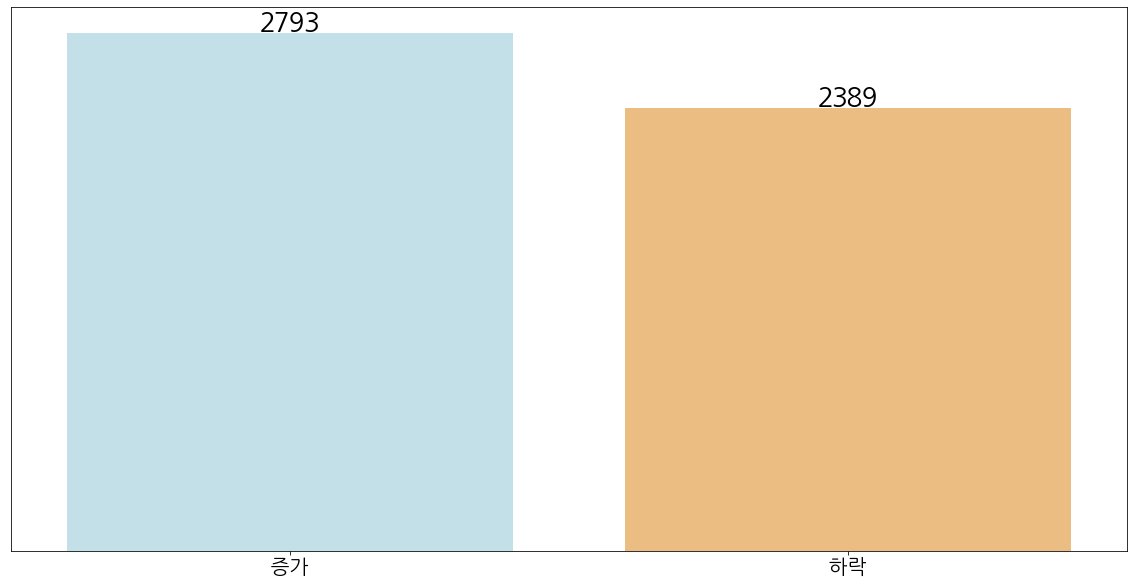

In [108]:
fig = plt.figure(figsize=(20,10))
cplt = sns.countplot(x='kospi_variance', data=skd_temp3,palette='RdYlBu_r')

for x in cplt.patches:
  height = x.get_height()
  cplt.text(x.get_x() + x.get_width()/2., height+10, height, ha='center', size=30)
  
plt.xlabel('')
plt.ylabel('')

ax = plt.gca()
ax.axes.yaxis.set_ticks([])

plt.show()  

## 코스닥 증감

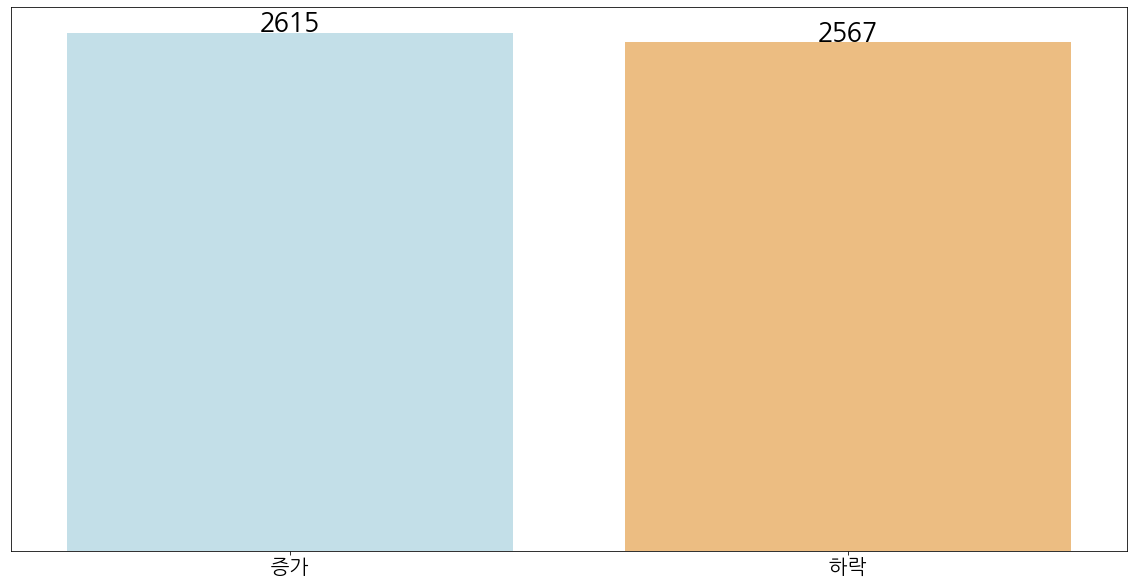

In [109]:
fig = plt.figure(figsize=(20,10))
cplt = sns.countplot(x='kosdaq_variance', data=skd_temp3, palette='RdYlBu_r')

for x in cplt.patches:
  height = x.get_height()
  cplt.text(x.get_x() + x.get_width()/2., height+10, height, ha='center', size=30)
  
plt.xlabel('')
plt.ylabel('')

ax = plt.gca()
ax.axes.yaxis.set_ticks([])

plt.show()  

## 온도와 코스피 증감

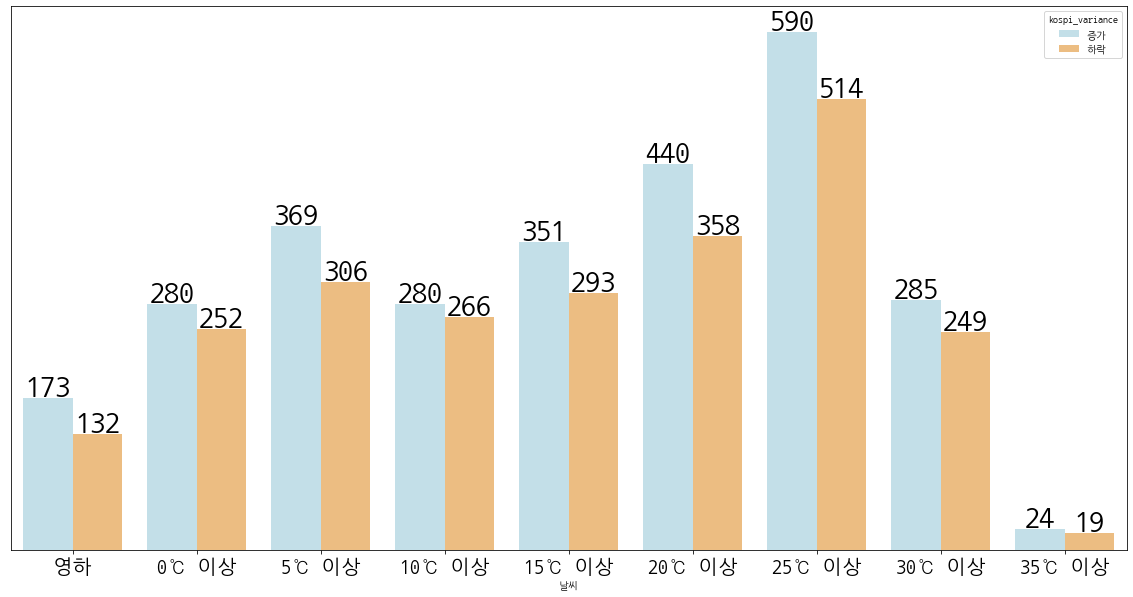

In [110]:
plt.figure(figsize=(20,10))
ax1 = sns.countplot(data = skd_temp3, x='날씨', hue='kospi_variance',order=['영하','0℃ 이상','5℃ 이상','10℃ 이상','15℃ 이상','20℃ 이상','25℃ 이상','30℃ 이상','35℃ 이상'],palette='RdYlBu_r')
for x in ax1.patches:
  height = x.get_height()
  ax1.text(x.get_x() + x.get_width()/2., height+3, height, ha='center', size=30)

plt.ylabel('')

ax = plt.gca()
ax.axes.yaxis.set_ticks([])

plt.show()  

## 온도와 코스닥 증감

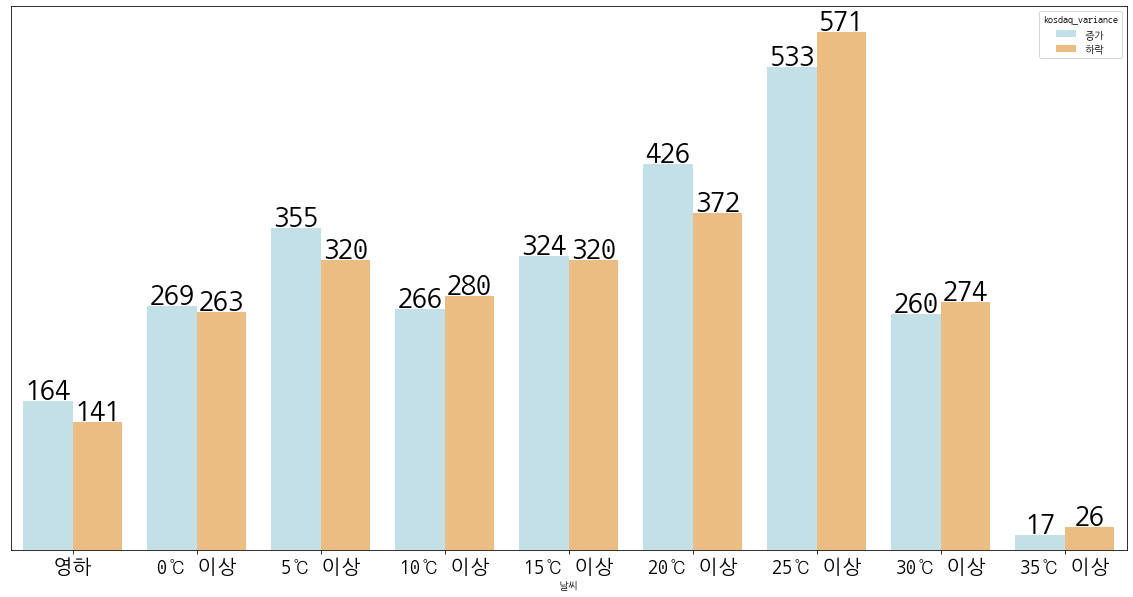

In [111]:
plt.figure(figsize=(20,10))
ax1 = sns.countplot(data = skd_temp3, x='날씨', hue='kosdaq_variance', order=['영하','0℃ 이상','5℃ 이상','10℃ 이상','15℃ 이상','20℃ 이상','25℃ 이상','30℃ 이상','35℃ 이상'],palette='RdYlBu_r')
for x in ax1.patches:
  height = x.get_height()
  ax1.text(x.get_x() + x.get_width()/2., height+3, height, ha='center', size=30)

plt.ylabel('')

ax = plt.gca()
ax.axes.yaxis.set_ticks([])

plt.show()  

## 2011년 이전의 코스피 증감

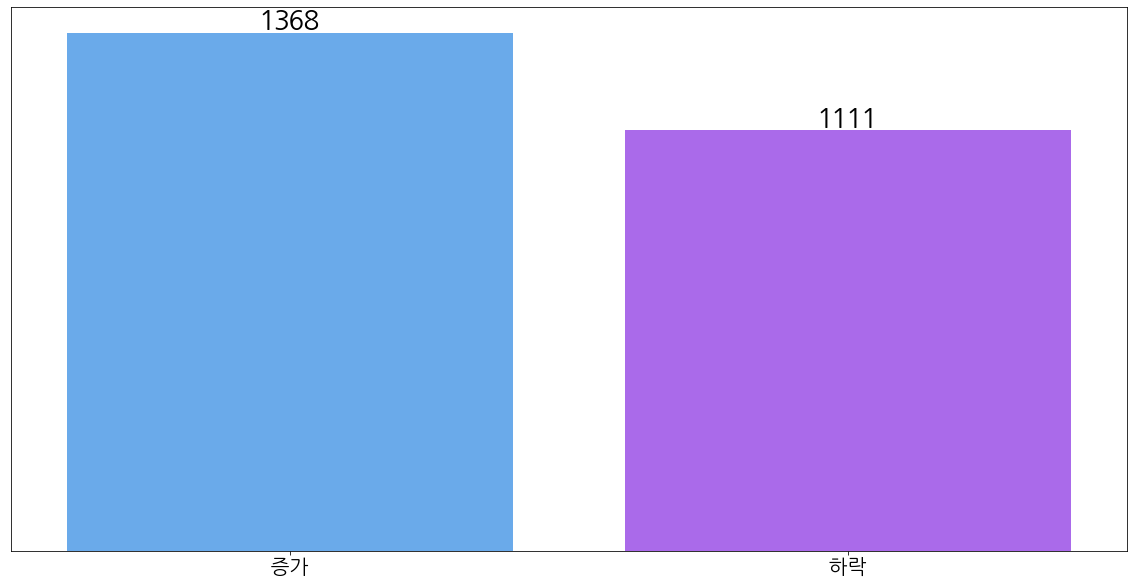

In [112]:
fig = plt.figure(figsize=(20,10))
cplt = sns.countplot(x='kospi_variance', data=skd_2010temp3,palette='cool')

for x in cplt.patches:
  height = x.get_height()
  cplt.text(x.get_x() + x.get_width()/2., height+10, height, ha='center', size=30)
  
plt.xlabel('')
plt.ylabel('')

ax = plt.gca()
ax.axes.yaxis.set_ticks([])

plt.show()  

## 2011년 이후의 코스피 증감

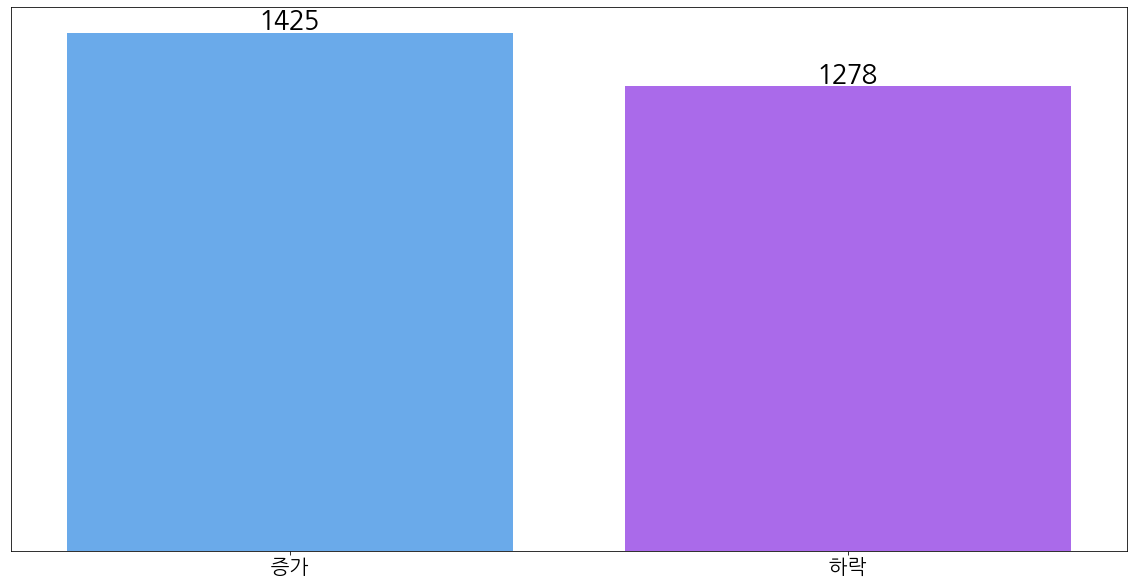

In [113]:
fig = plt.figure(figsize=(20,10))
cplt = sns.countplot(x='kospi_variance', data=skd_2021temp3,palette='cool')

for x in cplt.patches:
  height = x.get_height()
  cplt.text(x.get_x() + x.get_width()/2., height+10, height, ha='center', size=30)
  
plt.xlabel('')
plt.ylabel('')

ax = plt.gca()
ax.axes.yaxis.set_ticks([])

plt.show()  

## 2011년 이전의 코스닥 증감

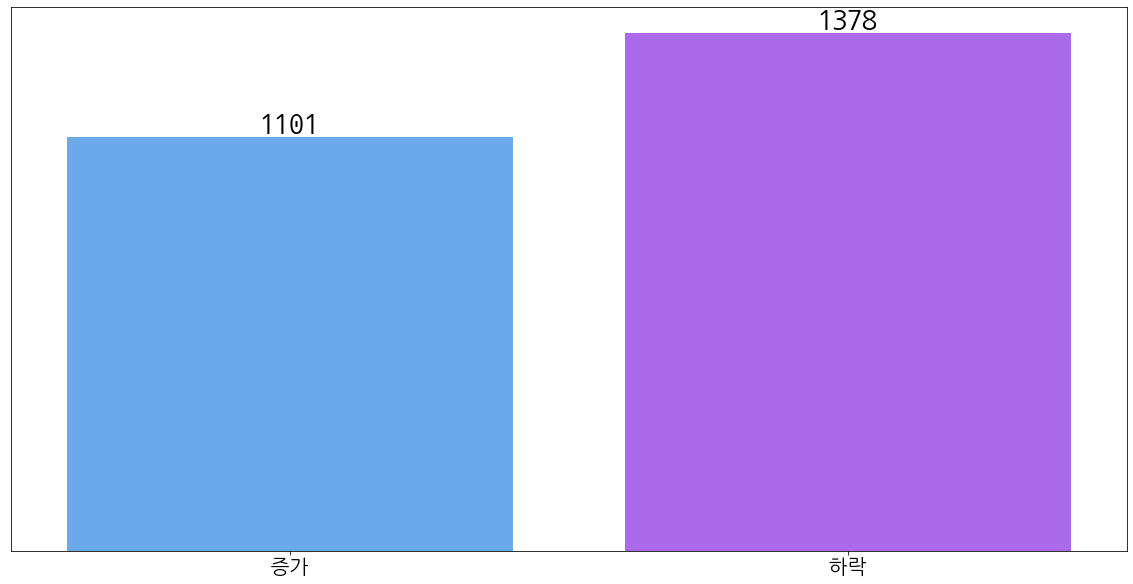

In [114]:
fig = plt.figure(figsize=(20,10))
cplt = sns.countplot(x='kosdaq_variance', data=skd_2010temp3,palette='cool')

for x in cplt.patches:
  height = x.get_height()
  cplt.text(x.get_x() + x.get_width()/2., height+10, height, ha='center', size=30)
  
plt.xlabel('')
plt.ylabel('')

ax = plt.gca()
ax.axes.yaxis.set_ticks([])

plt.show()  

## 2011년 이후의 코스닥 증감

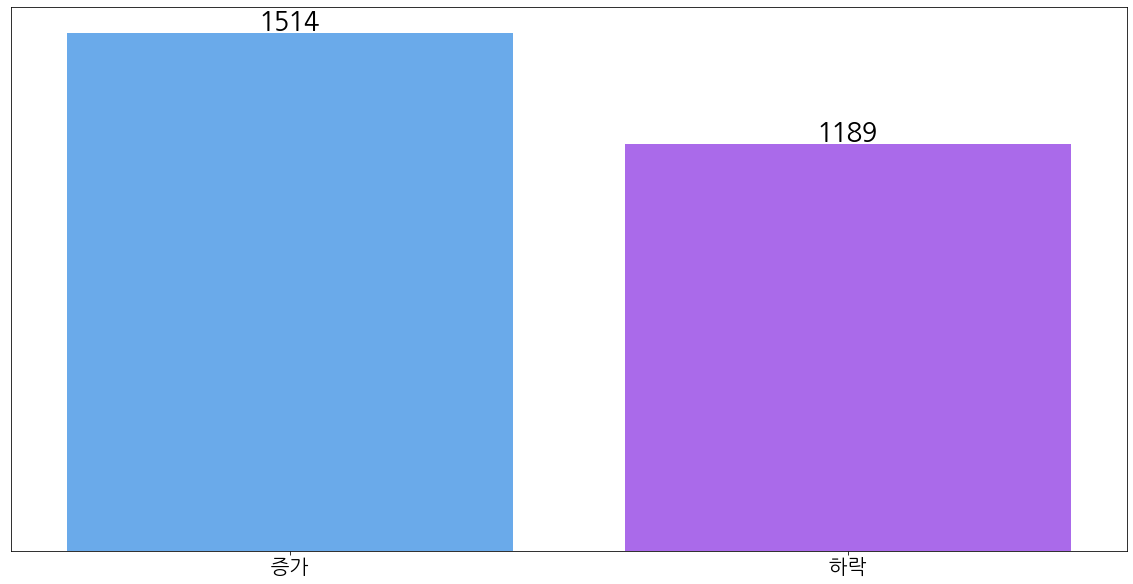

In [115]:
fig = plt.figure(figsize=(20,10))
cplt = sns.countplot(x='kosdaq_variance', data=skd_2021temp3, palette='cool')

for x in cplt.patches:
  height = x.get_height()
  cplt.text(x.get_x() + x.get_width()/2., height+10, height, ha='center', size=30)
  
plt.xlabel('')
plt.ylabel('')

ax = plt.gca()
ax.axes.yaxis.set_ticks([])

plt.show()  

## 2011년 이전의 온도와 코스피 증감

posx and posy should be finite values
posx and posy should be finite values


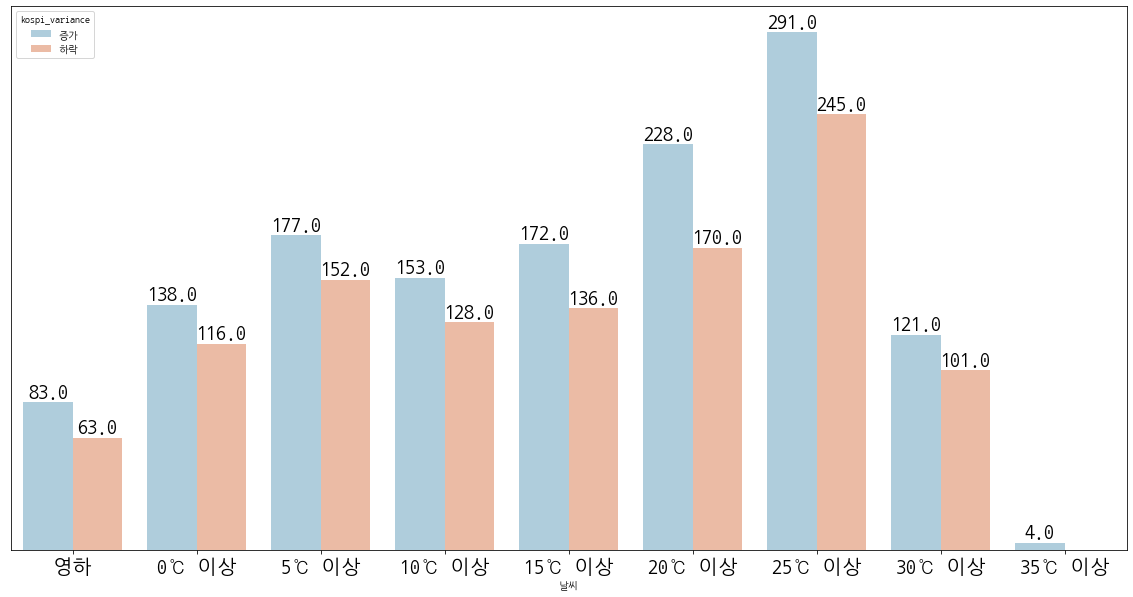

In [116]:
plt.figure(figsize=(20,10))
ax1 = sns.countplot(data = skd_2010temp3, x='날씨', hue='kospi_variance', order=['영하','0℃ 이상','5℃ 이상','10℃ 이상','15℃ 이상','20℃ 이상','25℃ 이상','30℃ 이상','35℃ 이상'], palette='RdBu_r')
for x in ax1.patches:
  height = x.get_height()
  ax1.text(x.get_x() + x.get_width()/2., height+3, height, ha='center', size=20)

plt.ylabel('')

ax = plt.gca()
ax.axes.yaxis.set_ticks([])

plt.show()  

## 2011년 이전의 온도와 코스닥 증감

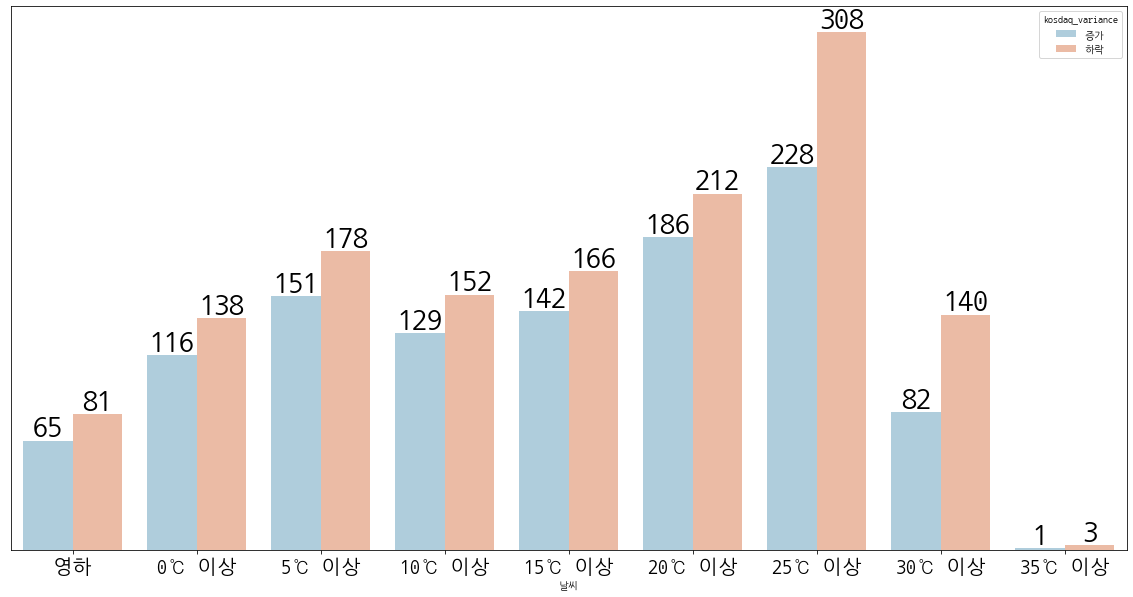

In [117]:
plt.figure(figsize=(20,10))
ax1 = sns.countplot(data = skd_2010temp3, x='날씨', hue='kosdaq_variance', order=['영하','0℃ 이상','5℃ 이상','10℃ 이상','15℃ 이상','20℃ 이상','25℃ 이상','30℃ 이상','35℃ 이상'],palette='RdBu_r')
for x in ax1.patches:
  height = x.get_height()
  ax1.text(x.get_x() + x.get_width()/2., height+3, height, ha='center', size=30)

plt.ylabel('')

ax = plt.gca()
ax.axes.yaxis.set_ticks([])

plt.show()  

## 2011년 이후의 온도와 코스피 증감

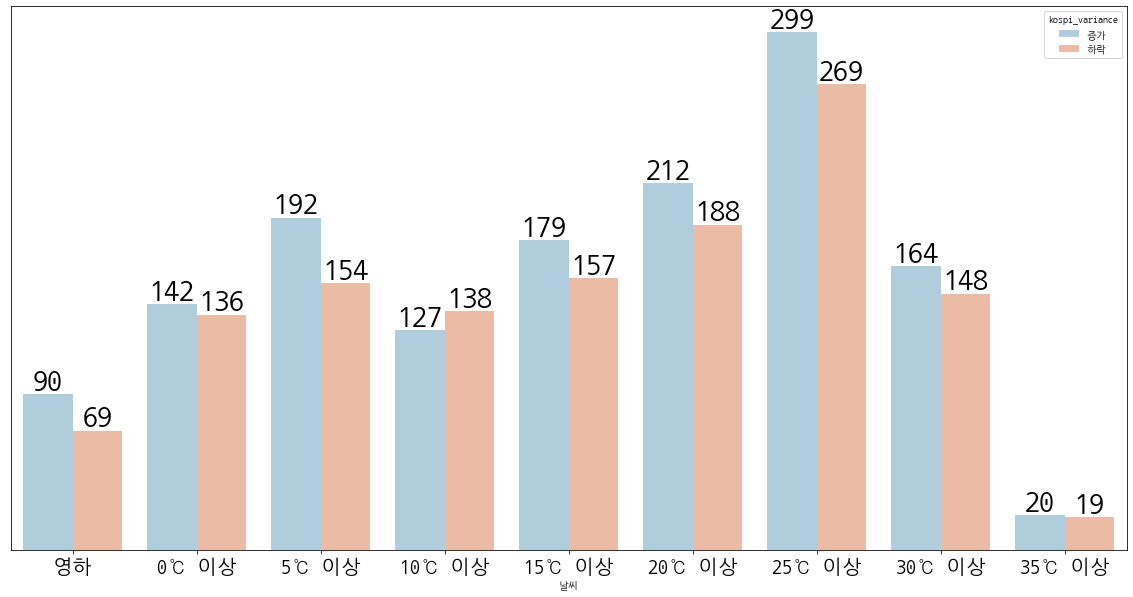

In [118]:
plt.figure(figsize=(20,10))
ax1 = sns.countplot(data = skd_2021temp3, x='날씨', hue='kospi_variance', order=['영하','0℃ 이상','5℃ 이상','10℃ 이상','15℃ 이상','20℃ 이상','25℃ 이상','30℃ 이상','35℃ 이상'],palette='RdBu_r')
for x in ax1.patches:
  height = x.get_height()
  ax1.text(x.get_x() + x.get_width()/2., height+3, height, ha='center', size=30)

plt.ylabel('')

ax = plt.gca()
ax.axes.yaxis.set_ticks([])

plt.show()  

## 2011년 이후의 온도와 코스닥 증감

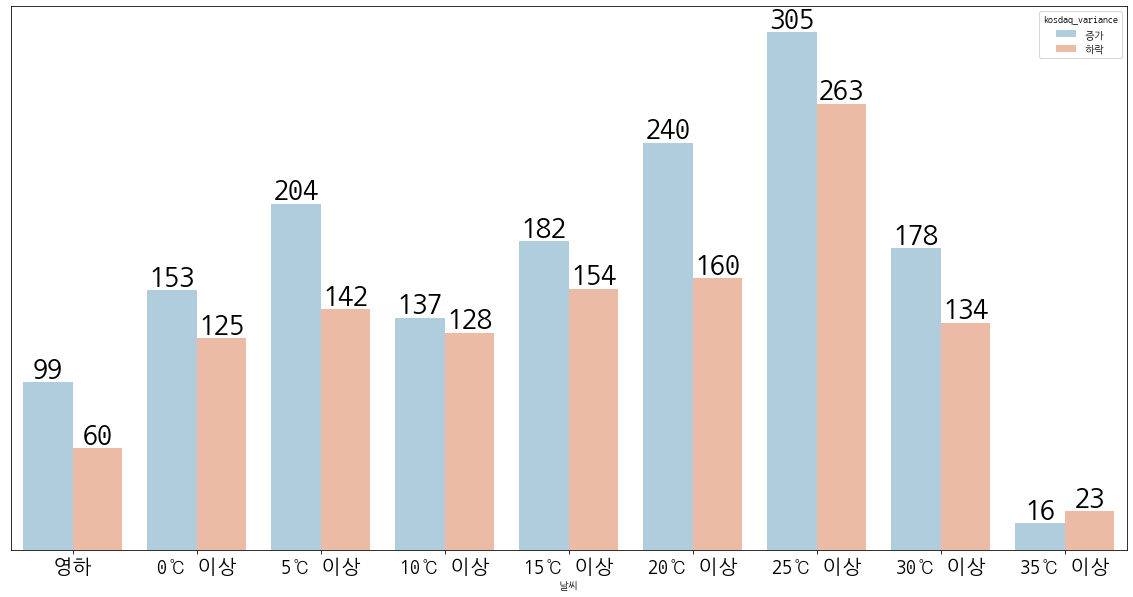

In [119]:
plt.figure(figsize=(20,10))
ax1 = sns.countplot(data = skd_2021temp3, x='날씨', hue='kosdaq_variance', order=['영하','0℃ 이상','5℃ 이상','10℃ 이상','15℃ 이상','20℃ 이상','25℃ 이상','30℃ 이상','35℃ 이상'],palette='RdBu_r')
for x in ax1.patches:
  height = x.get_height()
  ax1.text(x.get_x() + x.get_width()/2., height+3, height, ha='center', size=30)

plt.ylabel('')

ax = plt.gca()
ax.axes.yaxis.set_ticks([])

plt.show()  

In [120]:
skd_temp

Unnamed: 0 지점명        date  평균기온(℃)  최고기온(℃)    kospi  volume_kospi  \
0              1  서울  2001-01-02     -4.3     -0.2   520.95       23101.0   
1              2  서울  2001-01-03     -8.3     -5.2   521.43       32458.0   
2              3  서울  2001-01-04     -9.8     -6.7   558.02       44454.0   
3              4  서울  2001-01-05     -6.8     -2.2   580.85       57829.0   
4              7  서울  2001-01-08      2.0      4.9   586.65       55865.0   
...          ...  ..         ...      ...      ...      ...           ...   
5177        7661  서울  2021-12-24     -0.3      3.2  3012.43       53015.0   
5178        7664  서울  2021-12-27     -7.6     -3.9  2999.55       46290.0   
5179        7665  서울  2021-12-28     -4.1     -0.9  3020.24       59323.0   
5180        7666  서울  2021-12-29      0.4      5.9  2993.29       53660.0   
5181        7667  서울  2021-12-30     -3.9      0.2  2977.65       45404.0   

      amount_kospi   kosdaq  volume_kosdaq  amount_kosdaq  kospi_diff  \
0          12233.0      NaN            NaN            NaN         NaN   
1          15834.0      NaN            NaN            NaN        0.48   
2          29848.0      NaN            NaN            NaN       36.59   
3          35696.0      NaN            NaN            NaN       22.83   
4          29481.0      NaN            NaN            NaN        5.80   
...            ...      ...            ...            ...         ...   
5177       84694.0  1007.42       123576.0       108664.0       14.26   
5178       81341.0  1011.36       115153.0       100446.0      -12.88   
5179      118684.0  1027.44       128675.0       132431.0       20.69   
5180      108018.0  1028.05        95094.0       116836.0      -26.95   
5181       85951.0  1033.98        90742.0       101026.0      -15.64   

      kosdaq_diff  kospi_pct  kosdaq_pct   최고기온_pct   평균기온_pct     날씨  
0             NaN        NaN         NaN        NaN        NaN      0  
1             NaN       0.09         NaN  25.000000   0.930233     영하  
2             NaN       7.02         NaN   0.288462   0.180723     영하  
3             NaN       4.09         NaN  -0.671642  -0.306122     영하  
4             NaN       1.00         NaN  -3.227273  -1.294118  0℃ 이상  
...           ...        ...         ...        ...        ...    ...  
5177         4.11       0.48        0.41  -0.614458  -1.111111  0℃ 이상  
5178         3.94      -0.43        0.39  -2.218750  24.333333     영하  
5179        16.08       0.69        1.59  -0.769231  -0.460526     영하  
5180         0.61      -0.89        0.06  -7.555556  -1.097561  5℃ 이상  
5181         5.93      -0.52        0.58  -0.966102 -10.750000  0℃ 이상  

[5182 rows x 18 columns]

In [121]:
skd_temp10 = skd_temp.copy()

skd_temp10 = skd_temp10.assign(Year='2000')
for i in range(1,len(skd_temp10)):
  if skd_temp10['date'][i] <= '2010-12-31':
    skd_temp10['Year'][i] = '2000'
  else:
    skd_temp10['Year'][i] = '2010'

skd_temp10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Unnamed: 0 지점명        date  평균기온(℃)  최고기온(℃)    kospi  volume_kospi  \
0              1  서울  2001-01-02     -4.3     -0.2   520.95       23101.0   
1              2  서울  2001-01-03     -8.3     -5.2   521.43       32458.0   
2              3  서울  2001-01-04     -9.8     -6.7   558.02       44454.0   
3              4  서울  2001-01-05     -6.8     -2.2   580.85       57829.0   
4              7  서울  2001-01-08      2.0      4.9   586.65       55865.0   
...          ...  ..         ...      ...      ...      ...           ...   
5177        7661  서울  2021-12-24     -0.3      3.2  3012.43       53015.0   
5178        7664  서울  2021-12-27     -7.6     -3.9  2999.55       46290.0   
5179        7665  서울  2021-12-28     -4.1     -0.9  3020.24       59323.0   
5180        7666  서울  2021-12-29      0.4      5.9  2993.29       53660.0   
5181        7667  서울  2021-12-30     -3.9      0.2  2977.65       45404.0   

      amount_kospi   kosdaq  volume_kosdaq  amount_kosdaq  kospi_diff  \
0          12233.0      NaN            NaN            NaN         NaN   
1          15834.0      NaN            NaN            NaN        0.48   
2          29848.0      NaN            NaN            NaN       36.59   
3          35696.0      NaN            NaN            NaN       22.83   
4          29481.0      NaN            NaN            NaN        5.80   
...            ...      ...            ...            ...         ...   
5177       84694.0  1007.42       123576.0       108664.0       14.26   
5178       81341.0  1011.36       115153.0       100446.0      -12.88   
5179      118684.0  1027.44       128675.0       132431.0       20.69   
5180      108018.0  1028.05        95094.0       116836.0      -26.95   
5181       85951.0  1033.98        90742.0       101026.0      -15.64   

      kosdaq_diff  kospi_pct  kosdaq_pct   최고기온_pct   평균기온_pct     날씨  Year  
0             NaN        NaN         NaN        NaN        NaN      0  2000  
1             NaN       0.09         NaN  25.000000   0.930233     영하  2000  
2             NaN       7.02         NaN   0.288462   0.180723     영하  2000  
3             NaN       4.09         NaN  -0.671642  -0.306122     영하  2000  
4             NaN       1.00         NaN  -3.227273  -1.294118  0℃ 이상  2000  
...           ...        ...         ...        ...        ...    ...   ...  
5177         4.11       0.48        0.41  -0.614458  -1.111111  0℃ 이상  2010  
5178         3.94      -0.43        0.39  -2.218750  24.333333     영하  2010  
5179        16.08       0.69        1.59  -0.769231  -0.460526     영하  2010  
5180         0.61      -0.89        0.06  -7.555556  -1.097561  5℃ 이상  2010  
5181         5.93      -0.52        0.58  -0.966102 -10.750000  0℃ 이상  2010  

[5182 rows x 19 columns]

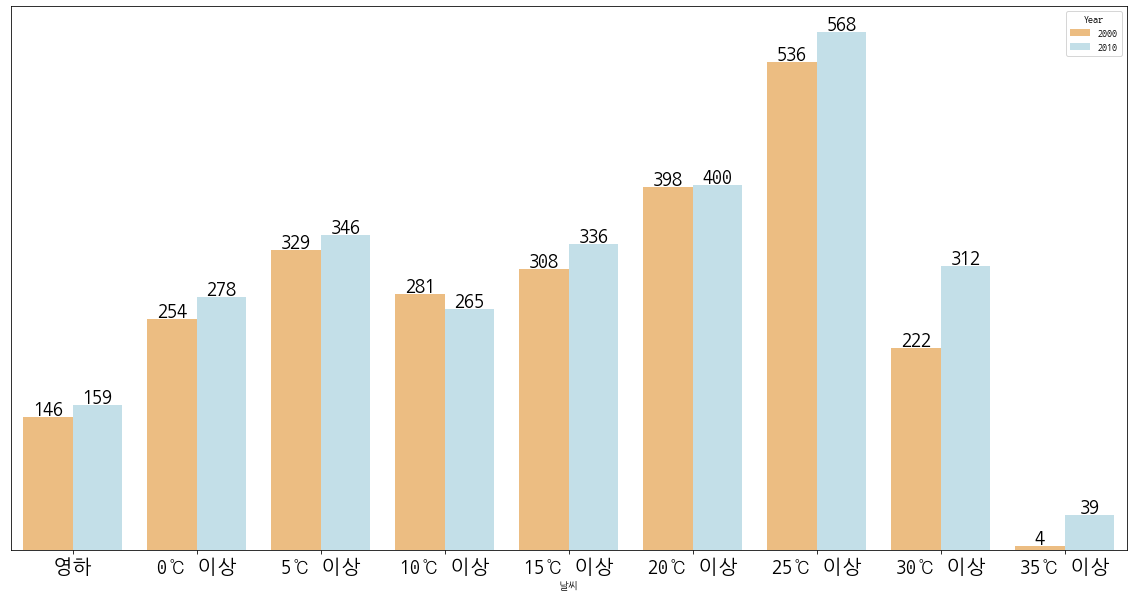

In [122]:
plt.figure(figsize=(20,10))
ax1 = sns.countplot(data = skd_temp10, x='날씨', hue='Year', order=['영하','0℃ 이상','5℃ 이상','10℃ 이상','15℃ 이상','20℃ 이상','25℃ 이상','30℃ 이상','35℃ 이상'],palette='RdYlBu')
for x in ax1.patches:
  height = x.get_height()
  ax1.text(x.get_x() + x.get_width()/2., height+3, height, ha='center', size=20)

plt.ylabel('')

ax = plt.gca()
ax.axes.yaxis.set_ticks([])

plt.show()  